# SC 1015 Mini-Project (FCE3_Team 9)

by Raja Muthu and Lennard Ng Weijie

### Importing all Essential Libraries

In [1]:
# import all libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import plot_tree
from tabulate import tabulate

### Step 1: Importing dataset & Data Cleaning
First we import the dataset and filter out the relevant data according to roles and their relevant variables.
Some of our values had question marks in them as such had to be filtered out, using regex. 
There were also 143 variables for us to assess so we sieved out a few relevant variables for each position that is important to us, namely the Forwards(FW), Midfielders(MF) and Defender(DF)

In [2]:
Data2122 = pd.read_csv('2021-2022 Football Player Stats.csv', sep = ';', encoding='latin-1')
FW_Data = Data2122[Data2122['Pos'] == 'FW'].copy()
MF_Data = Data2122[Data2122['Pos'] == 'MF'].copy()
DF_Data = Data2122[Data2122['Pos'] == 'DF'].copy()
FW_Relevant = FW_Data[['Player', 'Goals', 'Shots', 'SoT', 'G/Sh', 'G/SoT', 'SCA', 'GCA', 'TouAttPen', 'CPA']].replace('\?', '', regex=True)
MF_Relevant = MF_Data[['Player', 'PasShoCmp', 'PasMedCmp', 'PasLonCmp', 'PasShoCmp%', 'PasMedCmp%', 'PasLonCmp%', 'PasProg', 'PPA', 'Int', 'Tkl', 'Carries', 'CarProg', 'SCA', 'GCA']].replace('\?', '', regex=True)
DF_Relevant = DF_Data[['Player', 'Tkl', 'Int', 'Clr', 'BlkSh', 'BlkPass', 'TklDef3rd', 'TklMid3rd', 'PasTotCmp%', 'PasLonCmp%', 'AerWon%', 'AerWon']].replace('\?', '', regex=True)
Data2122.shape

(2921, 143)

In [3]:
print("Data dimensions:\n", Data2122.shape)
print()
print("Data types:\n",Data2122.dtypes)
print()
print("Data description:\n", Data2122.describe())

Data dimensions:
 (2921, 143)

Data types:
 Rk           int64
Player      object
Nation      object
Pos         object
Squad       object
            ...   
OG         float64
Recov      float64
AerWon     float64
AerLost    float64
AerWon%    float64
Length: 143, dtype: object

Data description:
                 Rk          Age         Born           MP       Starts  \
count  2921.000000  2920.000000  2921.000000  2921.000000  2921.000000   
mean   1461.000000    26.092123  1994.725094    18.800068    13.749743   
std     843.364393     4.641746    37.210426    11.619882    11.393763   
min       1.000000    16.000000     0.000000     1.000000     0.000000   
25%     731.000000    23.000000  1992.000000     8.000000     3.000000   
50%    1461.000000    26.000000  1996.000000    20.000000    12.000000   
75%    2191.000000    29.000000  1999.000000    29.000000    23.000000   
max    2921.000000    41.000000  2006.000000    38.000000    38.000000   

               Min          90s  

In [4]:
# a. check for duplicates
print('Number of duplicates in the dataset: {}'.format(sum(Data2122.duplicated())))
# b. check for NaN or Null value
print('We have {} NaN/Null values in the dataset'.format(Data2122.isnull().values.sum()))

#check which column has Null values
for column in Data2122:
    for cell in Data2122[column].isna():
        if cell==True:
            print(column)

Number of duplicates in the dataset: 0
We have 2 NaN/Null values in the dataset
Nation
Age


#### Null Values

We have identified that the Null values are in the Nation and Age columns, which we have identified as irrelevant data when analysing, and thus would have already been dropped.

### Step 2:  Exploratory Data Analysis 
This dataset contains the statistics of more than  2900 players (per 90 minutes, which is usually the duration of a football match) that have played in the 2021-2022 season. All these players only play in the top 6 football leagues, which is the Premier League, Ligue 1, Bundesliga, Serie A and La Liga. This dataset is generally based on the players' performance in each aspect of the game.  
We wanted to identify the relationship between all the relevant variables for each position to pick the right predictor variable for each positions. We also wanted to find the right models that can be used to compare and look at variables that can be used for each position.

FW_X, MF_X and DF_X is used to quicly access the relavant variables that need to be analysed in this case

In [5]:
FW_X = FW_Relevant[['Goals', 'Shots', 'SoT', 'SCA', 'GCA', 'TouAttPen', 'CPA']]
MF_X = MF_Relevant[['PasShoCmp', 'PasMedCmp', 'PasLonCmp', 'PasProg', 'PPA', 'Int', 'Tkl', 'Carries', 'CarProg', 'SCA', 'GCA']]
DF_X = DF_Relevant[['BlkSh', 'BlkPass', 'TklDef3rd', 'TklMid3rd', 'PasTotCmp%', 'PasLonCmp%', 'AerWon%', 'AerWon']]

###### We used both the correlation matrix and the pairplots to look at the relationships both graphically and numerically

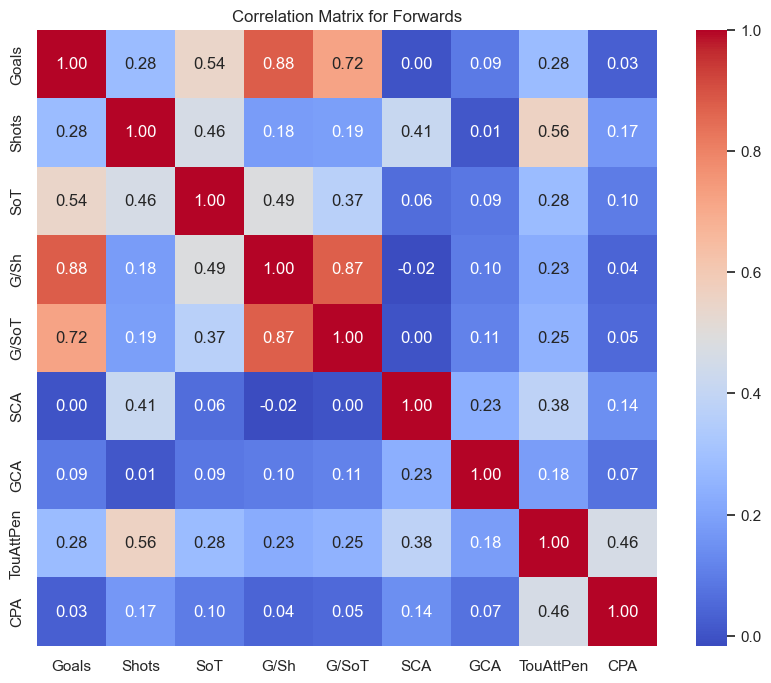

In [6]:
# Correlation matrix for forwards' features
FW_corr_matrix = FW_Relevant.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sb.heatmap(FW_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Forwards')
plt.show()

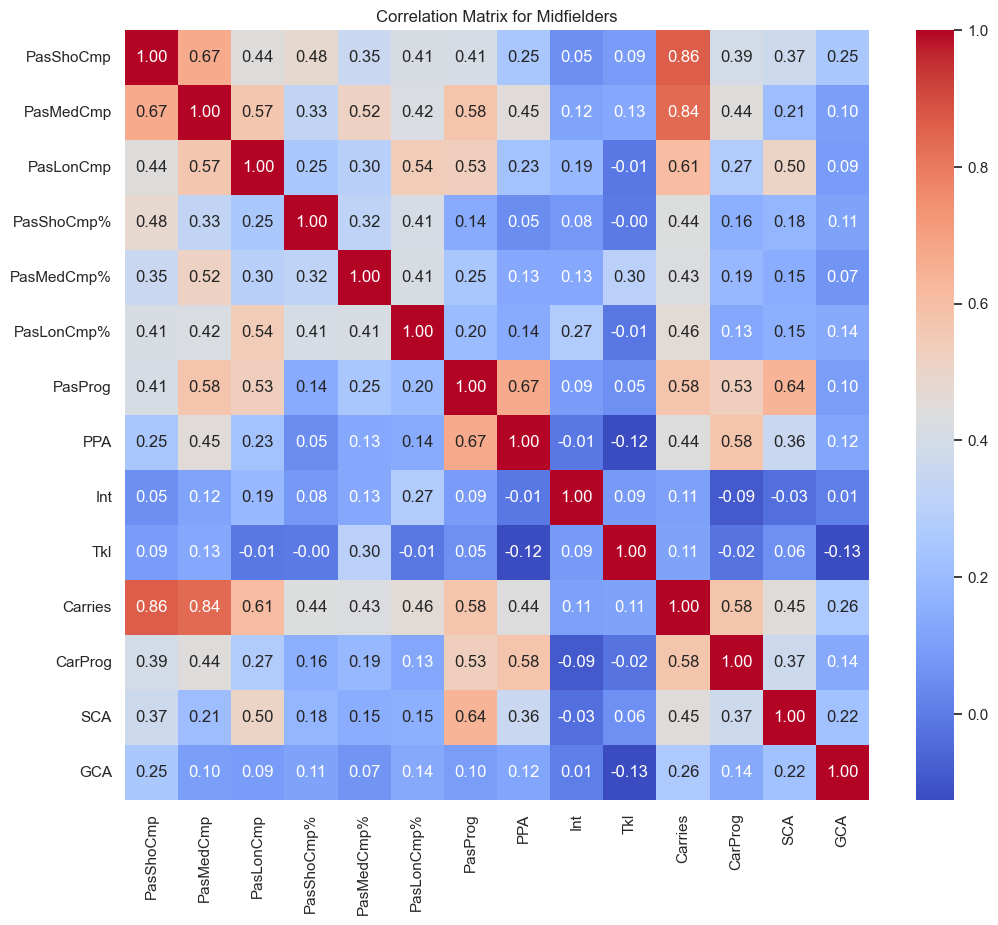

In [7]:
# Correlation matrix for midfielders' features
MF_corr_matrix = MF_Relevant.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sb.heatmap(MF_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Midfielders')
plt.show()

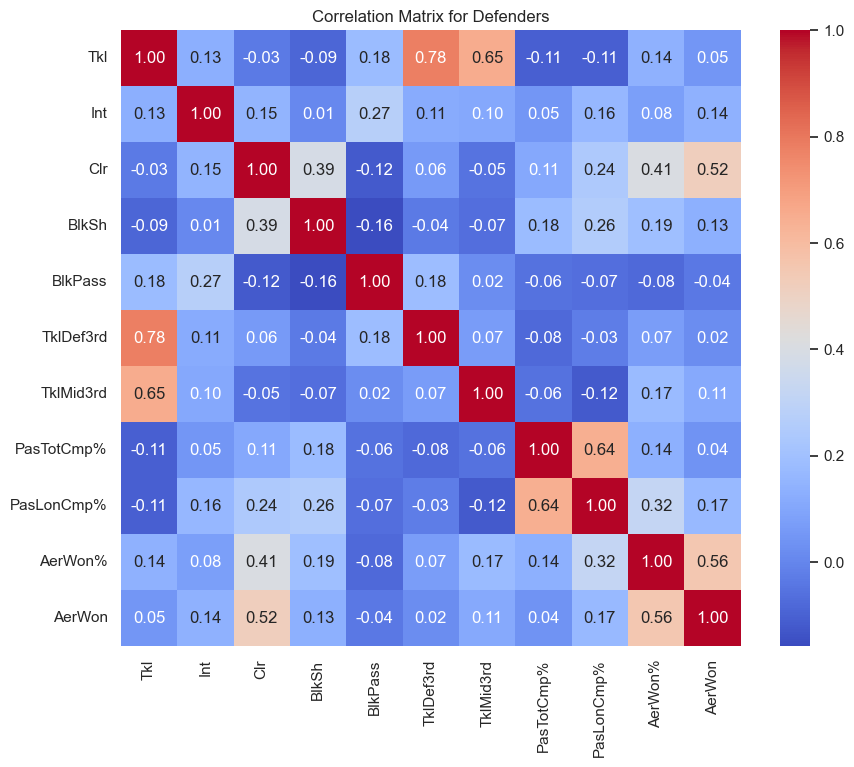

In [8]:
# Correlation matrix for defenders' features
DF_corr_matrix = DF_Relevant.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sb.heatmap(DF_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Defenders')
plt.show()


C:\Users\lenna\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\lenna\AppData\Local\Temp\ipykernel_34456\1672345245.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

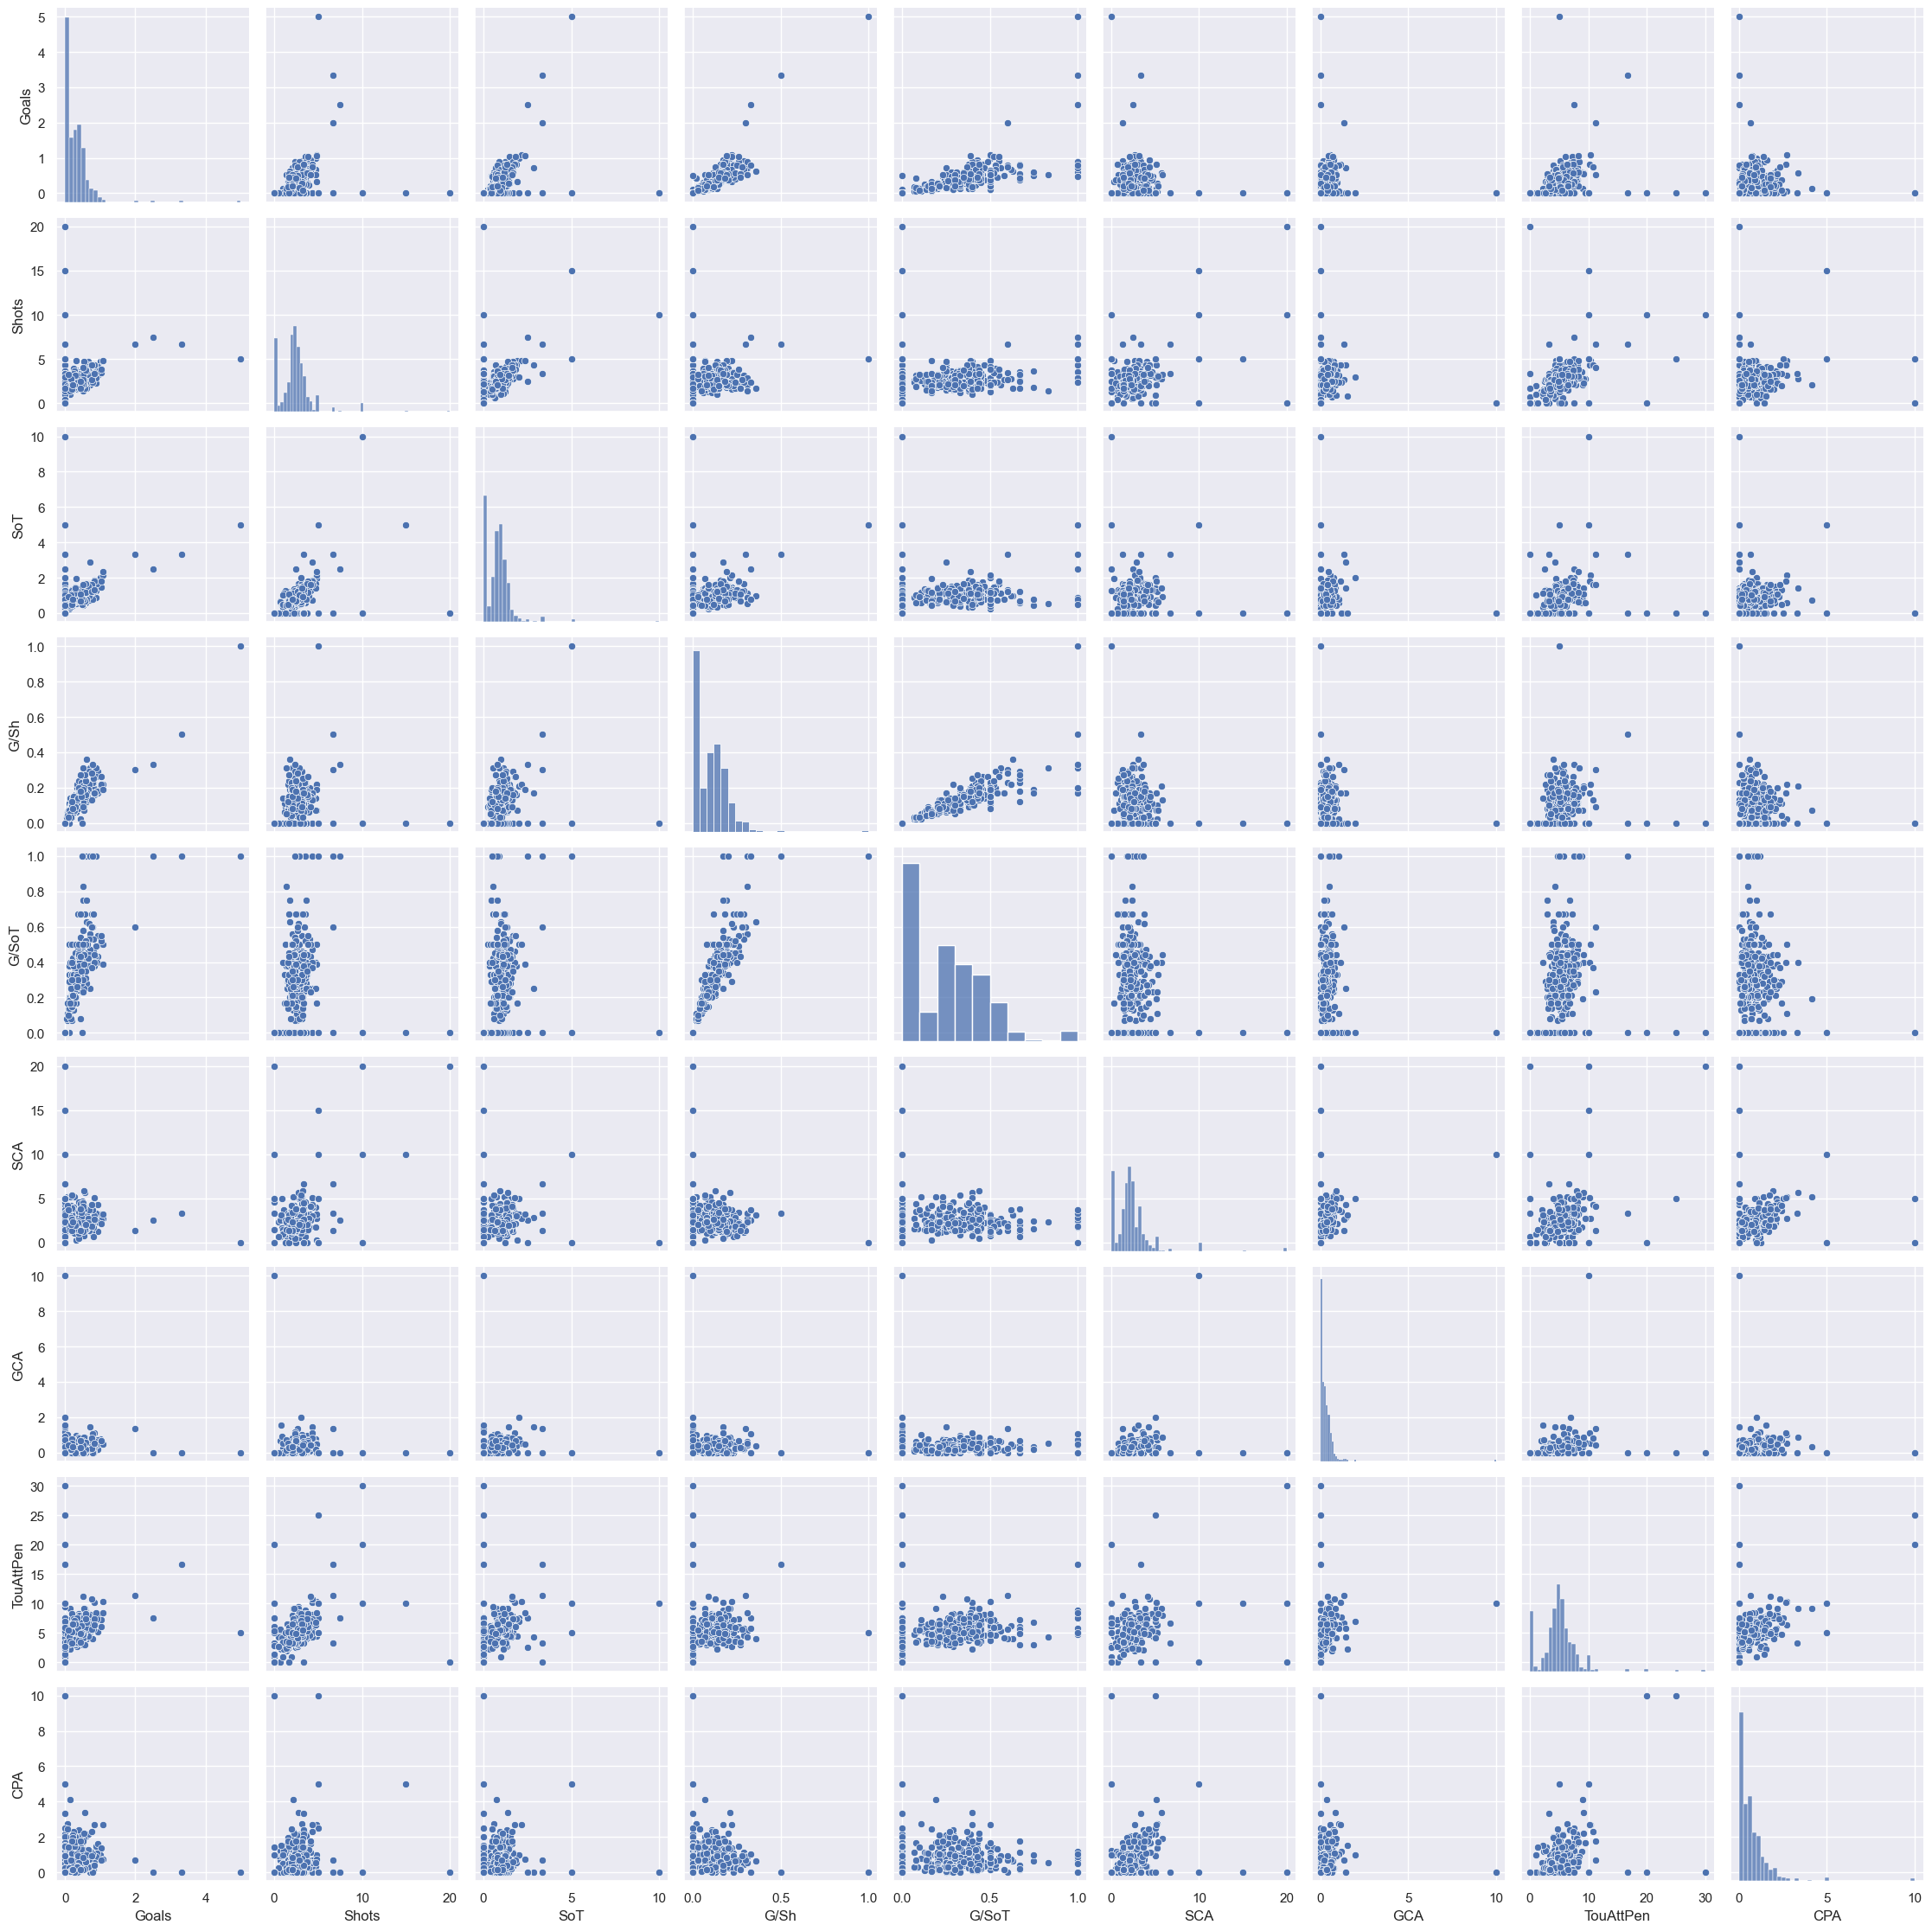

In [9]:
# pairplot for forwards
plt.figure(figsize=(12, 8))
sb.pairplot(FW_Relevant, height=2.5)
plt.tight_layout()
plt.show()

C:\Users\lenna\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\lenna\AppData\Local\Temp\ipykernel_34456\2107685661.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

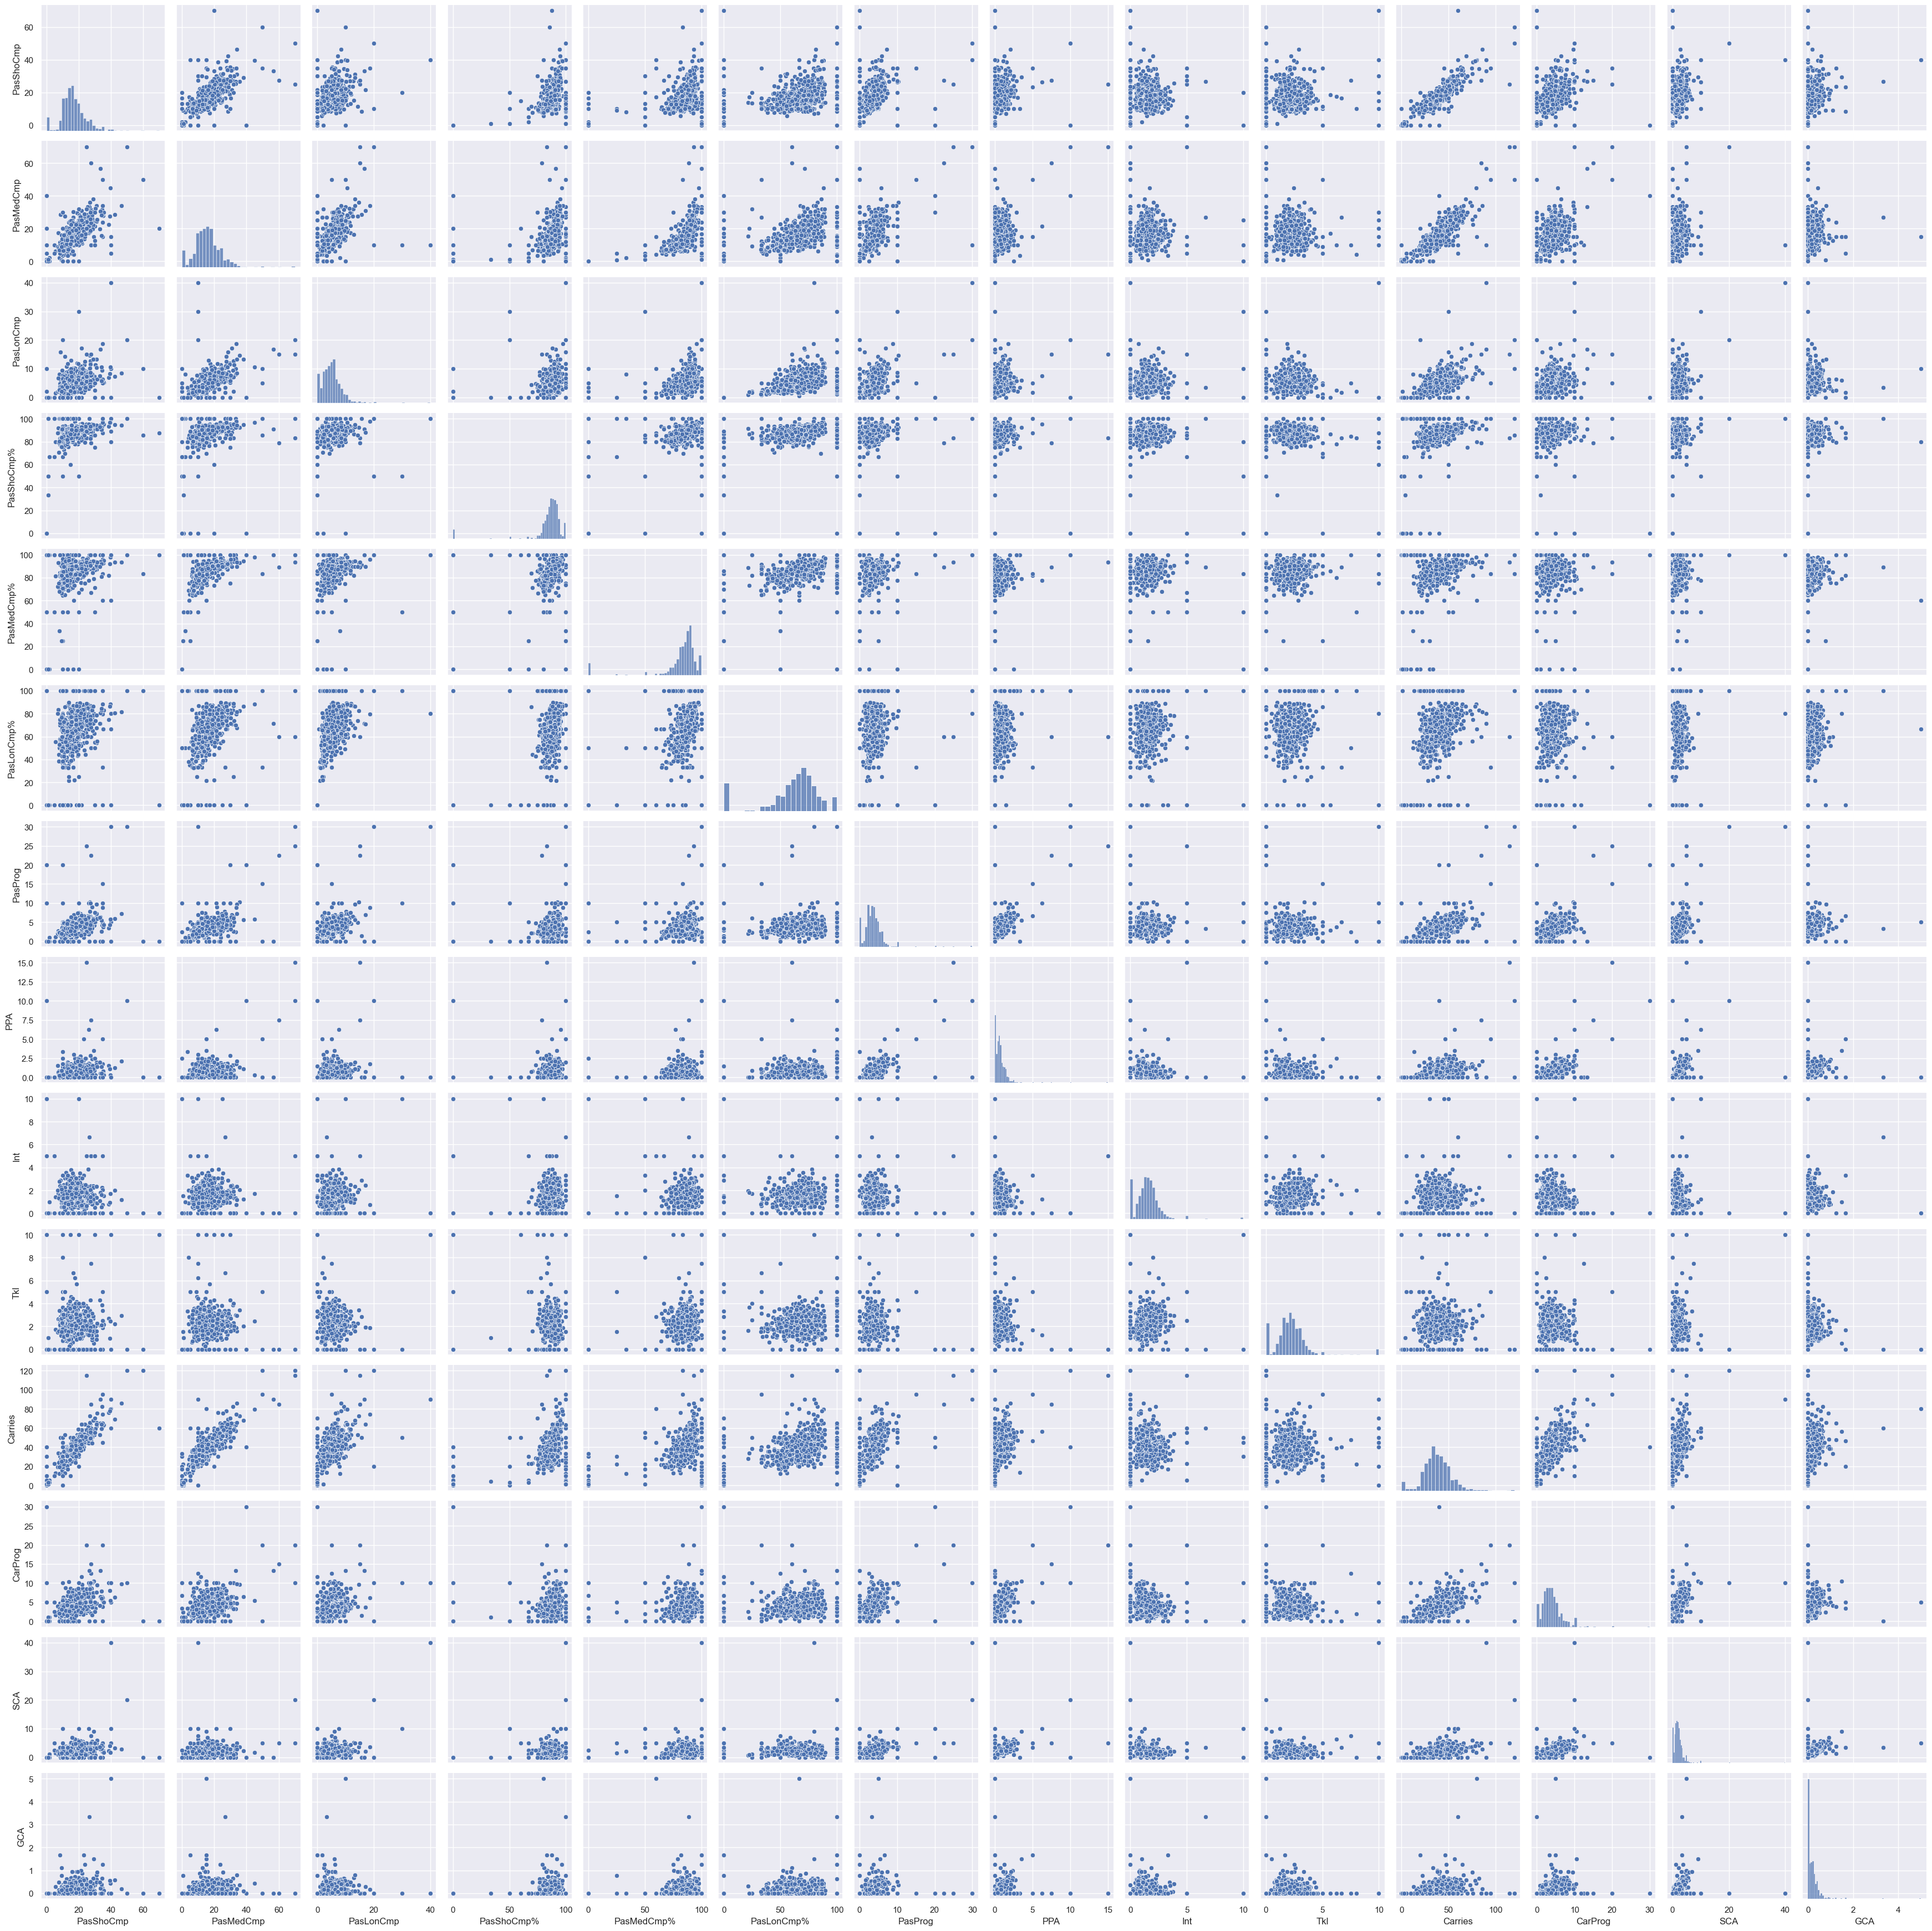

In [10]:
# pairplot for midfielders
plt.figure(figsize=(12, 8))
sb.pairplot(MF_Relevant, height=2.5)
plt.tight_layout()
plt.show()

C:\Users\lenna\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\lenna\AppData\Local\Temp\ipykernel_34456\1451490786.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

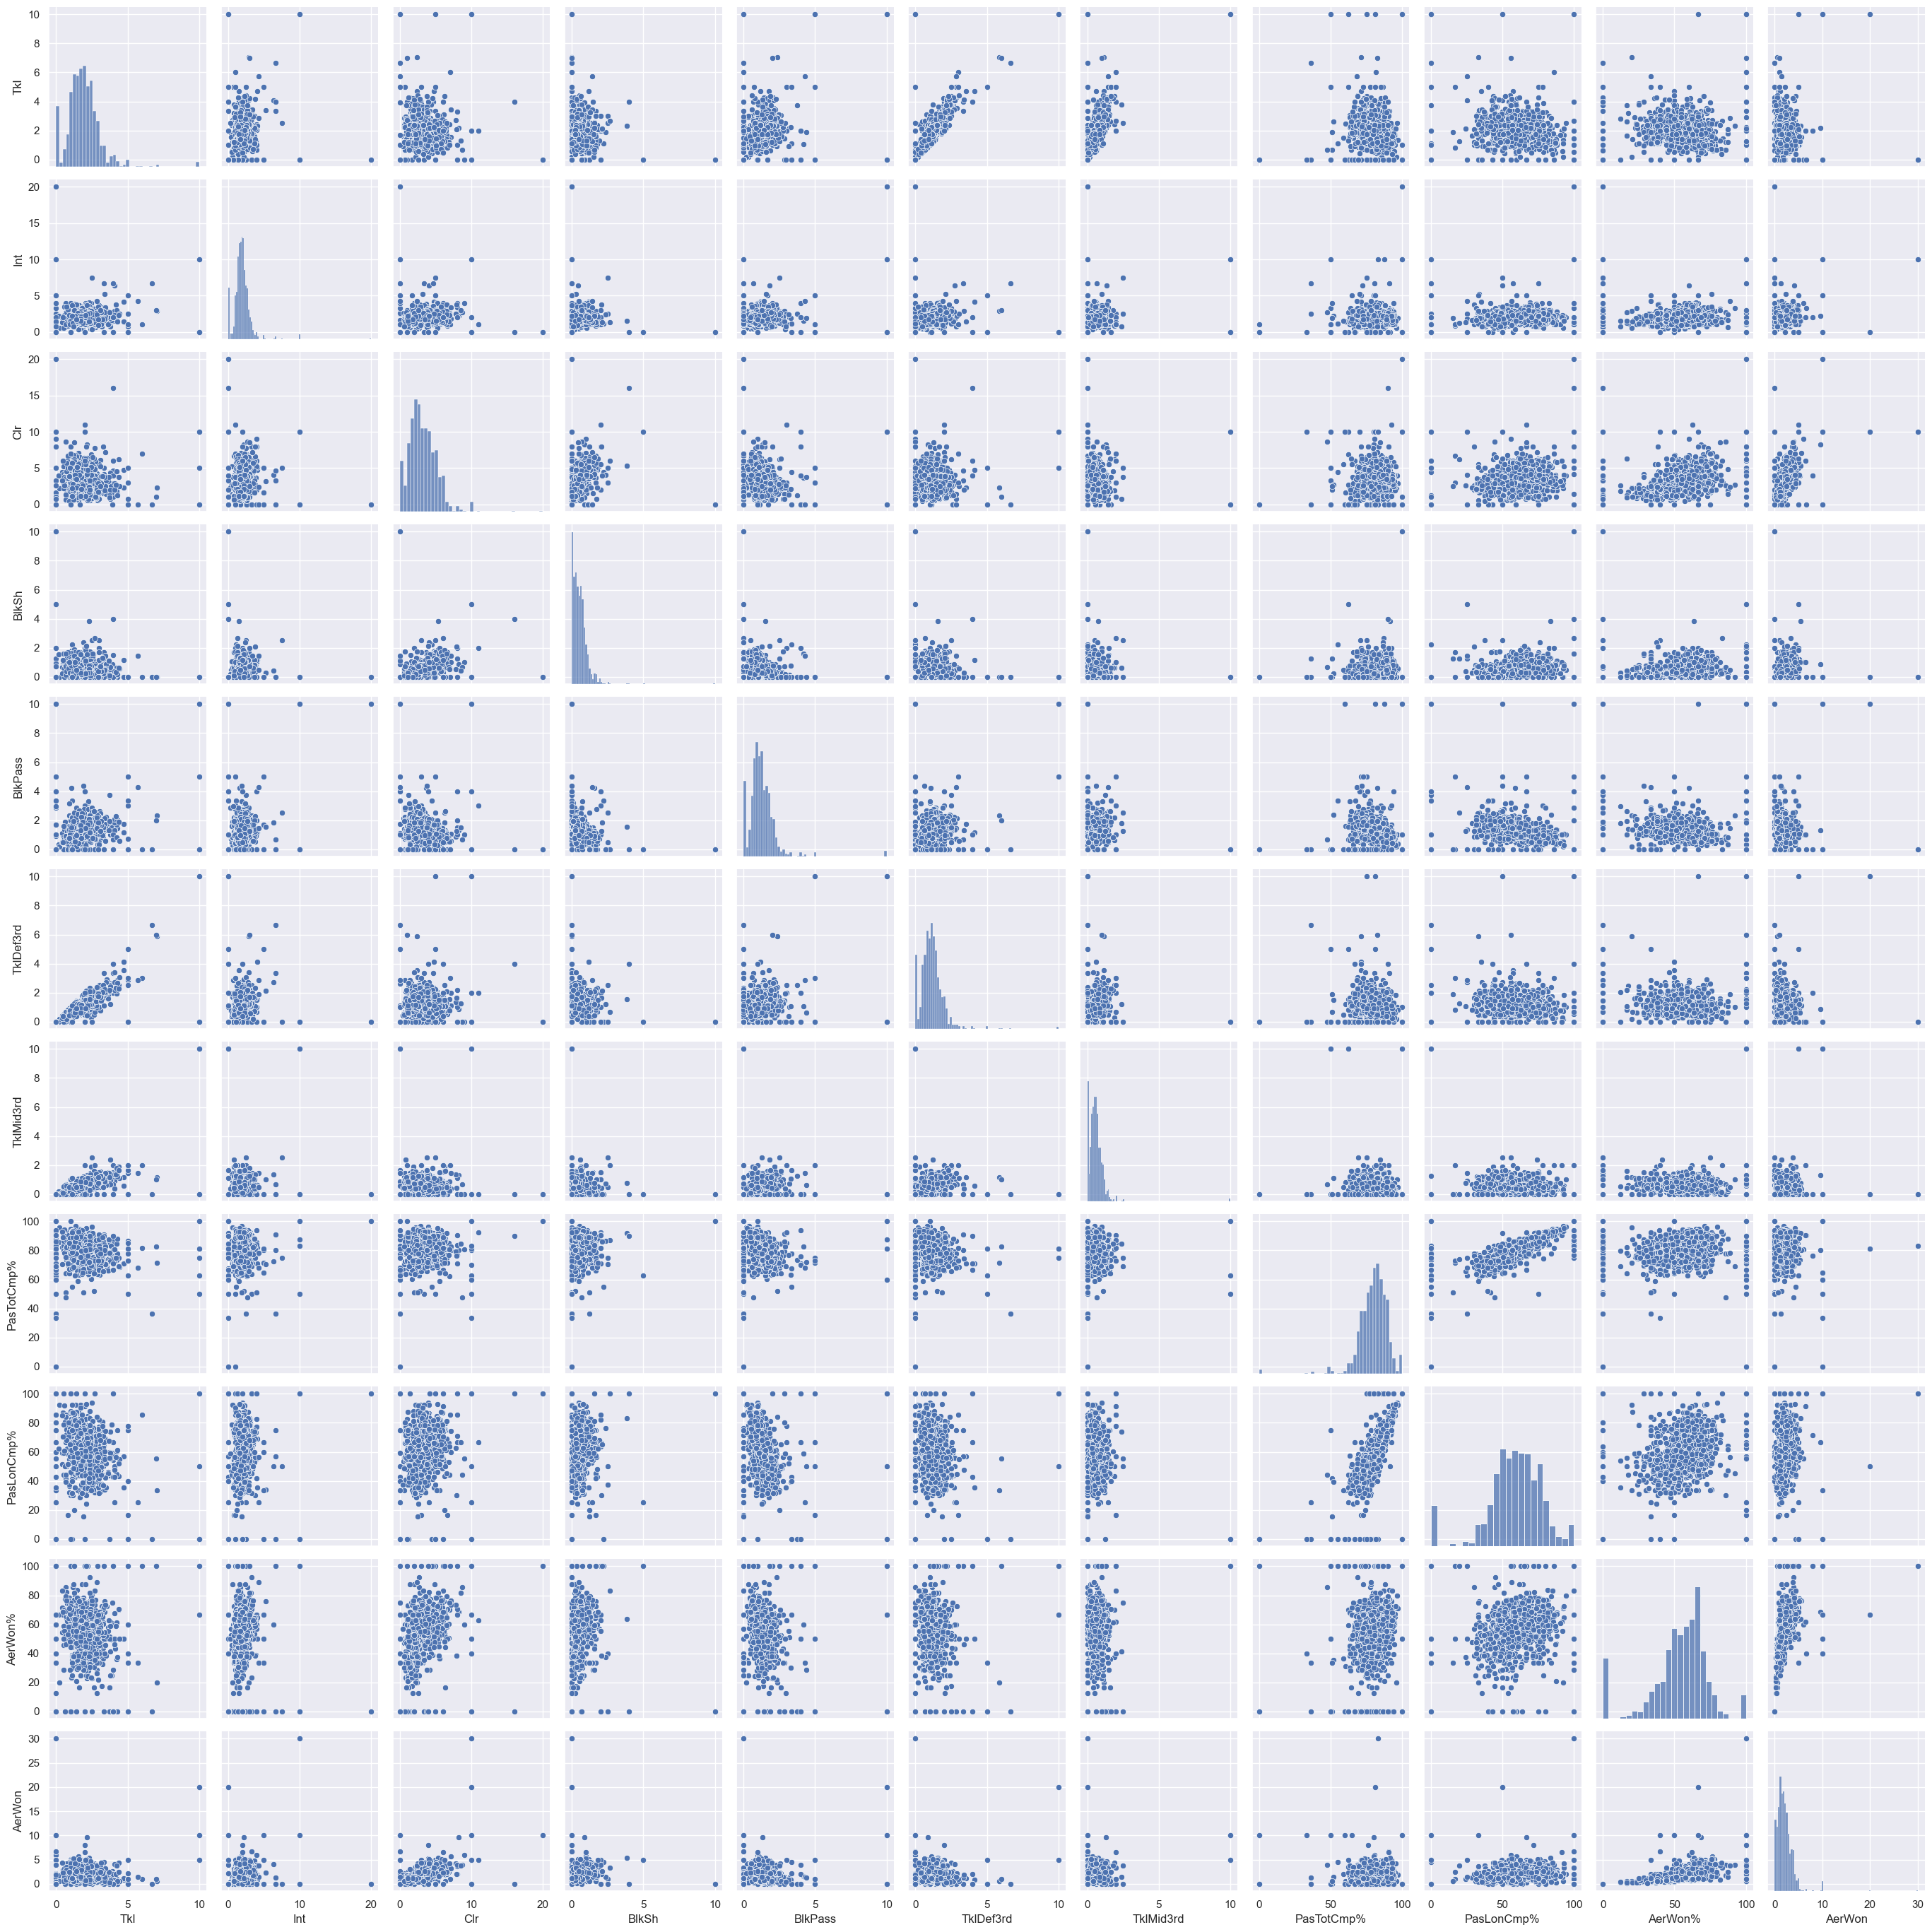

In [11]:
# pairplot for defenders
plt.figure(figsize=(12, 8))
sb.pairplot(DF_Relevant, height=2.5)
plt.tight_layout()
plt.show()

###### Based on the correlation matrix and the pairplots, we decided to pick a few key variables that are important and can be predicted. Among all the relevant variables, these few variables below showed the most relation

In [12]:
FW_Y_GSh = FW_Relevant['G/Sh']
FW_Y_GSoT = FW_Relevant['G/SoT']
MF_Y_Sho = MF_Relevant['PasShoCmp%']
MF_Y_Med = MF_Relevant['PasMedCmp%']
MF_Y_Lon = MF_Relevant['PasLonCmp%']
DF_Y_Tkl = DF_Relevant['Tkl']
DF_Y_Int = DF_Relevant['Int']
DF_Y_Clr = DF_Relevant['Clr']

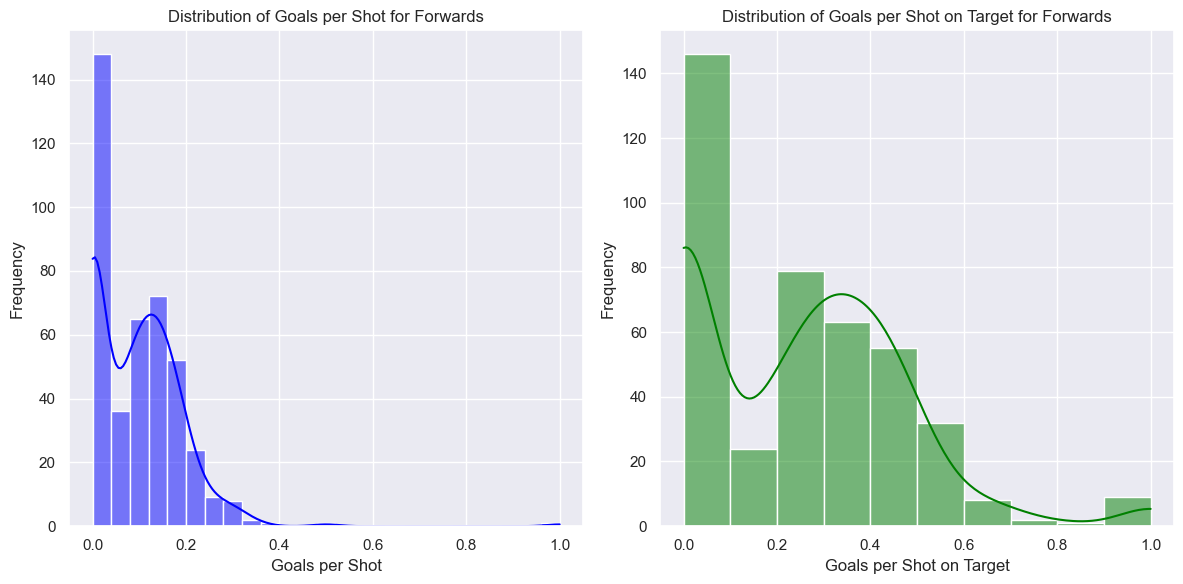

In [13]:
# Forwards
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sb.histplot(FW_Y_GSh, kde=True, color='blue')
plt.title('Distribution of Goals per Shot for Forwards')
plt.xlabel('Goals per Shot')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sb.histplot(FW_Y_GSoT, kde=True, color='green')
plt.title('Distribution of Goals per Shot on Target for Forwards')
plt.xlabel('Goals per Shot on Target')
plt.ylabel('Frequency')

plt.tight_layout()  
plt.show()


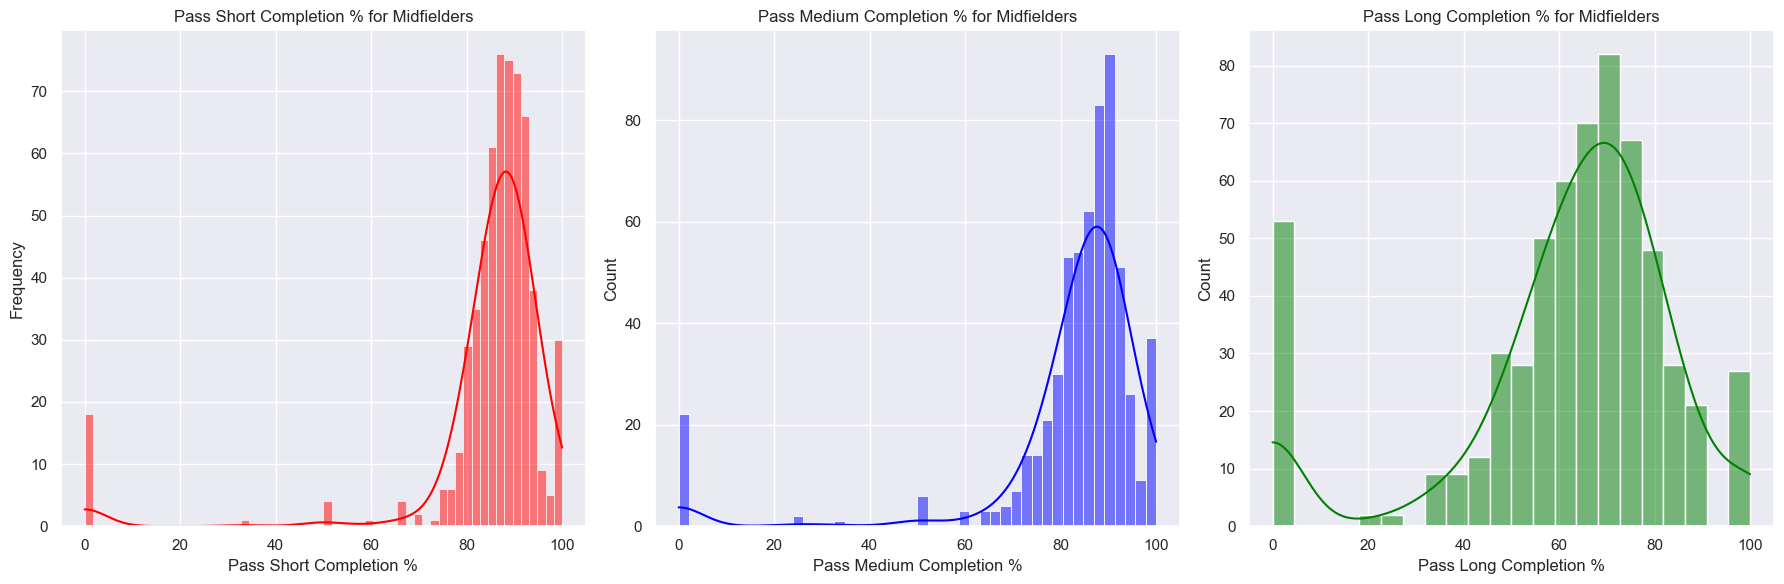

In [14]:
# Midfielders
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sb.histplot(MF_Y_Sho, kde=True, color='red')
plt.title('Pass Short Completion % for Midfielders')
plt.xlabel('Pass Short Completion %')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sb.histplot(MF_Y_Med, kde=True, color='blue')
plt.title('Pass Medium Completion % for Midfielders')
plt.xlabel('Pass Medium Completion %')

plt.subplot(1, 3, 3)
sb.histplot(MF_Y_Lon, kde=True, color='green')
plt.title('Pass Long Completion % for Midfielders')
plt.xlabel('Pass Long Completion %')

plt.tight_layout()
plt.show()


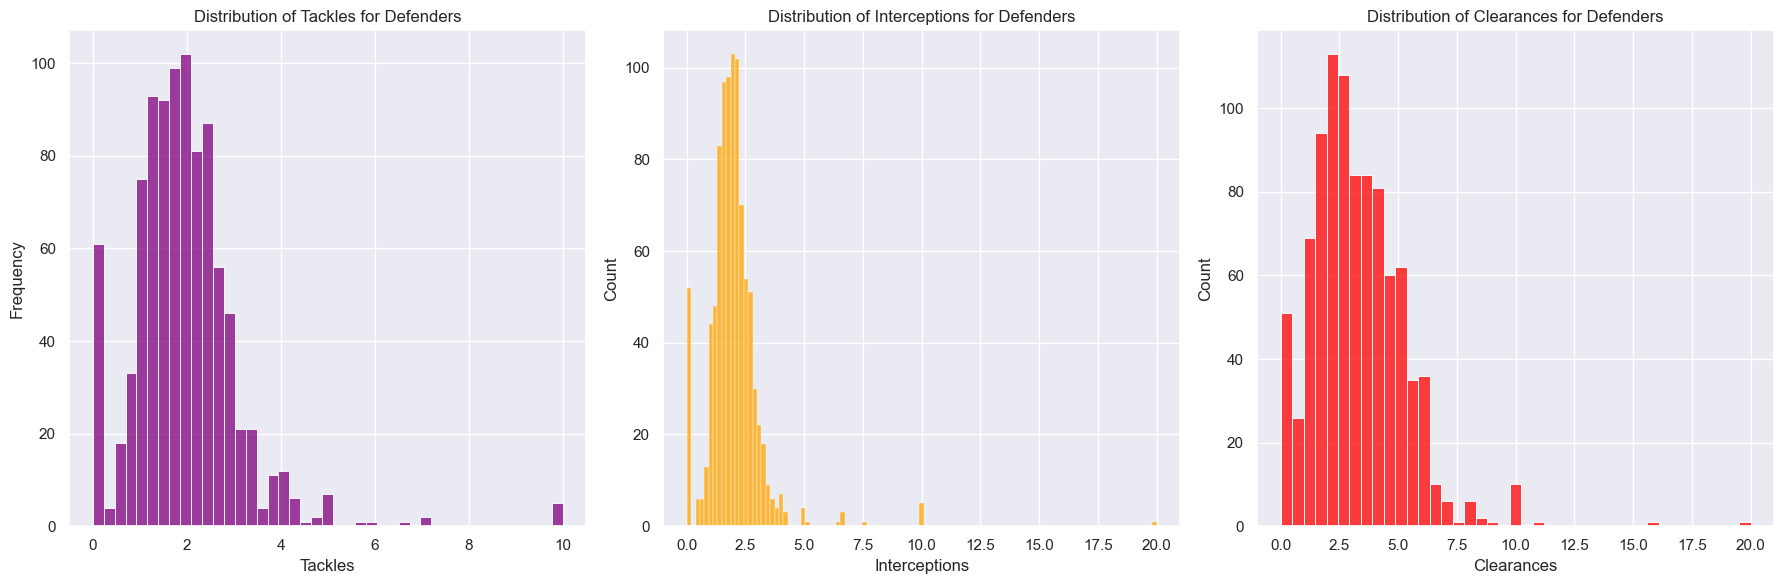

In [15]:
# Defenders
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sb.histplot(DF_Y_Tkl, kde=False, color='purple')
plt.title('Distribution of Tackles for Defenders')
plt.xlabel('Tackles')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sb.histplot(DF_Y_Int, kde=False, color='orange')
plt.title('Distribution of Interceptions for Defenders')
plt.xlabel('Interceptions')

plt.subplot(1, 3, 3)
sb.histplot(DF_Y_Clr, kde=False, color='red')
plt.title('Distribution of Clearances for Defenders')
plt.xlabel('Clearances')

plt.tight_layout()
plt.show()

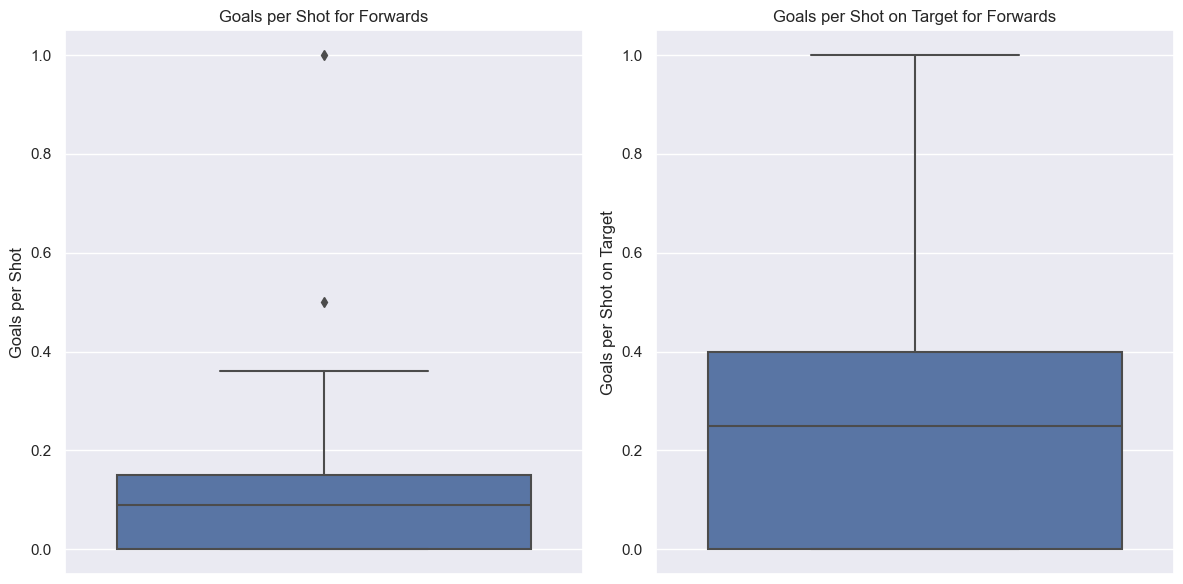

In [16]:
# Boxplot on Forwards
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sb.boxplot(y=FW_Y_GSh)
plt.title('Goals per Shot for Forwards')
plt.ylabel('Goals per Shot')

plt.subplot(1, 2, 2)
sb.boxplot(y=FW_Y_GSoT)
plt.title('Goals per Shot on Target for Forwards')
plt.ylabel('Goals per Shot on Target')

plt.tight_layout()
plt.show()

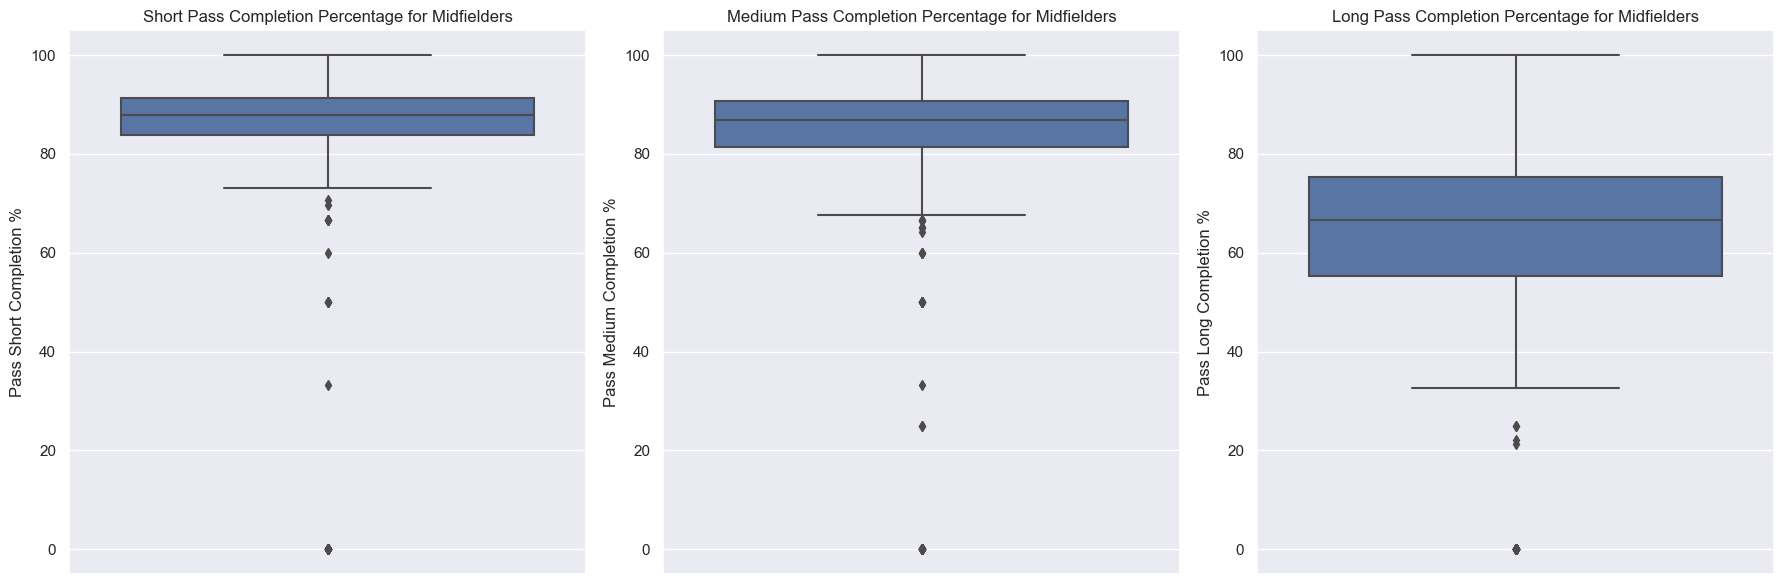

In [17]:
# Boxplot on Midfielders
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sb.boxplot(y=MF_Relevant['PasShoCmp%'])
plt.title('Short Pass Completion Percentage for Midfielders')
plt.ylabel('Pass Short Completion %')

plt.subplot(1, 3, 2)
sb.boxplot(y=MF_Relevant['PasMedCmp%'])
plt.title('Medium Pass Completion Percentage for Midfielders')
plt.ylabel('Pass Medium Completion %')

plt.subplot(1, 3, 3)
sb.boxplot(y=MF_Relevant['PasLonCmp%'])
plt.title('Long Pass Completion Percentage for Midfielders')
plt.ylabel('Pass Long Completion %')

plt.tight_layout()
plt.show()

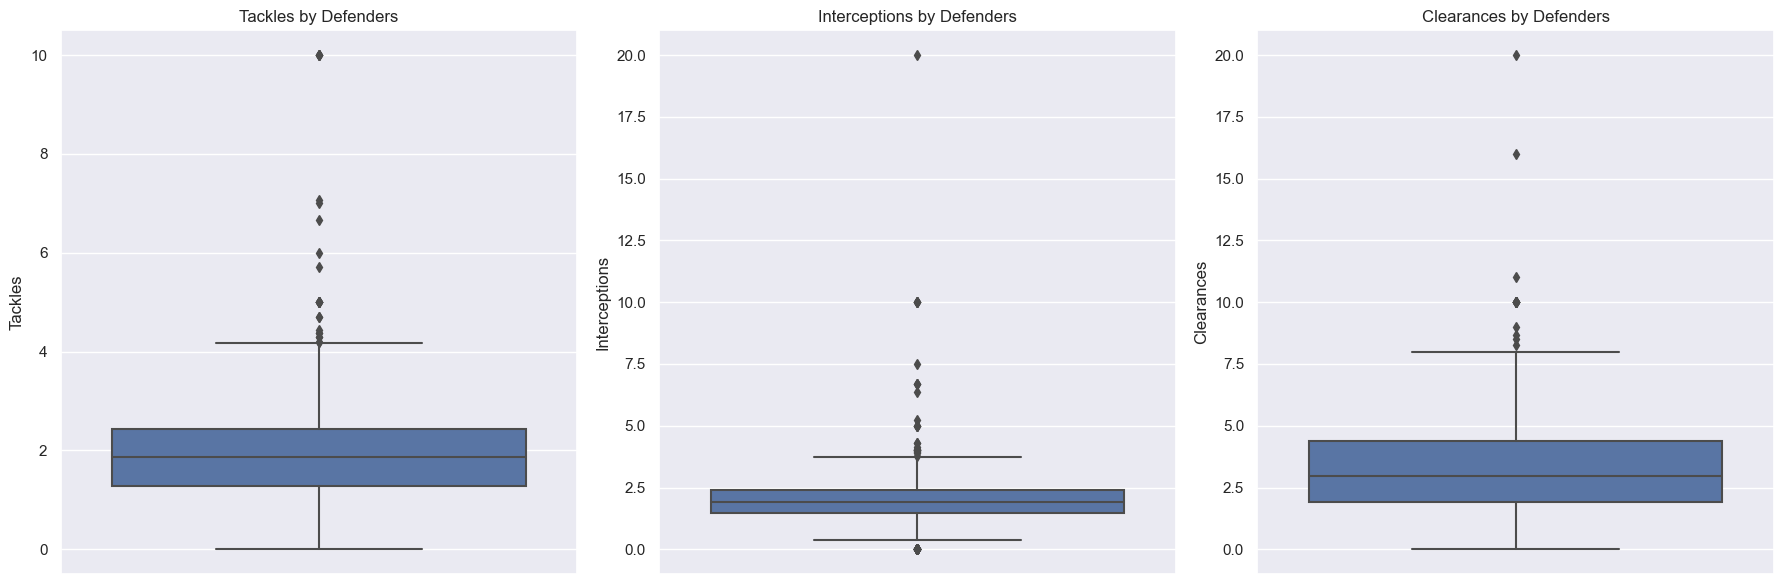

In [18]:
# Boxplot on Defenders
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sb.boxplot(y=DF_Relevant['Tkl'])
plt.title('Tackles by Defenders')
plt.ylabel('Tackles')

plt.subplot(1, 3, 2)
sb.boxplot(y=DF_Relevant['Int'])
plt.title('Interceptions by Defenders')
plt.ylabel('Interceptions')

plt.subplot(1, 3, 3)
sb.boxplot(y=DF_Relevant['Clr'])
plt.title('Clearances by Defenders')
plt.ylabel('Clearances')

plt.tight_layout()
plt.show()


Both the Histogram and the Boxplots show the range of the values for each key variable, providing us with a sense on how to predict them. For example, we can see for the Forwards the Goals/ Shot on Target was analysed. In the histogram, it showed a very clear distribution of the values with relation to the number of players. While the boxplot suggested that almost 50% of data is between 0 to 0.4

### Step 3: Train-Test Split
Since we are working with 3 different roles, with 2, 3, 3 target variables respectively, there are a total of 7 Train-Test split sets that we have to generate. We generate a random number from 0 to 100 to be used as the random_state to ensure that the result is random everytime, but consistent throughout the set.

In [19]:
random = np.random.randint(0, 100)

FW_X_Train, FW_X_Test, FW_Y_Train_GSh, FW_Y_Test_GSh = train_test_split(FW_X, FW_Y_GSh, test_size=0.2, random_state=random)
FW_X_Train, FW_X_Test, FW_Y_Train_GSoT, FW_Y_Test_GSoT = train_test_split(FW_X, FW_Y_GSoT, test_size=0.2, random_state=random)
MF_X_Train, MF_X_Test, MF_Y_Train_Sho, MF_Y_Test_Sho = train_test_split(MF_X, MF_Y_Sho, test_size=0.2, random_state=random)
MF_X_Train, MF_X_Test, MF_Y_Train_Med, MF_Y_Test_Med = train_test_split(MF_X, MF_Y_Med, test_size=0.2, random_state=random)
MF_X_Train, MF_X_Test, MF_Y_Train_Lon, MF_Y_Test_Lon = train_test_split(MF_X, MF_Y_Lon, test_size=0.2, random_state=random)
DF_X_Train, DF_X_Test, DF_Y_Train_Tkl, DF_Y_Test_Tkl = train_test_split(DF_X, DF_Y_Tkl, test_size=0.2, random_state=random)
DF_X_Train, DF_X_Test, DF_Y_Train_Int, DF_Y_Test_Int = train_test_split(DF_X, DF_Y_Int, test_size=0.2, random_state=random)
DF_X_Train, DF_X_Test, DF_Y_Train_Clr, DF_Y_Test_Clr = train_test_split(DF_X, DF_Y_Clr, test_size=0.2, random_state=random)


# Step 4a: Linear Regression
We start with Linear Regression for each set. We fit the Train data through through Linear Regression and create another column in the dataframe for the predicted values.

We plotted the predicted values against the actual values for the Train and Test data, then calculated the R2 and MSE of each model. This gives us an idea of how accurate the predictive model is. This will be done for every model in this project.

Finally, we plotted all the predicted values from the model against the actual values in the dataset.

In [20]:
model_FW_GSh = LinearRegression()
model_FW_GSh.fit(FW_X_Train, FW_Y_Train_GSh)
model_FW_GSoT = LinearRegression()
model_FW_GSoT.fit(FW_X_Train, FW_Y_Train_GSoT)

model_MF_Sho = LinearRegression()
model_MF_Sho.fit(MF_X_Train, MF_Y_Train_Sho)
model_MF_Med = LinearRegression()
model_MF_Med.fit(MF_X_Train, MF_Y_Train_Med)
model_MF_Lon = LinearRegression()
model_MF_Lon.fit(MF_X_Train, MF_Y_Train_Lon)

model_DF_Tkl = LinearRegression()
model_DF_Tkl.fit(DF_X_Train, DF_Y_Train_Tkl)
model_DF_Int = LinearRegression()
model_DF_Int.fit(DF_X_Train, DF_Y_Train_Int)
model_DF_Clr = LinearRegression()
model_DF_Clr.fit(DF_X_Train, DF_Y_Train_Clr)

FW_Relevant['P_G/Sh_LR'] = model_FW_GSh.predict(FW_X)
FW_Relevant['P_G/SoT_LR'] = model_FW_GSoT.predict(FW_X)
MF_Relevant['P_PasCmpSho%_LR'] = model_MF_Sho.predict(MF_X)
MF_Relevant['P_PasCmpMed%_LR'] = model_MF_Med.predict(MF_X)
MF_Relevant['P_PasCmpLon%_LR'] = model_MF_Lon.predict(MF_X)
DF_Relevant['P_Tkl_LR'] = model_DF_Tkl.predict(DF_X)
DF_Relevant['P_Int_LR'] = model_DF_Int.predict(DF_X)
DF_Relevant['P_Clr_LR'] = model_DF_Clr.predict(DF_X)
FW_Relevant.round(2)
MF_Relevant.round(2)
DF_Relevant.round(2)

Player   Tkl   Int   Clr  BlkSh  BlkPass  TklDef3rd  \
0               Max Aarons  2.16  1.75  2.19   0.69     2.00       1.56   
1         Yunis Abdelhamid  1.87  3.11  3.20   0.79     1.09       1.24   
8               Luis Abram  1.13  1.77  6.29   0.81     1.29       0.81   
9         Francesco Acerbi  0.96  1.70  4.08   1.06     0.64       0.64   
12            Marcos Acuña  2.31  1.24  1.20   0.16     1.27       1.31   
...                    ...   ...   ...   ...    ...      ...        ...   
2906  Christoph Zimmermann  2.94  1.76  1.76   0.00     0.00       1.76   
2907   Oleksandr Zinchenko  1.72  1.55  1.12   0.26     1.29       0.60   
2912        Banhie Zoukrou  1.11  2.22  1.11   0.00     0.00       1.11   
2913            Kurt Zouma  0.48  2.03  6.06   1.17     0.48       0.39   
2915         Igor Zubeldia  1.42  1.69  3.44   0.49     0.98       0.93   

      TklMid3rd  PasTotCmp%  PasLonCmp%  AerWon%  AerWon  P_Tkl_LR  P_Int_LR  \
0          0.59        75.5        45.2     22.7    0.47      2.36      1.91   
1          0.60        82.4        61.7     59.8    2.02      1.98      1.99   
8          0.16        88.2        75.0     44.4    1.94      1.09      1.81   
9          0.32        90.3        77.1     64.0    2.84      1.04      1.84   
12         0.60        79.4        58.0     47.1    1.31      2.09      1.95   
...         ...         ...         ...      ...     ...       ...       ...   
2906       1.18        72.7        47.1     66.7    1.18      3.12      2.14   
2907       0.86        89.3        73.0     51.5    1.47      1.64      1.92   
2912       0.00        92.3        75.0     33.3    1.11      1.21      1.61   
2913       0.09        88.9        70.3     68.8    2.38      0.56      1.72   
2915       0.49        88.8        78.4     55.2    2.62      1.54      1.92   

      P_Clr_LR  
0         2.19  
1         3.46  
8         3.45  
9         4.28  
12        2.42  
...        ...  
2906      2.31  
2907      2.45  
2912      2.39  
2913      4.18  
2915      3.57  

[942 rows x 15 columns]

Goodness of Fit of Model 	Train G/Sh Dataset
Explained Variance (R^2) 	: 0.7245261703775355
Mean Squared Error (MSE) 	: 0.0020831526141245286
Goodness of Fit of Model 	Test G/Sh Dataset
Explained Variance (R^2) 	: 0.8678060301388952
Mean Squared Error (MSE) 	: 0.002099995635507837

Goodness of Fit of Model 	Train G/SoT Dataset
Explained Variance (R^2) 	: 0.6113962489426505
Mean Squared Error (MSE) 	: 0.019879923547744534
Goodness of Fit of Model 	Test G/SoT Dataset
Explained Variance (R^2) 	: -0.035374001032122404
Mean Squared Error (MSE) 	: 0.05117230349692997


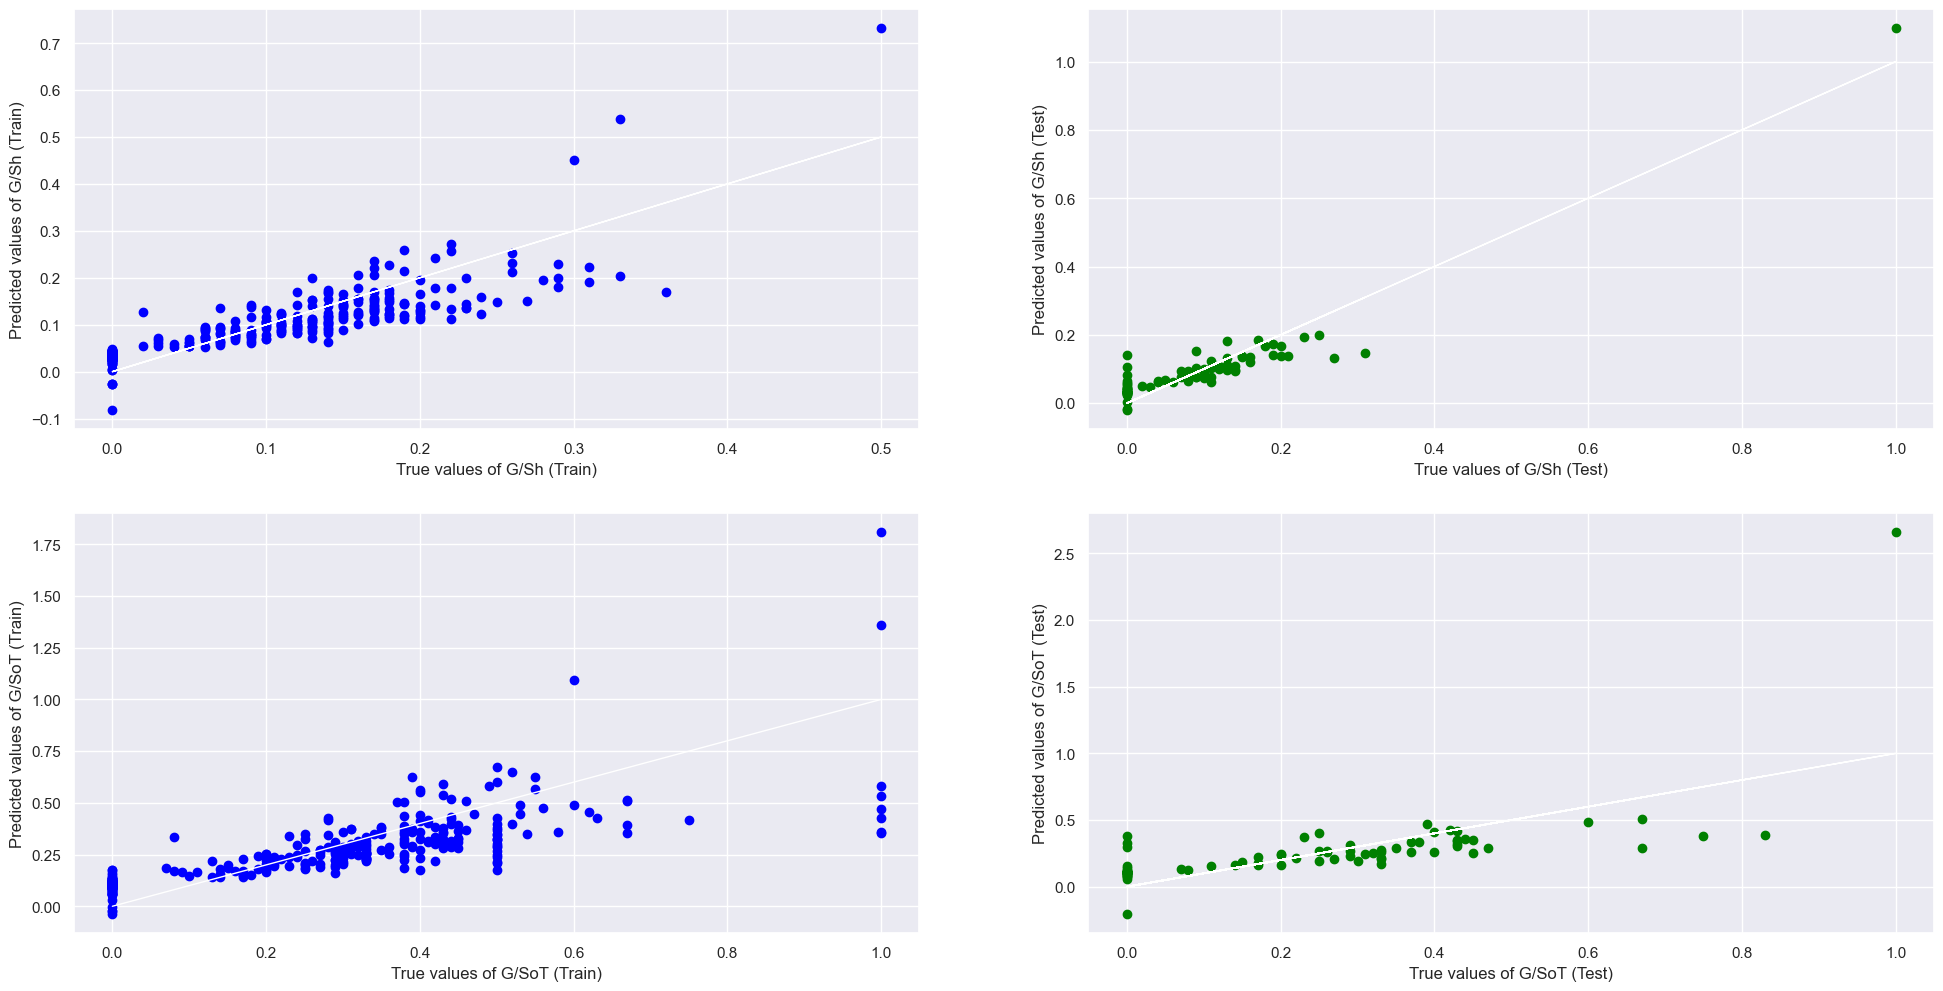

In [21]:
f, axes = plt.subplots(2, 2, figsize=(24, 12))
axes[0][0].scatter(FW_Y_Train_GSh, model_FW_GSh.predict(FW_X_Train), color = "blue")
axes[0][0].plot(FW_Y_Train_GSh, FW_Y_Train_GSh, 'w-', linewidth = 1)
axes[0][0].set_xlabel("True values of G/Sh (Train)")
axes[0][0].set_ylabel("Predicted values of G/Sh (Train)")
axes[0][1].scatter(FW_Y_Test_GSh, model_FW_GSh.predict(FW_X_Test), color = "green")
axes[0][1].plot(FW_Y_Test_GSh, FW_Y_Test_GSh, 'w-', linewidth = 1)
axes[0][1].set_xlabel("True values of G/Sh (Test)")
axes[0][1].set_ylabel("Predicted values of G/Sh (Test)")

axes[1][0].scatter(FW_Y_Train_GSoT, model_FW_GSoT.predict(FW_X_Train), color = "blue")
axes[1][0].plot(FW_Y_Train_GSoT, FW_Y_Train_GSoT, 'w-', linewidth = 1)
axes[1][0].set_xlabel("True values of G/SoT (Train)")
axes[1][0].set_ylabel("Predicted values of G/SoT (Train)")
axes[1][1].scatter(FW_Y_Test_GSoT, model_FW_GSoT.predict(FW_X_Test), color = "green")
axes[1][1].plot(FW_Y_Test_GSoT, FW_Y_Test_GSoT, 'w-', linewidth = 1)
axes[1][1].set_xlabel("True values of G/SoT (Test)")
axes[1][1].set_ylabel("Predicted values of G/SoT (Test)")

print("Goodness of Fit of Model \tTrain G/Sh Dataset")
print("Explained Variance (R^2) \t:", model_FW_GSh.score(FW_X_Train, FW_Y_Train_GSh))
print("Mean Squared Error (MSE) \t:", mean_squared_error(FW_Y_Train_GSh, model_FW_GSh.predict(FW_X_Train)))
print("Goodness of Fit of Model \tTest G/Sh Dataset")
print("Explained Variance (R^2) \t:", model_FW_GSh.score(FW_X_Test, FW_Y_Test_GSh))
print("Mean Squared Error (MSE) \t:", mean_squared_error(FW_Y_Test_GSh, model_FW_GSh.predict(FW_X_Test)))
print()
print("Goodness of Fit of Model \tTrain G/SoT Dataset")
print("Explained Variance (R^2) \t:", model_FW_GSoT.score(FW_X_Train, FW_Y_Train_GSoT))
print("Mean Squared Error (MSE) \t:", mean_squared_error(FW_Y_Train_GSoT, model_FW_GSoT.predict(FW_X_Train)))
print("Goodness of Fit of Model \tTest G/SoT Dataset")
print("Explained Variance (R^2) \t:", model_FW_GSoT.score(FW_X_Test, FW_Y_Test_GSoT))
print("Mean Squared Error (MSE) \t:", mean_squared_error(FW_Y_Test_GSoT, model_FW_GSoT.predict(FW_X_Test)))

plt.show()

Goodness of Fit of Model 	Train Sho Dataset
Explained Variance (R^2) 	: 0.3251488230660454
Mean Squared Error (MSE) 	: 200.2991380884894
Goodness of Fit of Model 	Test Sho Data
Explained Variance (R^2) 	: -0.8396515964350115
Mean Squared Error (MSE) 	: 295.55713644959565

Goodness of Fit of Model 	Train Med Dataset
Explained Variance (R^2) 	: 0.3637336225509912
Mean Squared Error (MSE) 	: 223.30007145704178
Goodness of Fit of Model 	Test Med Dataset
Explained Variance (R^2) 	: 0.20624101927543814
Mean Squared Error (MSE) 	: 237.55936223594827

Goodness of Fit of Model 	Train Lon Dataset
Explained Variance (R^2) 	: 0.43478238075948306
Mean Squared Error (MSE) 	: 331.349845326726
Goodness of Fit of Model 	Test Lon Dataset
Explained Variance (R^2) 	: 0.266662974313129
Mean Squared Error (MSE) 	: 338.6499657051742


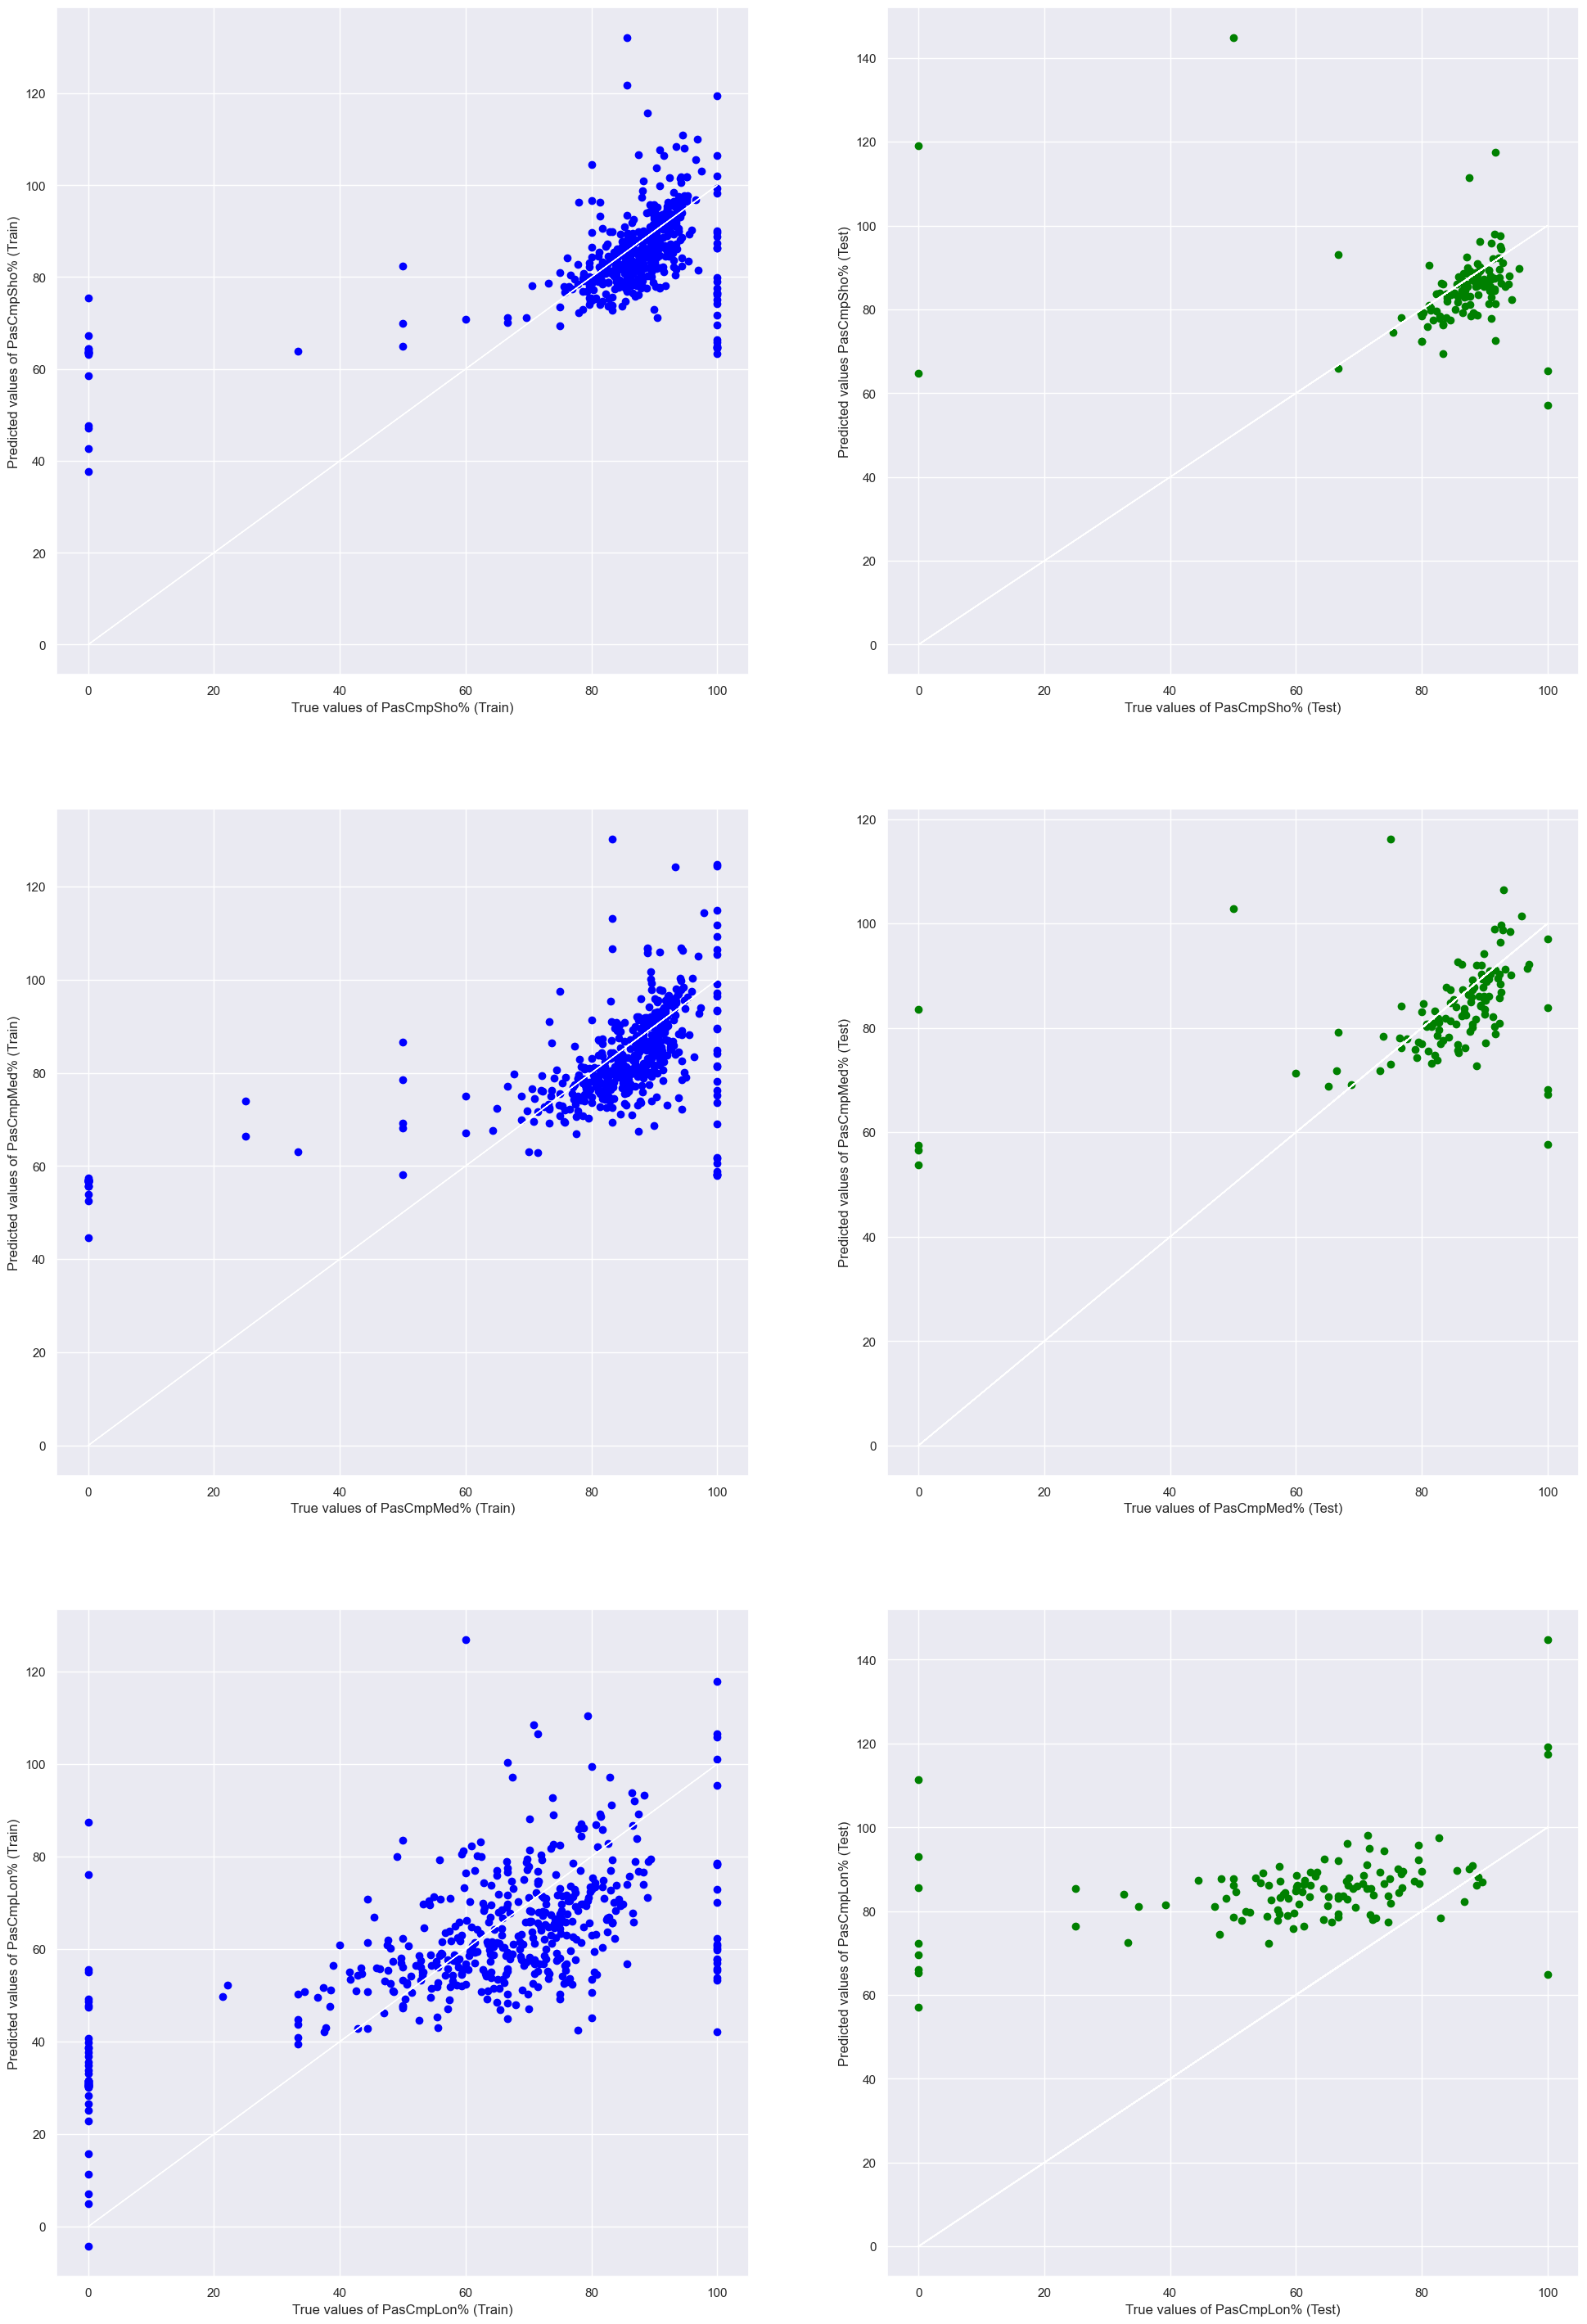

In [22]:
f, axes = plt.subplots(3, 2, figsize=(24, 36))
axes[0][0].scatter(MF_Y_Train_Sho, model_MF_Sho.predict(MF_X_Train), color = "blue")
axes[0][0].plot(MF_Y_Train_Sho, MF_Y_Train_Sho, 'w-', linewidth = 1)
axes[0][0].set_xlabel("True values of PasCmpSho% (Train)")
axes[0][0].set_ylabel("Predicted values of PasCmpSho% (Train)")
axes[0][1].scatter(MF_Y_Test_Sho, model_MF_Sho.predict(MF_X_Test), color = "green")
axes[0][1].plot(MF_Y_Test_Sho, MF_Y_Test_Sho, 'w-', linewidth = 1)
axes[0][1].set_xlabel("True values of PasCmpSho% (Test)")
axes[0][1].set_ylabel("Predicted values PasCmpSho% (Test)")

axes[1][0].scatter(MF_Y_Train_Med, model_MF_Med.predict(MF_X_Train), color = "blue")
axes[1][0].plot(MF_Y_Train_Med, MF_Y_Train_Med, 'w-', linewidth = 1)
axes[1][0].set_xlabel("True values of PasCmpMed% (Train)")
axes[1][0].set_ylabel("Predicted values of PasCmpMed% (Train)")
axes[1][1].scatter(MF_Y_Test_Med, model_MF_Med.predict(MF_X_Test), color = "green")
axes[1][1].plot(MF_Y_Test_Med, MF_Y_Test_Med, 'w-', linewidth = 1)
axes[1][1].set_xlabel("True values of PasCmpMed% (Test)")
axes[1][1].set_ylabel("Predicted values of PasCmpMed% (Test)")

axes[2][0].scatter(MF_Y_Train_Lon, model_MF_Lon.predict(MF_X_Train), color = "blue")
axes[2][0].plot(MF_Y_Train_Lon, MF_Y_Train_Lon, 'w-', linewidth = 1)
axes[2][0].set_xlabel("True values of PasCmpLon% (Train)")
axes[2][0].set_ylabel("Predicted values of PasCmpLon% (Train)")
axes[2][1].scatter(MF_Y_Test_Lon, model_MF_Sho.predict(MF_X_Test), color = "green")
axes[2][1].plot(MF_Y_Test_Lon, MF_Y_Test_Lon, 'w-', linewidth = 1)
axes[2][1].set_xlabel("True values of PasCmpLon% (Test)")
axes[2][1].set_ylabel("Predicted values of PasCmpLon% (Test)")

print("Goodness of Fit of Model \tTrain Sho Dataset")
print("Explained Variance (R^2) \t:", model_MF_Sho.score(MF_X_Train, MF_Y_Train_Sho))
print("Mean Squared Error (MSE) \t:", mean_squared_error(MF_Y_Train_Sho, model_MF_Sho.predict(MF_X_Train)))
print("Goodness of Fit of Model \tTest Sho Data")
print("Explained Variance (R^2) \t:", model_MF_Sho.score(MF_X_Test, MF_Y_Test_Sho))
print("Mean Squared Error (MSE) \t:", mean_squared_error(MF_Y_Test_Sho, model_MF_Sho.predict(MF_X_Test)))
print()
print("Goodness of Fit of Model \tTrain Med Dataset")
print("Explained Variance (R^2) \t:", model_MF_Med.score(MF_X_Train, MF_Y_Train_Med))
print("Mean Squared Error (MSE) \t:", mean_squared_error(MF_Y_Train_Med, model_MF_Med.predict(MF_X_Train)))
print("Goodness of Fit of Model \tTest Med Dataset")
print("Explained Variance (R^2) \t:", model_MF_Med.score(MF_X_Test, MF_Y_Test_Med))
print("Mean Squared Error (MSE) \t:", mean_squared_error(MF_Y_Test_Med, model_MF_Med.predict(MF_X_Test)))
print()
print("Goodness of Fit of Model \tTrain Lon Dataset")
print("Explained Variance (R^2) \t:", model_MF_Lon.score(MF_X_Train, MF_Y_Train_Lon))
print("Mean Squared Error (MSE) \t:", mean_squared_error(MF_Y_Train_Lon, model_MF_Lon.predict(MF_X_Train)))
print("Goodness of Fit of Model \tTest Lon Dataset")
print("Explained Variance (R^2) \t:", model_MF_Lon.score(MF_X_Test, MF_Y_Test_Lon))
print("Mean Squared Error (MSE) \t:", mean_squared_error(MF_Y_Test_Lon, model_MF_Lon.predict(MF_X_Test)))

plt.show()

Goodness of Fit of Model 	Train Tkl Dataset
Explained Variance (R^2) 	: 0.9723477690890211
Mean Squared Error (MSE) 	: 0.039542333538474805
Goodness of Fit of Model 	Test Tkl Data
Explained Variance (R^2) 	: 0.9649009605596428
Mean Squared Error (MSE) 	: 0.03253326693707409

Goodness of Fit of Model 	Train Int Dataset
Explained Variance (R^2) 	: 0.08638214902634234
Mean Squared Error (MSE) 	: 1.012470357264308
Goodness of Fit of Model 	Test Int Dataset
Explained Variance (R^2) 	: 0.018484689334062776
Mean Squared Error (MSE) 	: 2.905908146690988

Goodness of Fit of Model 	Train Clr Dataset
Explained Variance (R^2) 	: 0.3902390711148017
Mean Squared Error (MSE) 	: 2.4575895174792466
Goodness of Fit of Model 	Test Clr Dataset
Explained Variance (R^2) 	: 0.388750837089333
Mean Squared Error (MSE) 	: 1.977780895811499


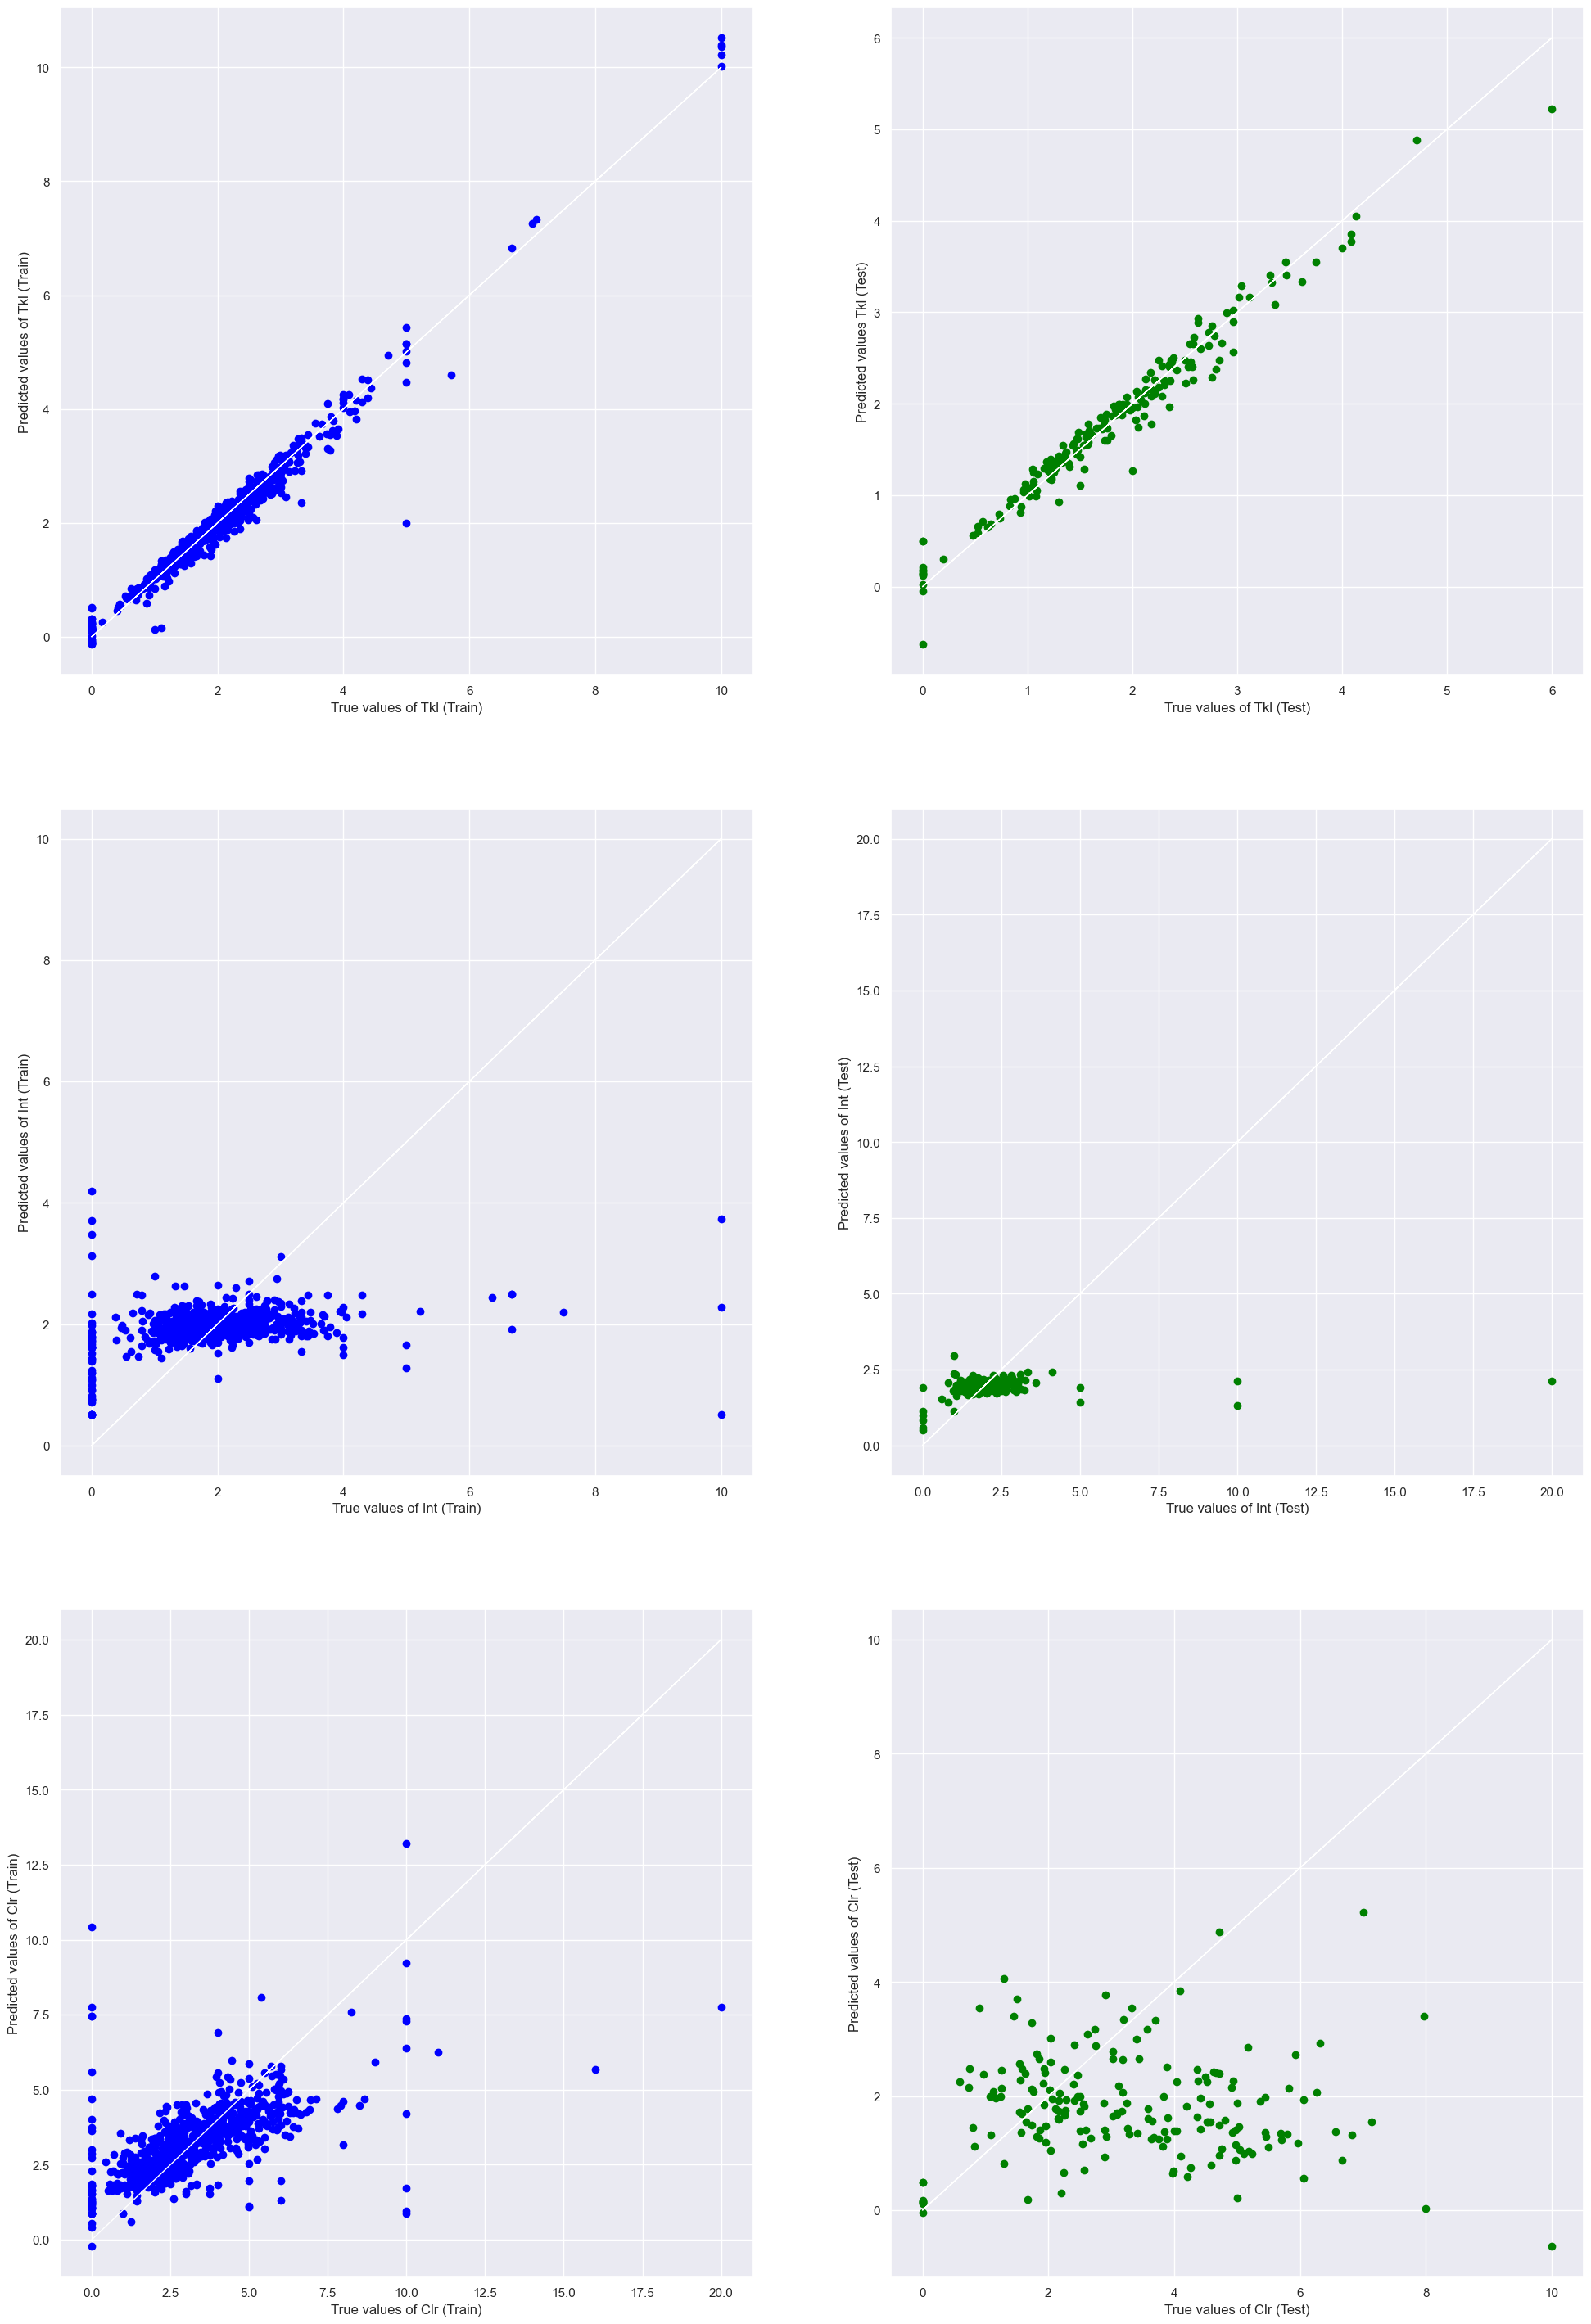

In [23]:
f, axes = plt.subplots(3, 2, figsize=(24, 36))
axes[0][0].scatter(DF_Y_Train_Tkl, model_DF_Tkl.predict(DF_X_Train), color = "blue")
axes[0][0].plot(DF_Y_Train_Tkl, DF_Y_Train_Tkl, 'w-', linewidth = 1)
axes[0][0].set_xlabel("True values of Tkl (Train)")
axes[0][0].set_ylabel("Predicted values of Tkl (Train)")
axes[0][1].scatter(DF_Y_Test_Tkl, model_DF_Tkl.predict(DF_X_Test), color = "green")
axes[0][1].plot(DF_Y_Test_Tkl, DF_Y_Test_Tkl, 'w-', linewidth = 1)
axes[0][1].set_xlabel("True values of Tkl (Test)")
axes[0][1].set_ylabel("Predicted values Tkl (Test)")

axes[1][0].scatter(DF_Y_Train_Int, model_DF_Int.predict(DF_X_Train), color = "blue")
axes[1][0].plot(DF_Y_Train_Int, DF_Y_Train_Int, 'w-', linewidth = 1)
axes[1][0].set_xlabel("True values of Int (Train)")
axes[1][0].set_ylabel("Predicted values of Int (Train)")
axes[1][1].scatter(DF_Y_Test_Int, model_DF_Int.predict(DF_X_Test), color = "green")
axes[1][1].plot(DF_Y_Test_Int, DF_Y_Test_Int, 'w-', linewidth = 1)
axes[1][1].set_xlabel("True values of Int (Test)")
axes[1][1].set_ylabel("Predicted values of Int (Test)")

axes[2][0].scatter(DF_Y_Train_Clr, model_DF_Clr.predict(DF_X_Train), color = "blue")
axes[2][0].plot(DF_Y_Train_Clr, DF_Y_Train_Clr, 'w-', linewidth = 1)
axes[2][0].set_xlabel("True values of Clr (Train)")
axes[2][0].set_ylabel("Predicted values of Clr (Train)")
axes[2][1].scatter(DF_Y_Test_Clr, model_DF_Tkl.predict(DF_X_Test), color = "green")
axes[2][1].plot(DF_Y_Test_Clr, DF_Y_Test_Clr, 'w-', linewidth = 1)
axes[2][1].set_xlabel("True values of Clr (Test)")
axes[2][1].set_ylabel("Predicted values of Clr (Test)")

print("Goodness of Fit of Model \tTrain Tkl Dataset")
print("Explained Variance (R^2) \t:", model_DF_Tkl.score(DF_X_Train, DF_Y_Train_Tkl))
print("Mean Squared Error (MSE) \t:", mean_squared_error(DF_Y_Train_Tkl, model_DF_Tkl.predict(DF_X_Train)))
print("Goodness of Fit of Model \tTest Tkl Data")
print("Explained Variance (R^2) \t:", model_DF_Tkl.score(DF_X_Test, DF_Y_Test_Tkl))
print("Mean Squared Error (MSE) \t:", mean_squared_error(DF_Y_Test_Tkl, model_DF_Tkl.predict(DF_X_Test)))
print()
print("Goodness of Fit of Model \tTrain Int Dataset")
print("Explained Variance (R^2) \t:", model_DF_Int.score(DF_X_Train, DF_Y_Train_Int))
print("Mean Squared Error (MSE) \t:", mean_squared_error(DF_Y_Train_Int, model_DF_Int.predict(DF_X_Train)))
print("Goodness of Fit of Model \tTest Int Dataset")
print("Explained Variance (R^2) \t:", model_DF_Int.score(DF_X_Test, DF_Y_Test_Int))
print("Mean Squared Error (MSE) \t:", mean_squared_error(DF_Y_Test_Int, model_DF_Int.predict(DF_X_Test)))
print()
print("Goodness of Fit of Model \tTrain Clr Dataset")
print("Explained Variance (R^2) \t:", model_DF_Clr.score(DF_X_Train, DF_Y_Train_Clr))
print("Mean Squared Error (MSE) \t:", mean_squared_error(DF_Y_Train_Clr, model_DF_Clr.predict(DF_X_Train)))
print("Goodness of Fit of Model \tTest Clr Dataset")
print("Explained Variance (R^2) \t:", model_DF_Clr.score(DF_X_Test, DF_Y_Test_Clr))
print("Mean Squared Error (MSE) \t:", mean_squared_error(DF_Y_Test_Clr, model_DF_Clr.predict(DF_X_Test)))


plt.show()

In [24]:
GSh_linear_mse = mean_squared_error(FW_Y_GSh, FW_Relevant['P_G/Sh_LR'])
GSh_linear_r2=r2_score(FW_Y_GSh, FW_Relevant['P_G/Sh_LR'])
GSoT_linear_mse = mean_squared_error(FW_Y_GSoT, FW_Relevant['P_G/SoT_LR'])
GSoT_linear_r2=r2_score(FW_Y_GSoT, FW_Relevant['P_G/SoT_LR'])

Sho_linear_mse = mean_squared_error(MF_Y_Sho, MF_Relevant['P_PasCmpSho%_LR'])
Sho_linear_r2=r2_score(MF_Y_Sho, MF_Relevant['P_PasCmpSho%_LR'])
Med_linear_mse = mean_squared_error(MF_Y_Med, MF_Relevant['P_PasCmpMed%_LR'])
Med_linear_r2=r2_score(MF_Y_Med, MF_Relevant['P_PasCmpMed%_LR'])
Lon_linear_mse = mean_squared_error(MF_Y_Lon, MF_Relevant['P_PasCmpLon%_LR'])
Lon_linear_r2=r2_score(MF_Y_Lon, MF_Relevant['P_PasCmpLon%_LR'])

Tkl_linear_mse = mean_squared_error(DF_Y_Tkl, DF_Relevant['P_Tkl_LR'])
Tkl_linear_r2=r2_score(DF_Y_Tkl, DF_Relevant['P_Tkl_LR'])
Int_linear_mse = mean_squared_error(DF_Y_Int, DF_Relevant['P_Tkl_LR'])
Int_linear_r2=r2_score(DF_Y_Int, DF_Relevant['P_Tkl_LR'])
Clr_linear_mse = mean_squared_error(DF_Y_Clr, DF_Relevant['P_Tkl_LR'])
Clr_linear_r2=r2_score(DF_Y_Clr, DF_Relevant['P_Tkl_LR'])

Linear Regression for Forwards:
G/Sh Mean Squared Error: 	 0.0020865292580295354
G/Sh R-squared: 		 0.7740777621507793
G/SoT Mean Squared Error: 	 0.026153336234454736
G/SoT R-squared: 		 0.48671061636064783
Linear Regression for MidFielders:
Sho Mean Squared Error: 	 219.41445548536691
Sho R-squared: 			 0.18613799972286327
Med Mean Squared Error: 	 226.1614675999662
Med R-squared: 			 0.3360654214722347
Lon Mean Squared Error: 	 332.8147524260802
Lon R-squared: 			 0.40710318865350215
Linear Regression for Defenders:
Tkl Mean Squared Error: 	 0.038136055844563206
Tkl R-squared: 			 0.9714228814689483
Int Mean Squared Error: 	 2.3491797170293935
Int R-squared: 			 -0.582759213659348
Clr Mean Squared Error: 	 6.932582580645016
Clr R-squared: 			 -0.7909205379428914


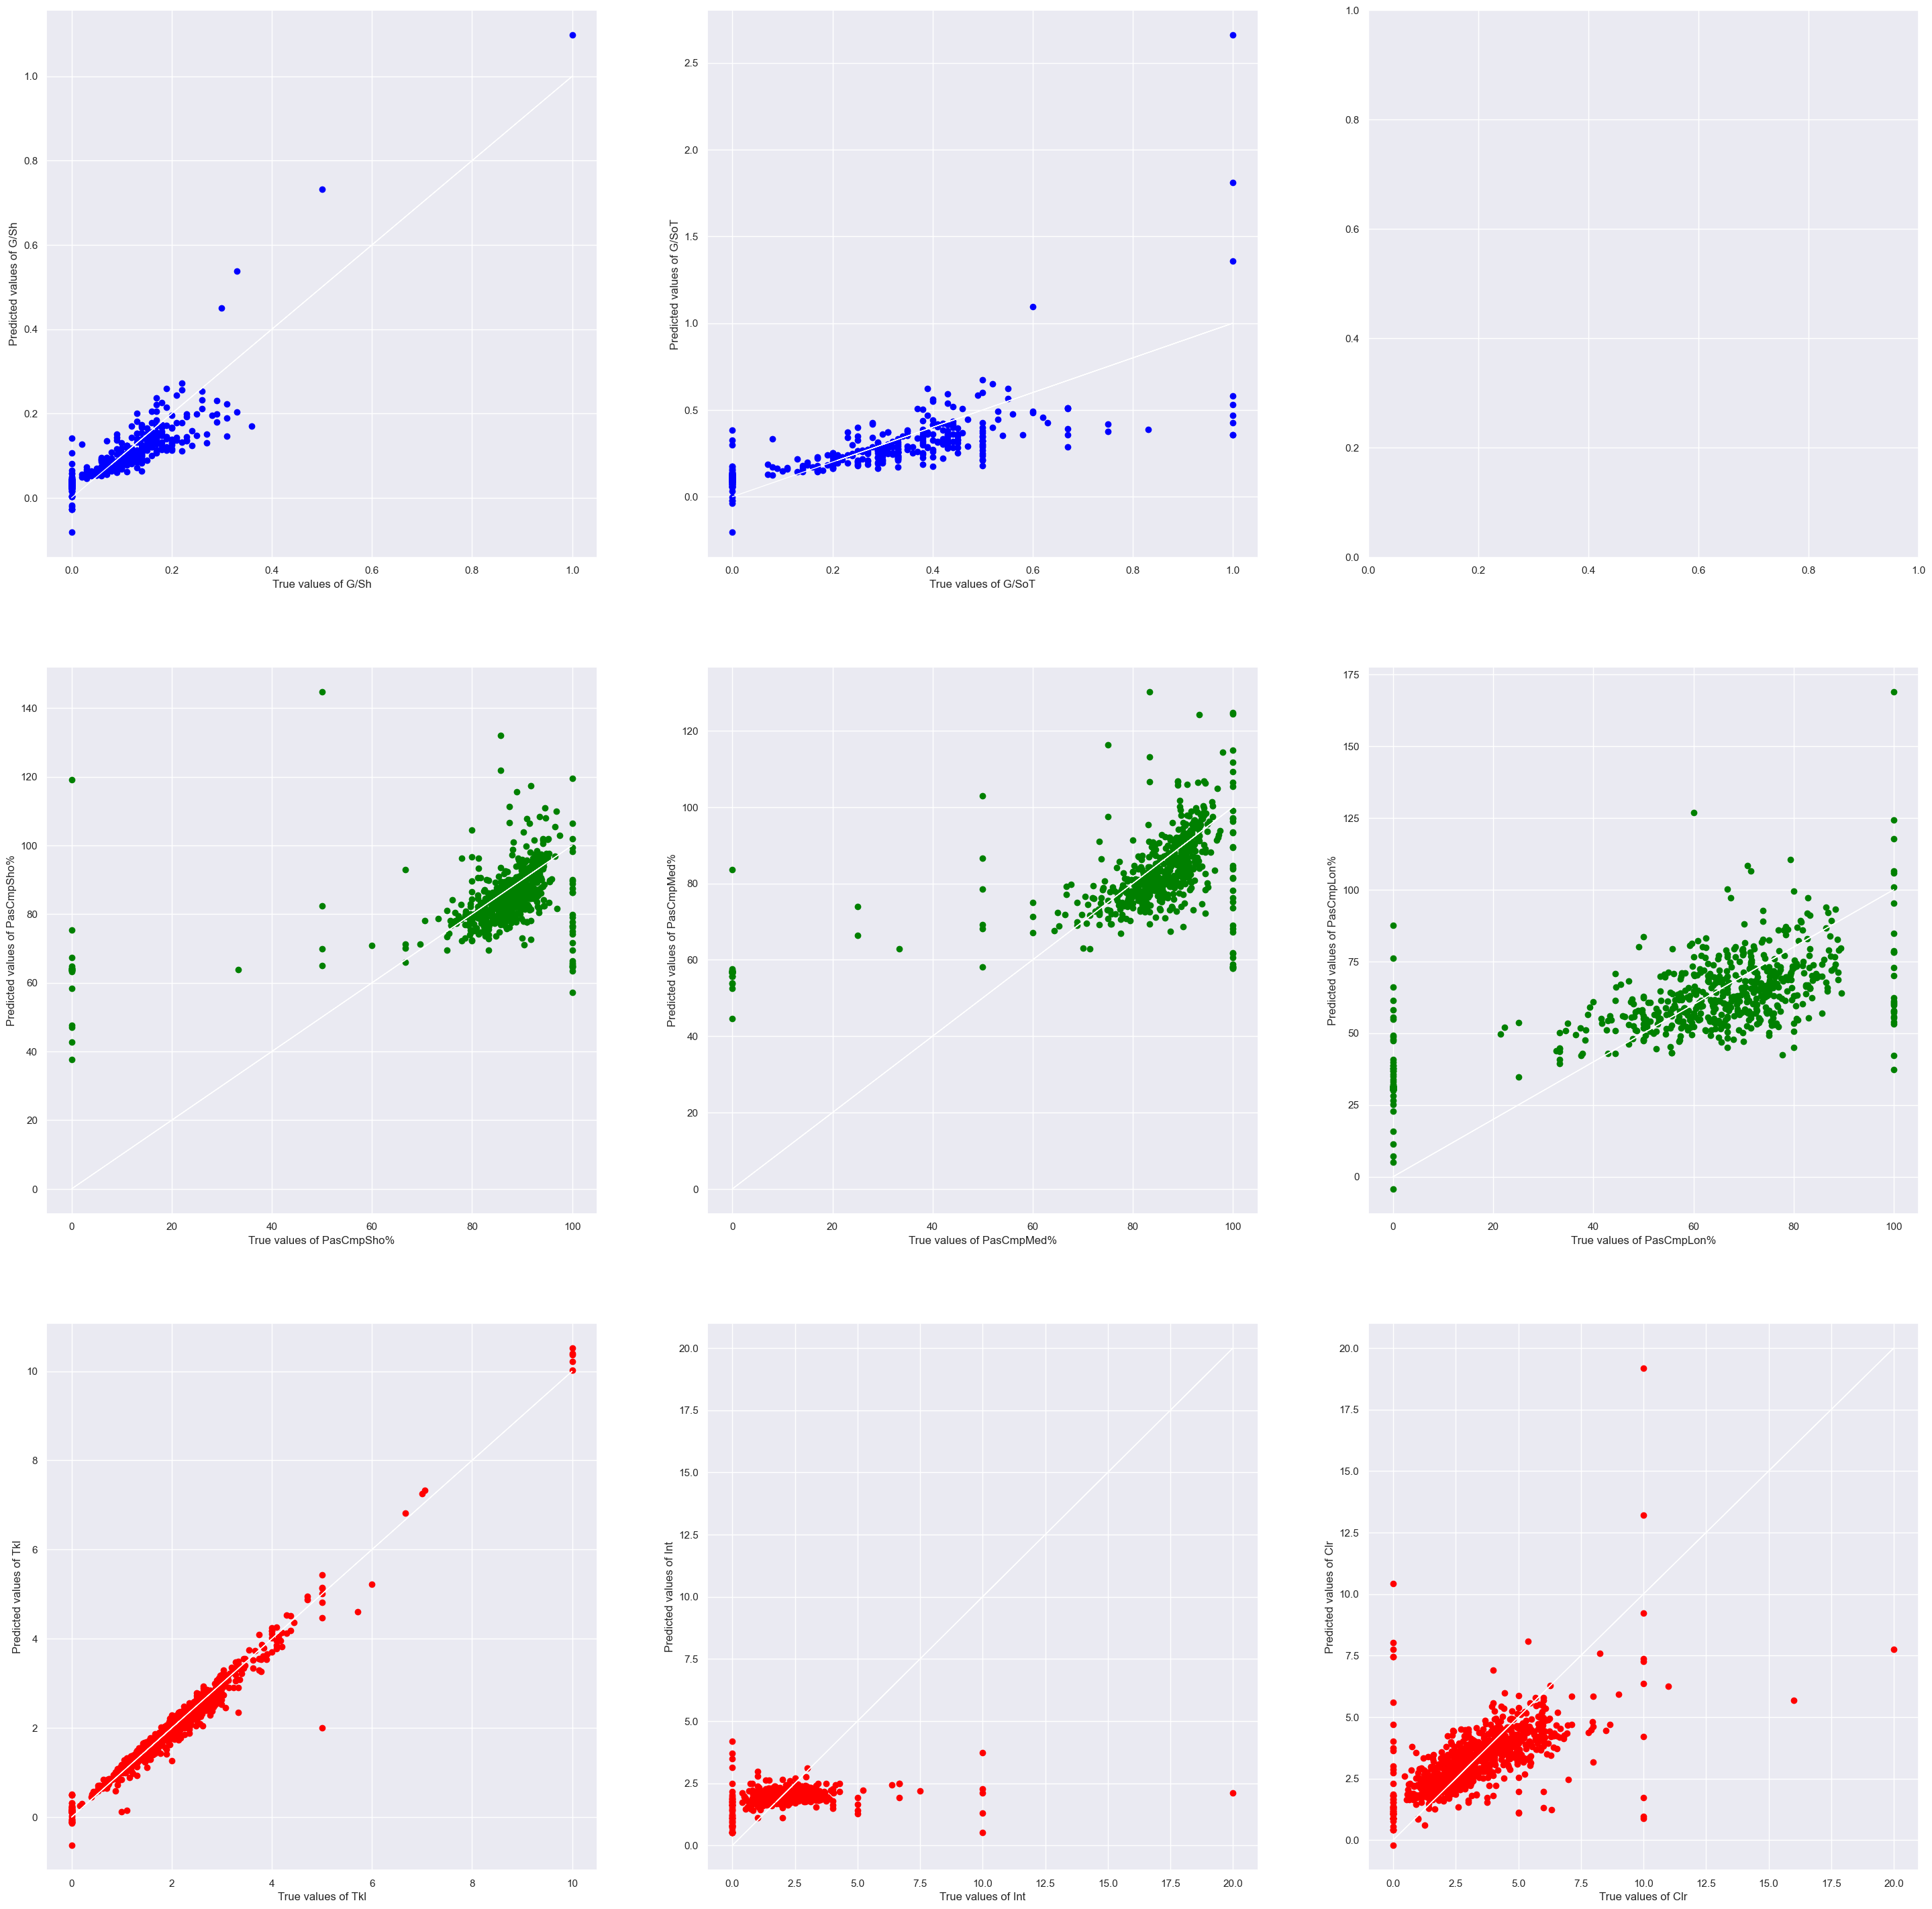

In [25]:
f, axes = plt.subplots(3, 3, figsize=(36, 36))
axes[0][0].scatter(FW_Y_GSh, FW_Relevant['P_G/Sh_LR'], color = "blue")
axes[0][0].plot(FW_Y_GSh, FW_Y_GSh, 'w-', linewidth = 1)
axes[0][0].set_xlabel("True values of G/Sh")
axes[0][0].set_ylabel("Predicted values of G/Sh")
axes[0][1].scatter(FW_Y_GSoT, FW_Relevant['P_G/SoT_LR'], color = "blue")
axes[0][1].plot(FW_Y_GSoT, FW_Y_GSoT, 'w-', linewidth = 1)
axes[0][1].set_xlabel("True values of G/SoT")
axes[0][1].set_ylabel("Predicted values of G/SoT")

axes[1][0].scatter(MF_Y_Sho, MF_Relevant['P_PasCmpSho%_LR'], color = "green")
axes[1][0].plot(MF_Y_Sho, MF_Y_Sho, 'w-', linewidth = 1)
axes[1][0].set_xlabel("True values of PasCmpSho%")
axes[1][0].set_ylabel("Predicted values of PasCmpSho%")
axes[1][1].scatter(MF_Y_Med, MF_Relevant['P_PasCmpMed%_LR'], color = "green")
axes[1][1].plot(MF_Y_Med, MF_Y_Med, 'w-', linewidth = 1)
axes[1][1].set_xlabel("True values of PasCmpMed%")
axes[1][1].set_ylabel("Predicted values of PasCmpMed%")
axes[1][2].scatter(MF_Y_Lon, MF_Relevant['P_PasCmpLon%_LR'], color = "green")
axes[1][2].plot(MF_Y_Lon, MF_Y_Lon, 'w-', linewidth = 1)
axes[1][2].set_xlabel("True values of PasCmpLon%")
axes[1][2].set_ylabel("Predicted values of PasCmpLon%")

axes[2][0].scatter(DF_Y_Tkl, DF_Relevant['P_Tkl_LR'], color = "red")
axes[2][0].plot(DF_Y_Tkl, DF_Y_Tkl, 'w-', linewidth = 1)
axes[2][0].set_xlabel("True values of Tkl")
axes[2][0].set_ylabel("Predicted values of Tkl")
axes[2][1].scatter(DF_Y_Int, DF_Relevant['P_Int_LR'], color = "red")
axes[2][1].plot(DF_Y_Int, DF_Y_Int, 'w-', linewidth = 1)
axes[2][1].set_xlabel("True values of Int")
axes[2][1].set_ylabel("Predicted values of Int")
axes[2][2].scatter(DF_Y_Clr, DF_Relevant['P_Clr_LR'], color = "red")
axes[2][2].plot(DF_Y_Clr, DF_Y_Clr, 'w-', linewidth = 1)
axes[2][2].set_xlabel("True values of Clr")
axes[2][2].set_ylabel("Predicted values of Clr")

print("Linear Regression for Forwards:")
print("G/Sh Mean Squared Error: \t", GSh_linear_mse)
print("G/Sh R-squared: \t\t", GSh_linear_r2)
print("G/SoT Mean Squared Error: \t", GSoT_linear_mse)
print("G/SoT R-squared: \t\t", GSoT_linear_r2)

print("Linear Regression for MidFielders:")
print("Sho Mean Squared Error: \t", Sho_linear_mse)
print("Sho R-squared: \t\t\t", Sho_linear_r2)
print("Med Mean Squared Error: \t", Med_linear_mse)
print("Med R-squared: \t\t\t", Med_linear_r2)
print("Lon Mean Squared Error: \t", Lon_linear_mse)
print("Lon R-squared: \t\t\t", Lon_linear_r2)

print("Linear Regression for Defenders:")
print("Tkl Mean Squared Error: \t", Tkl_linear_mse)
print("Tkl R-squared: \t\t\t", Tkl_linear_r2)
print("Int Mean Squared Error: \t", Int_linear_mse)
print("Int R-squared: \t\t\t", Int_linear_r2)
print("Clr Mean Squared Error: \t", Clr_linear_mse)
print("Clr R-squared: \t\t\t", Clr_linear_r2)

# Step 4b: Random Forest
Next, we tried Random Forest Regressor. In the same way as linear regression, we created 7 models for each target variable, then ran the variables through the model for prediction. We then calculated the Out-of-Bag score, R^2 and MSE for each model.

In [26]:
FW_ranfor_GSh = RandomForestRegressor(max_depth = 3, oob_score=True)
FW_ranfor_GSh.fit(FW_X_Train, FW_Y_Train_GSh)
GSh_prediction = FW_ranfor_GSh.predict(FW_X_Test)
FW_ranfor_GSoT = RandomForestRegressor(max_depth = 3, oob_score=True)
FW_ranfor_GSoT.fit(FW_X_Train, FW_Y_Train_GSoT)
GSoT_prediction = FW_ranfor_GSoT.predict(FW_X_Test)

MF_ranfor_Sho = RandomForestRegressor(max_depth = 3, oob_score=True)
MF_ranfor_Sho.fit(MF_X_Train, MF_Y_Train_Sho)
Sho_prediction = MF_ranfor_Sho.predict(MF_X_Test)
MF_ranfor_Med = RandomForestRegressor(max_depth = 3, oob_score=True)
MF_ranfor_Med.fit(MF_X_Train, MF_Y_Train_Med)
Med_prediction = MF_ranfor_Med.predict(MF_X_Test)
MF_ranfor_Lon = RandomForestRegressor(max_depth = 3, oob_score=True)
MF_ranfor_Lon.fit(MF_X_Train, MF_Y_Train_Lon)
Lon_prediction = MF_ranfor_Lon.predict(MF_X_Test)

DF_ranfor_Tkl = RandomForestRegressor(max_depth = 3, oob_score=True)
DF_ranfor_Tkl.fit(DF_X_Train, DF_Y_Train_Tkl)
Tkl_prediction = DF_ranfor_Tkl.predict(DF_X_Test)
DF_ranfor_Int = RandomForestRegressor(max_depth = 3, oob_score=True)
DF_ranfor_Int.fit(DF_X_Train, DF_Y_Train_Int)
Int_prediction = DF_ranfor_Int.predict(DF_X_Test)
DF_ranfor_Clr = RandomForestRegressor(max_depth = 3, oob_score=True)
DF_ranfor_Clr.fit(DF_X_Train, DF_Y_Train_Clr)
Clr_prediction = DF_ranfor_Clr.predict(DF_X_Test)

GSh_oob_score = FW_ranfor_GSh.oob_score_
GSh_mse = mean_squared_error(FW_Y_Test_GSh, GSh_prediction)
GSh_r2=r2_score(FW_Y_Test_GSh, GSh_prediction)
GSoT_oob_score = FW_ranfor_GSoT.oob_score_
GSoT_mse = mean_squared_error(FW_Y_Test_GSoT, GSh_prediction)
GSoT_r2=r2_score(FW_Y_Test_GSoT, GSh_prediction)

Sho_oob_score = MF_ranfor_Sho.oob_score_
Sho_mse = mean_squared_error(MF_Y_Test_Sho, Sho_prediction)
Sho_r2=r2_score(MF_Y_Test_Sho, Sho_prediction)
Med_oob_score = MF_ranfor_Med.oob_score_
Med_mse = mean_squared_error(MF_Y_Test_Med, Med_prediction)
Med_r2=r2_score(MF_Y_Test_Med, Med_prediction)
Lon_oob_score = MF_ranfor_Lon.oob_score_
Lon_mse = mean_squared_error(MF_Y_Test_Lon, Lon_prediction)
Lon_r2=r2_score(MF_Y_Test_Lon, Lon_prediction)

Tkl_oob_score = DF_ranfor_Tkl.oob_score_
Tkl_mse = mean_squared_error(DF_Y_Test_Tkl, Tkl_prediction)
Tkl_r2=r2_score(DF_Y_Test_Tkl, Tkl_prediction)
Int_oob_score = DF_ranfor_Int.oob_score_
Int_mse = mean_squared_error(DF_Y_Test_Int, Int_prediction)
Int_r2=r2_score(DF_Y_Test_Int, Int_prediction)
Clr_oob_score = DF_ranfor_Clr.oob_score_
Clr_mse = mean_squared_error(DF_Y_Test_Clr, Clr_prediction)
Clr_r2=r2_score(DF_Y_Test_Clr, Clr_prediction)

# Examples of the trees generated by random forest

Below are examples of 2 out of the 100 trees generated by the random forest regressor.

[Text(0.5, 0.875, 'Goals <= 0.215\nsquared_error = 0.008\nsamples = 211\nvalue = 0.101'),
 Text(0.25, 0.625, 'Goals <= 0.065\nsquared_error = 0.001\nsamples = 90\nvalue = 0.02'),
 Text(0.125, 0.375, 'Goals <= 0.03\nsquared_error = 0.0\nsamples = 66\nvalue = 0.0'),
 Text(0.0625, 0.125, 'squared_error = 0.0\nsamples = 65\nvalue = 0.0'),
 Text(0.1875, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 0.02'),
 Text(0.375, 0.375, 'Goals <= 0.115\nsquared_error = 0.001\nsamples = 24\nvalue = 0.072'),
 Text(0.3125, 0.125, 'squared_error = 0.0\nsamples = 4\nvalue = 0.049'),
 Text(0.4375, 0.125, 'squared_error = 0.001\nsamples = 20\nvalue = 0.078'),
 Text(0.75, 0.625, 'Goals <= 0.675\nsquared_error = 0.004\nsamples = 121\nvalue = 0.166'),
 Text(0.625, 0.375, 'Shots <= 2.335\nsquared_error = 0.002\nsamples = 98\nvalue = 0.15'),
 Text(0.5625, 0.125, 'squared_error = 0.002\nsamples = 42\nvalue = 0.178'),
 Text(0.6875, 0.125, 'squared_error = 0.001\nsamples = 56\nvalue = 0.13'),
 Text(0.875, 0.375,

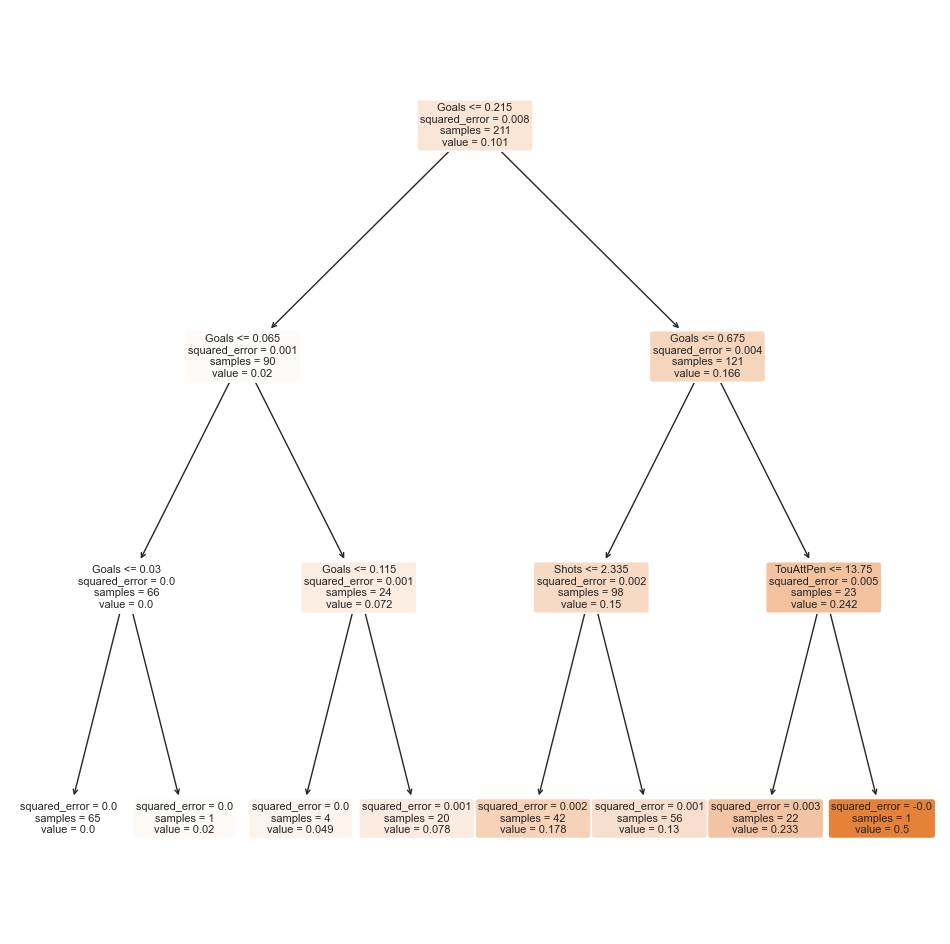

In [27]:
f = plt.figure(figsize=(12,12))
plot_tree(FW_ranfor_GSh[0], filled=True, rounded=True, 
          feature_names=list(FW_X.columns.values))

[Text(0.5, 0.875, 'Goals <= 0.135\nsquared_error = 0.007\nsamples = 213\nvalue = 0.092'),
 Text(0.25, 0.625, 'Goals <= 0.065\nsquared_error = 0.0\nsamples = 82\nvalue = 0.008'),
 Text(0.125, 0.375, 'Goals <= 0.03\nsquared_error = 0.0\nsamples = 72\nvalue = 0.0'),
 Text(0.0625, 0.125, 'squared_error = 0.0\nsamples = 71\nvalue = 0.0'),
 Text(0.1875, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 0.02'),
 Text(0.375, 0.375, 'SoT <= 0.39\nsquared_error = 0.0\nsamples = 10\nvalue = 0.061'),
 Text(0.3125, 0.125, 'squared_error = 0.0\nsamples = 2\nvalue = 0.09'),
 Text(0.4375, 0.125, 'squared_error = 0.0\nsamples = 8\nvalue = 0.052'),
 Text(0.75, 0.625, 'Goals <= 0.49\nsquared_error = 0.004\nsamples = 131\nvalue = 0.149'),
 Text(0.625, 0.375, 'Goals <= 0.315\nsquared_error = 0.002\nsamples = 87\nvalue = 0.119'),
 Text(0.5625, 0.125, 'squared_error = 0.001\nsamples = 47\nvalue = 0.099'),
 Text(0.6875, 0.125, 'squared_error = 0.002\nsamples = 40\nvalue = 0.138'),
 Text(0.875, 0.375, 'Shots <

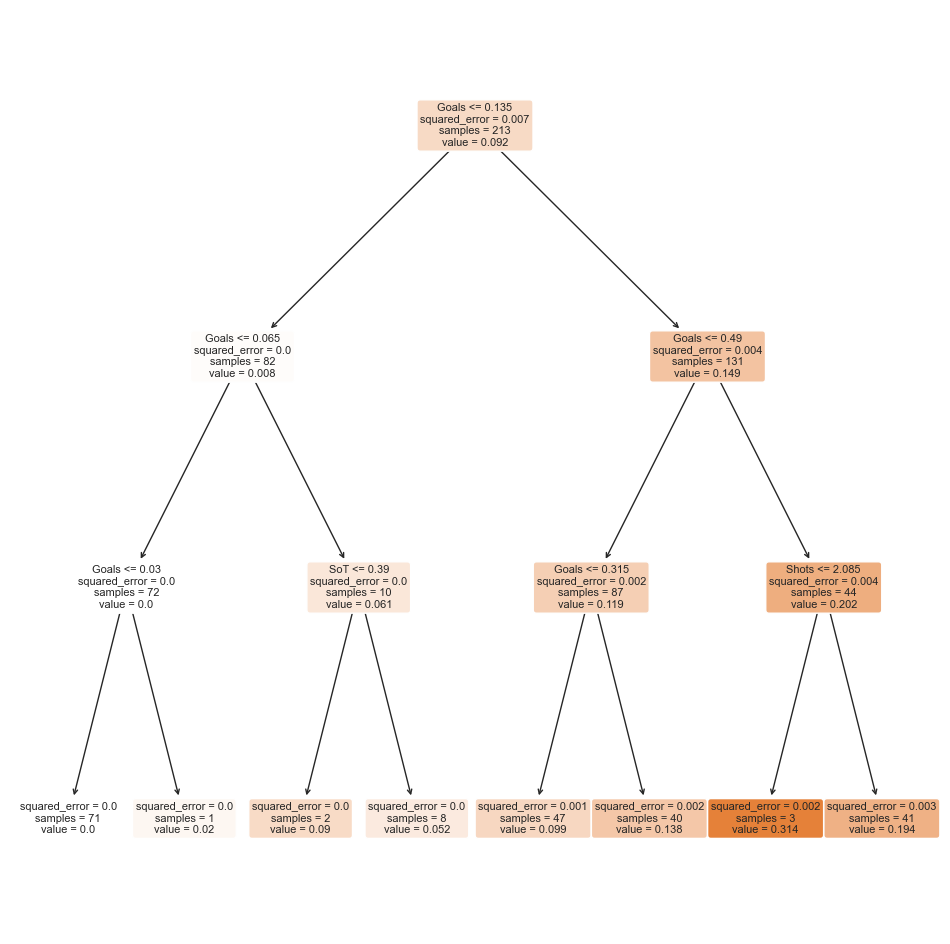

In [28]:
f = plt.figure(figsize=(12,12))
plot_tree(FW_ranfor_GSh[5], filled=True, rounded=True, 
          feature_names=list(FW_X.columns.values))

Random Forest for Forwards:
G/Sh Out-of-Bag Score: 		 0.8283579508695393
G/Sh Mean Squared Error: 	 0.006970132951306062
G/Sh R-squared: 		 0.5612326379573522
G/SoT Out-of-Bag Score: 	 0.78778501517092
G/SoT Mean Squared Error: 	 0.04426195376704353
G/SoT R-squared: 		 0.10444375113908899


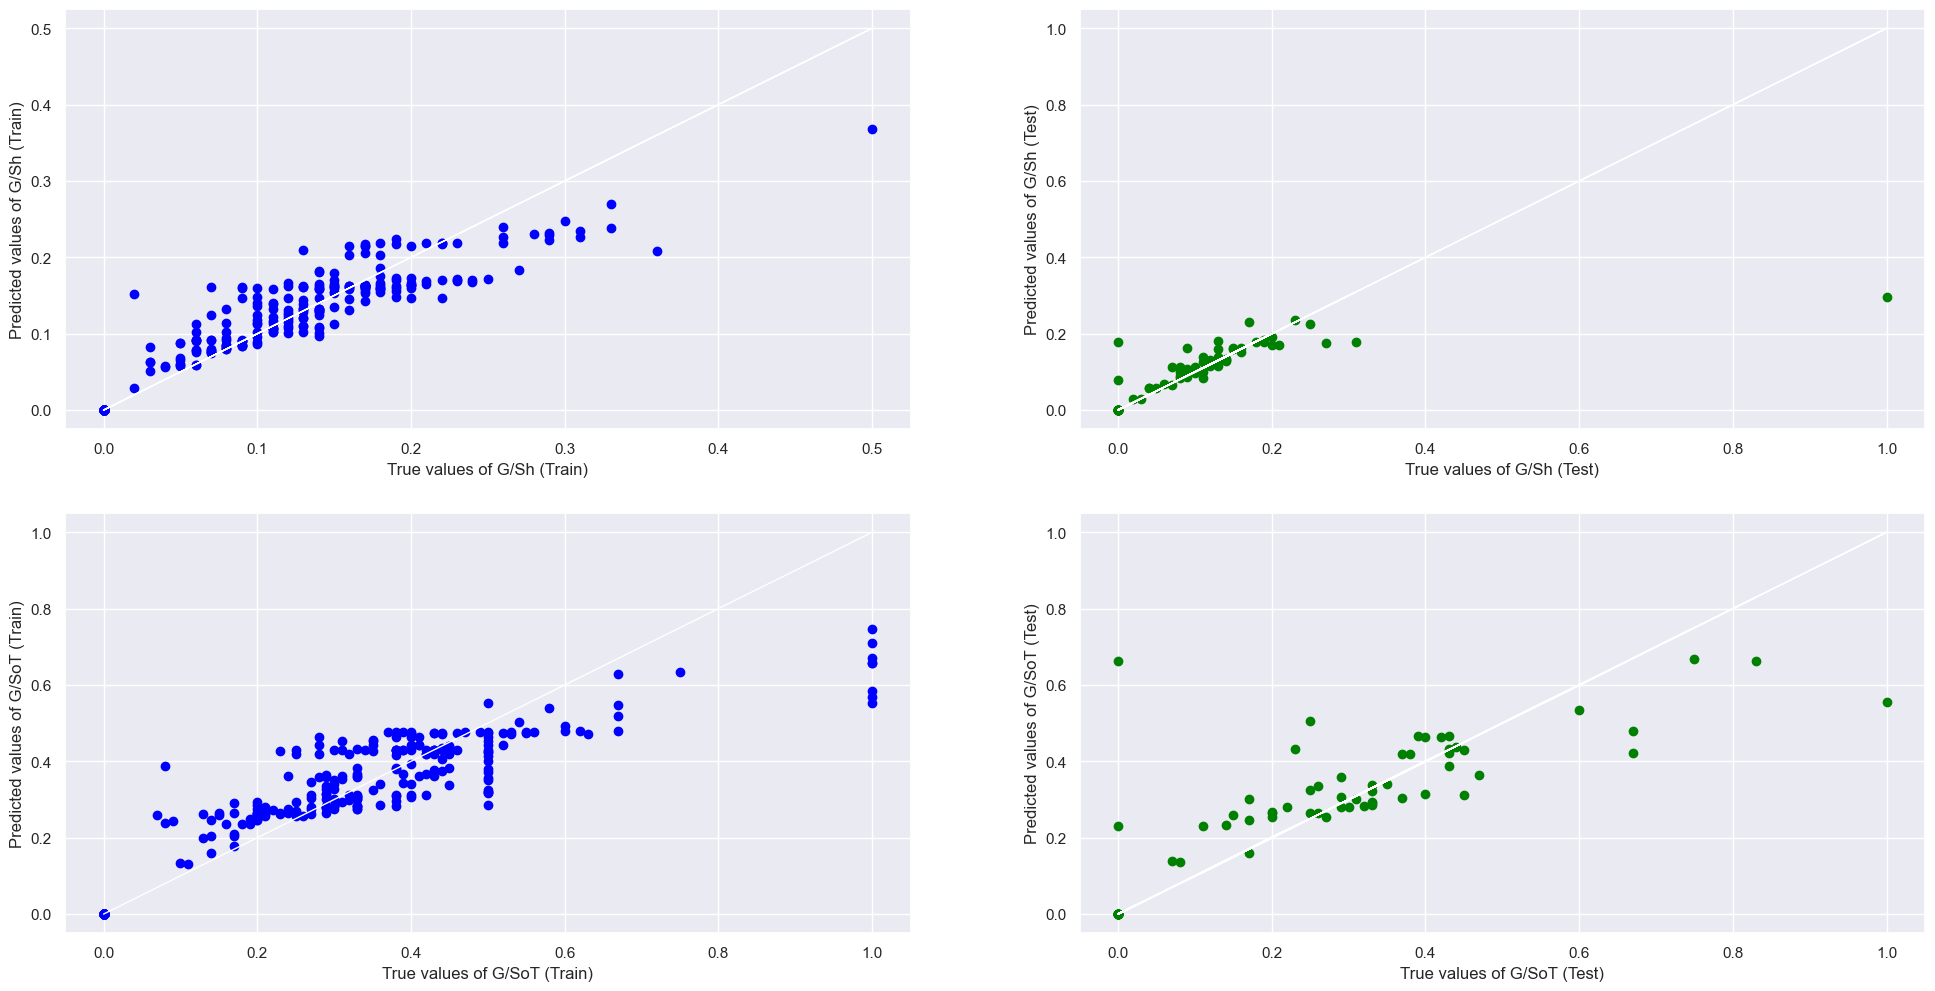

In [29]:
f, axes = plt.subplots(2, 2, figsize=(24, 12))
axes[0][0].scatter(FW_Y_Train_GSh, FW_ranfor_GSh.predict(FW_X_Train), color = "blue")
axes[0][0].plot(FW_Y_Train_GSh, FW_Y_Train_GSh, 'w-', linewidth = 1)
axes[0][0].set_xlabel("True values of G/Sh (Train)")
axes[0][0].set_ylabel("Predicted values of G/Sh (Train)")
axes[0][1].scatter(FW_Y_Test_GSh, FW_ranfor_GSh.predict(FW_X_Test), color = "green")
axes[0][1].plot(FW_Y_Test_GSh, FW_Y_Test_GSh, 'w-', linewidth = 1)
axes[0][1].set_xlabel("True values of G/Sh (Test)")
axes[0][1].set_ylabel("Predicted values of G/Sh (Test)")

axes[1][0].scatter(FW_Y_Train_GSoT, FW_ranfor_GSoT.predict(FW_X_Train), color = "blue")
axes[1][0].plot(FW_Y_Train_GSoT, FW_Y_Train_GSoT, 'w-', linewidth = 1)
axes[1][0].set_xlabel("True values of G/SoT (Train)")
axes[1][0].set_ylabel("Predicted values of G/SoT (Train)")
axes[1][1].scatter(FW_Y_Test_GSoT, FW_ranfor_GSoT.predict(FW_X_Test), color = "green")
axes[1][1].plot(FW_Y_Test_GSoT, FW_Y_Test_GSoT, 'w-', linewidth = 1)
axes[1][1].set_xlabel("True values of G/SoT (Test)")
axes[1][1].set_ylabel("Predicted values of G/SoT (Test)")

print("Random Forest for Forwards:")
print("G/Sh Out-of-Bag Score: \t\t", GSh_oob_score) #Higher better
print("G/Sh Mean Squared Error: \t", GSh_mse)
print("G/Sh R-squared: \t\t", GSh_r2)
print("G/SoT Out-of-Bag Score: \t", GSoT_oob_score) #Higher better
print("G/SoT Mean Squared Error: \t", GSoT_mse)
print("G/SoT R-squared: \t\t", GSoT_r2)

Random Forest for MidFielders:
Sho Out-of-Bag Score: 		 0.8448044004481876
Sho Mean Squared Error: 	 34.62506363177111
Sho R-squared: 			 0.7844814226040024
Med Out-of-Bag Score: 		 0.8126673117896868
Med Mean Squared Error: 	 45.473721911370745
Med R-squared: 			 0.848058292401579
Lon Out-of-Bag Score: 		 0.7313175844961857
Lon Mean Squared Error: 	 164.38346652586736
Lon R-squared: 			 0.6440322025039702


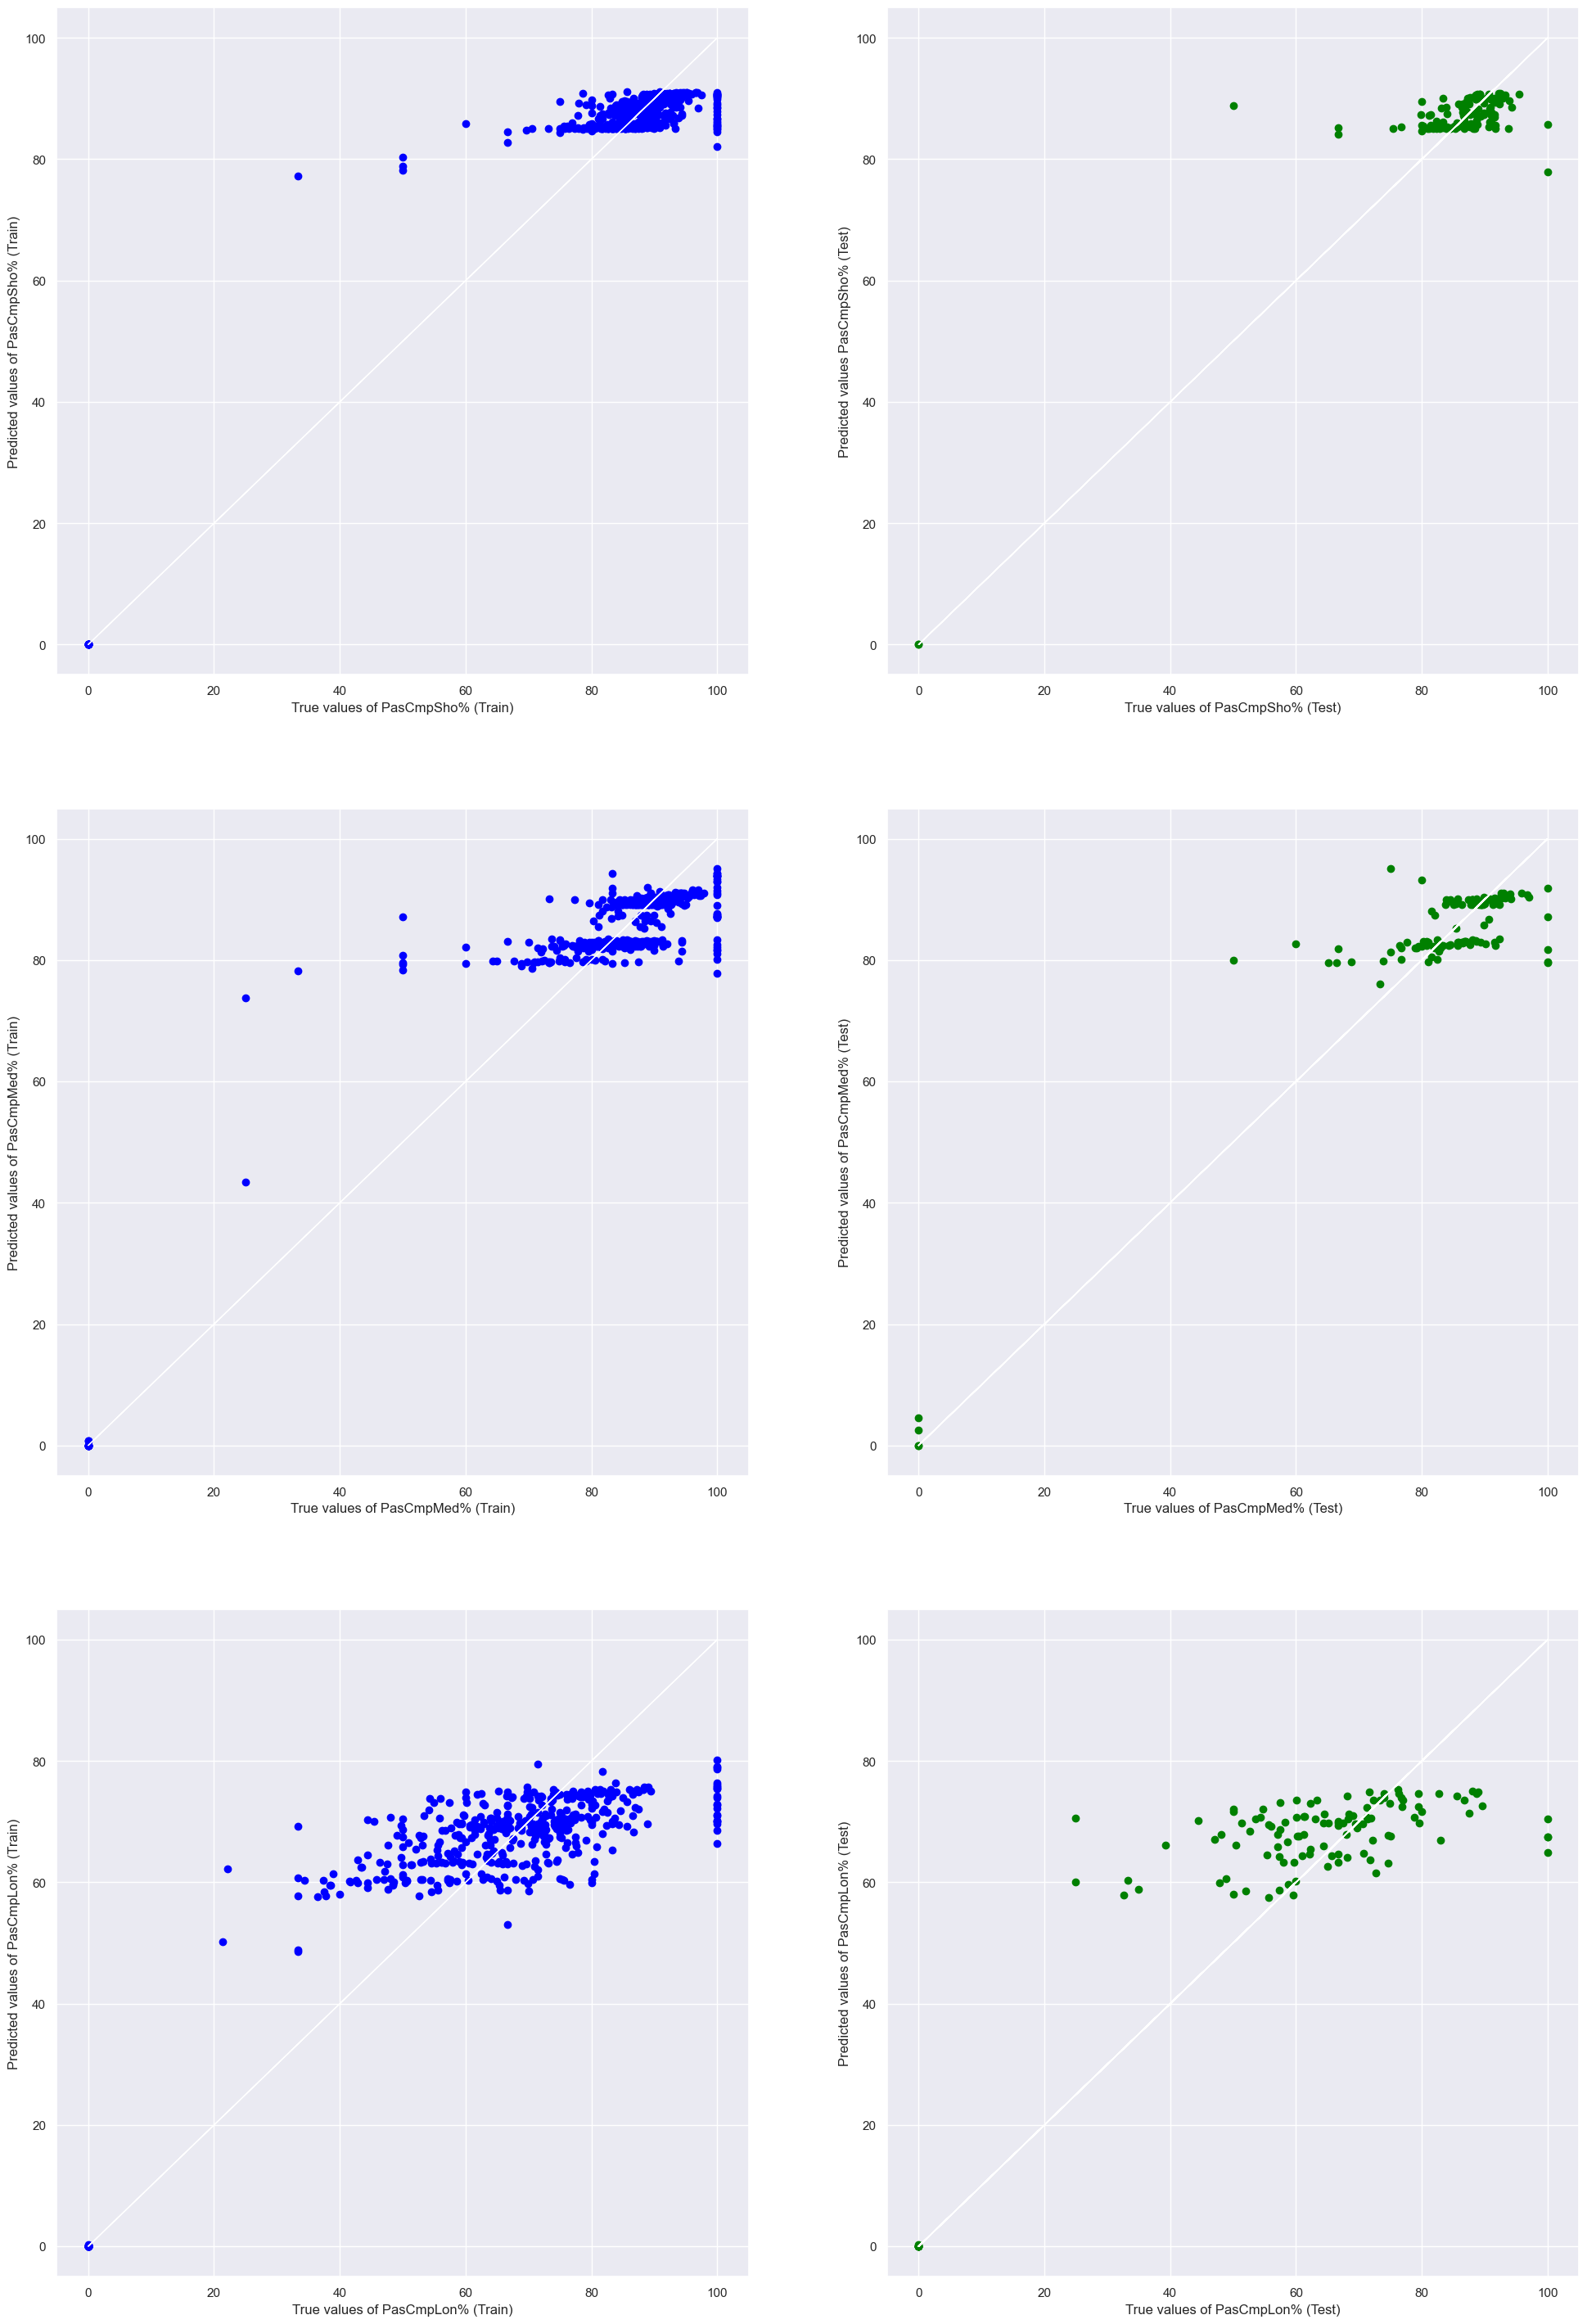

In [30]:
f, axes = plt.subplots(3, 2, figsize=(24, 36))
axes[0][0].scatter(MF_Y_Train_Sho, MF_ranfor_Sho.predict(MF_X_Train), color = "blue")
axes[0][0].plot(MF_Y_Train_Sho, MF_Y_Train_Sho, 'w-', linewidth = 1)
axes[0][0].set_xlabel("True values of PasCmpSho% (Train)")
axes[0][0].set_ylabel("Predicted values of PasCmpSho% (Train)")
axes[0][1].scatter(MF_Y_Test_Sho, MF_ranfor_Sho.predict(MF_X_Test), color = "green")
axes[0][1].plot(MF_Y_Test_Sho, MF_Y_Test_Sho, 'w-', linewidth = 1)
axes[0][1].set_xlabel("True values of PasCmpSho% (Test)")
axes[0][1].set_ylabel("Predicted values PasCmpSho% (Test)")

axes[1][0].scatter(MF_Y_Train_Med, MF_ranfor_Med.predict(MF_X_Train), color = "blue")
axes[1][0].plot(MF_Y_Train_Med, MF_Y_Train_Med, 'w-', linewidth = 1)
axes[1][0].set_xlabel("True values of PasCmpMed% (Train)")
axes[1][0].set_ylabel("Predicted values of PasCmpMed% (Train)")
axes[1][1].scatter(MF_Y_Test_Med, MF_ranfor_Med.predict(MF_X_Test), color = "green")
axes[1][1].plot(MF_Y_Test_Med, MF_Y_Test_Med, 'w-', linewidth = 1)
axes[1][1].set_xlabel("True values of PasCmpMed% (Test)")
axes[1][1].set_ylabel("Predicted values of PasCmpMed% (Test)")

axes[2][0].scatter(MF_Y_Train_Lon, MF_ranfor_Lon.predict(MF_X_Train), color = "blue")
axes[2][0].plot(MF_Y_Train_Lon, MF_Y_Train_Lon, 'w-', linewidth = 1)
axes[2][0].set_xlabel("True values of PasCmpLon% (Train)")
axes[2][0].set_ylabel("Predicted values of PasCmpLon% (Train)")
axes[2][1].scatter(MF_Y_Test_Lon, MF_ranfor_Lon.predict(MF_X_Test), color = "green")
axes[2][1].plot(MF_Y_Test_Lon, MF_Y_Test_Lon, 'w-', linewidth = 1)
axes[2][1].set_xlabel("True values of PasCmpLon% (Test)")
axes[2][1].set_ylabel("Predicted values of PasCmpLon% (Test)")

print("Random Forest for MidFielders:")
print("Sho Out-of-Bag Score: \t\t", Sho_oob_score) #Higher better
print("Sho Mean Squared Error: \t", Sho_mse)
print("Sho R-squared: \t\t\t", Sho_r2)
print("Med Out-of-Bag Score: \t\t", Med_oob_score) #Higher better
print("Med Mean Squared Error: \t", Med_mse)
print("Med R-squared: \t\t\t", Med_r2)
print("Lon Out-of-Bag Score: \t\t", Lon_oob_score) #Higher better
print("Lon Mean Squared Error: \t", Lon_mse)
print("Lon R-squared: \t\t\t", Lon_r2)

Random Forest for Defenders:
Tkl Out-of-Bag Score: 		 0.8651550882545962
Tkl Mean Squared Error: 	 0.16094886067420255
Tkl R-squared: 			 0.8263577273192088
Int Out-of-Bag Score: 		 -0.09241967421976405
Int Mean Squared Error: 	 2.267593508563396
Int R-squared: 			 0.23408530666873095
Clr Out-of-Bag Score: 		 0.2747554474451298
Clr Mean Squared Error: 	 1.878808039933402
Clr R-squared: 			 0.41933919772851425


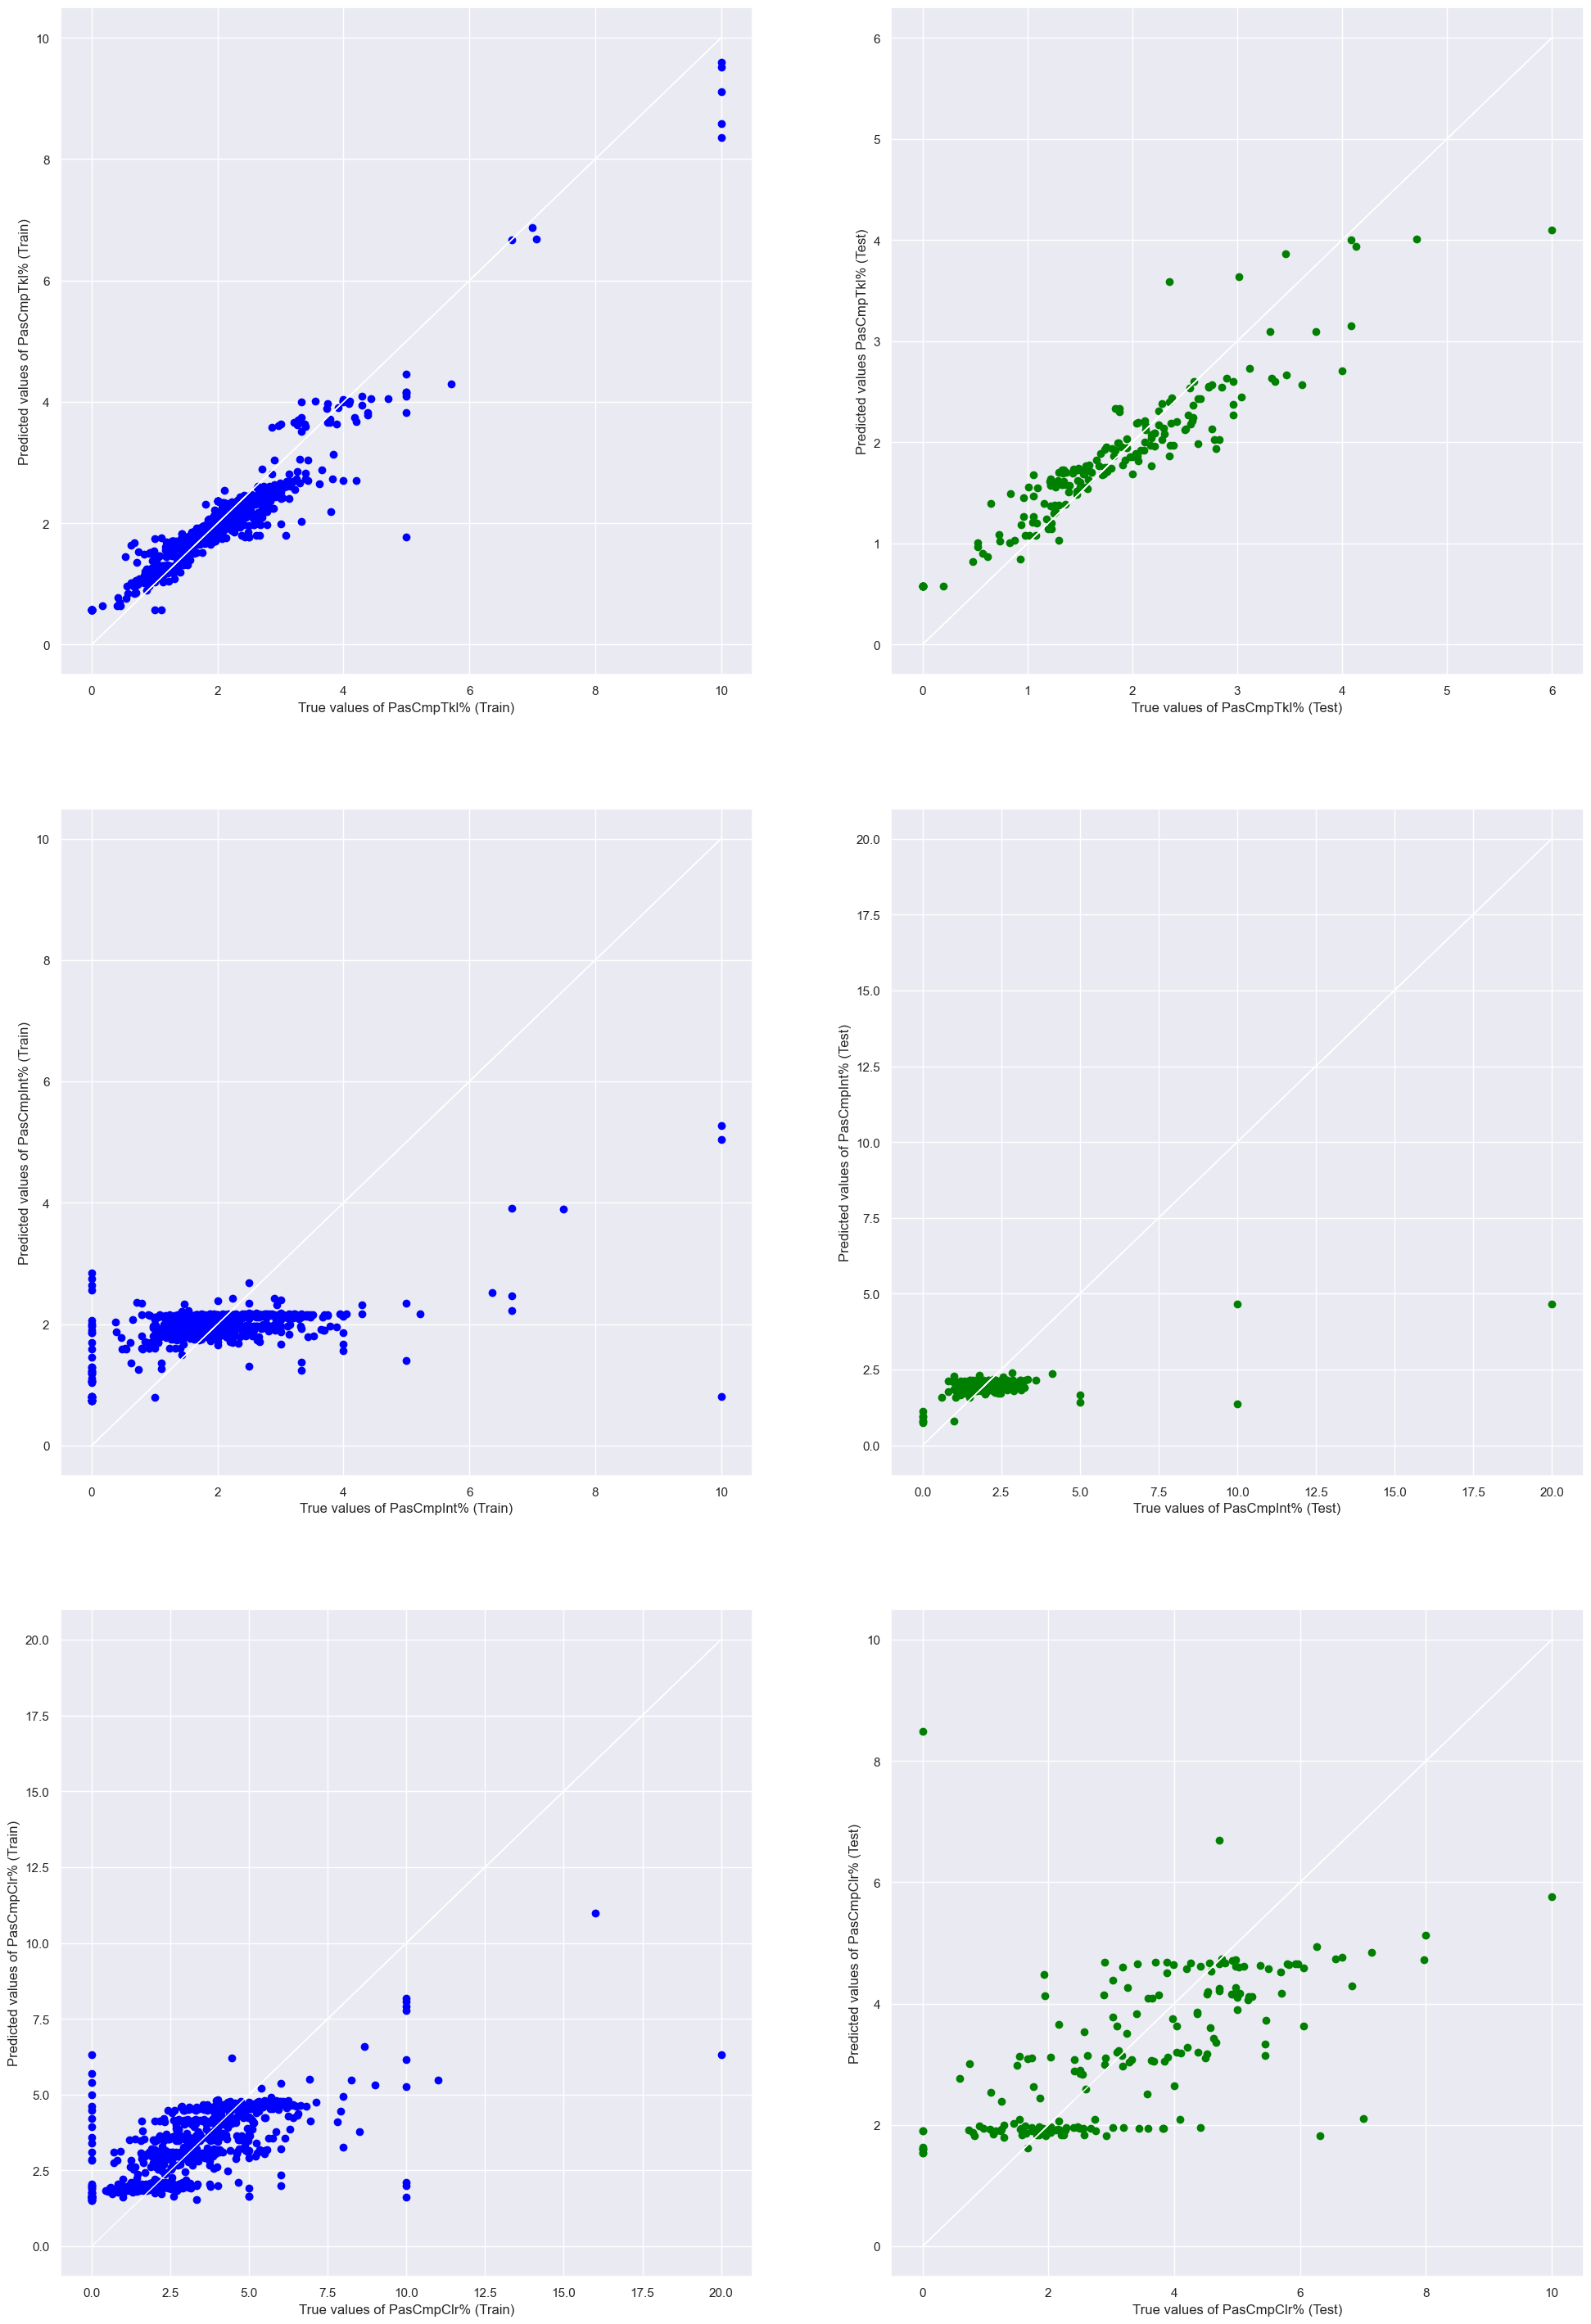

In [31]:
f, axes = plt.subplots(3, 2, figsize=(24, 36))
axes[0][0].scatter(DF_Y_Train_Tkl, DF_ranfor_Tkl.predict(DF_X_Train), color = "blue")
axes[0][0].plot(DF_Y_Train_Tkl, DF_Y_Train_Tkl, 'w-', linewidth = 1)
axes[0][0].set_xlabel("True values of PasCmpTkl% (Train)")
axes[0][0].set_ylabel("Predicted values of PasCmpTkl% (Train)")
axes[0][1].scatter(DF_Y_Test_Tkl, DF_ranfor_Tkl.predict(DF_X_Test), color = "green")
axes[0][1].plot(DF_Y_Test_Tkl, DF_Y_Test_Tkl, 'w-', linewidth = 1)
axes[0][1].set_xlabel("True values of PasCmpTkl% (Test)")
axes[0][1].set_ylabel("Predicted values PasCmpTkl% (Test)")

axes[1][0].scatter(DF_Y_Train_Int, DF_ranfor_Int.predict(DF_X_Train), color = "blue")
axes[1][0].plot(DF_Y_Train_Int, DF_Y_Train_Int, 'w-', linewidth = 1)
axes[1][0].set_xlabel("True values of PasCmpInt% (Train)")
axes[1][0].set_ylabel("Predicted values of PasCmpInt% (Train)")
axes[1][1].scatter(DF_Y_Test_Int, DF_ranfor_Int.predict(DF_X_Test), color = "green")
axes[1][1].plot(DF_Y_Test_Int, DF_Y_Test_Int, 'w-', linewidth = 1)
axes[1][1].set_xlabel("True values of PasCmpInt% (Test)")
axes[1][1].set_ylabel("Predicted values of PasCmpInt% (Test)")

axes[2][0].scatter(DF_Y_Train_Clr, DF_ranfor_Clr.predict(DF_X_Train), color = "blue")
axes[2][0].plot(DF_Y_Train_Clr, DF_Y_Train_Clr, 'w-', linewidth = 1)
axes[2][0].set_xlabel("True values of PasCmpClr% (Train)")
axes[2][0].set_ylabel("Predicted values of PasCmpClr% (Train)")
axes[2][1].scatter(DF_Y_Test_Clr, DF_ranfor_Clr.predict(DF_X_Test), color = "green")
axes[2][1].plot(DF_Y_Test_Clr, DF_Y_Test_Clr, 'w-', linewidth = 1)
axes[2][1].set_xlabel("True values of PasCmpClr% (Test)")
axes[2][1].set_ylabel("Predicted values of PasCmpClr% (Test)")

print("Random Forest for Defenders:")
print("Tkl Out-of-Bag Score: \t\t", Tkl_oob_score) #Higher better
print("Tkl Mean Squared Error: \t", Tkl_mse)
print("Tkl R-squared: \t\t\t", Tkl_r2)
print("Int Out-of-Bag Score: \t\t", Int_oob_score) #Higher better
print("Int Mean Squared Error: \t", Int_mse)
print("Int R-squared: \t\t\t", Int_r2)
print("Clr Out-of-Bag Score: \t\t", Clr_oob_score) #Higher better
print("Clr Mean Squared Error: \t", Clr_mse)
print("Clr R-squared: \t\t\t", Clr_r2)

In [32]:
FW_Relevant['P_G/Sh_RF'] = FW_ranfor_GSh.predict(FW_X)
FW_Relevant['P_G/SoT_RF'] = FW_ranfor_GSoT.predict(FW_X)
MF_Relevant['P_PasCmpSho%_RF'] = MF_ranfor_Sho.predict(MF_X)
MF_Relevant['P_PasCmpMed%_RF'] = MF_ranfor_Med.predict(MF_X)
MF_Relevant['P_PasCmpLon%_RF'] = MF_ranfor_Lon.predict(MF_X)
DF_Relevant['P_Tkl_RF'] = DF_ranfor_Tkl.predict(DF_X)
DF_Relevant['P_Int_RF'] = DF_ranfor_Int.predict(DF_X)
DF_Relevant['P_Clr_RF'] = DF_ranfor_Clr.predict(DF_X)
FW_Relevant.round(2)
MF_Relevant.round(2)
DF_Relevant.round(2)

Player   Tkl   Int   Clr  BlkSh  BlkPass  TklDef3rd  \
0               Max Aarons  2.16  1.75  2.19   0.69     2.00       1.56   
1         Yunis Abdelhamid  1.87  3.11  3.20   0.79     1.09       1.24   
8               Luis Abram  1.13  1.77  6.29   0.81     1.29       0.81   
9         Francesco Acerbi  0.96  1.70  4.08   1.06     0.64       0.64   
12            Marcos Acuña  2.31  1.24  1.20   0.16     1.27       1.31   
...                    ...   ...   ...   ...    ...      ...        ...   
2906  Christoph Zimmermann  2.94  1.76  1.76   0.00     0.00       1.76   
2907   Oleksandr Zinchenko  1.72  1.55  1.12   0.26     1.29       0.60   
2912        Banhie Zoukrou  1.11  2.22  1.11   0.00     0.00       1.11   
2913            Kurt Zouma  0.48  2.03  6.06   1.17     0.48       0.39   
2915         Igor Zubeldia  1.42  1.69  3.44   0.49     0.98       0.93   

      TklMid3rd  PasTotCmp%  PasLonCmp%  AerWon%  AerWon  P_Tkl_LR  P_Int_LR  \
0          0.59        75.5        45.2     22.7    0.47      2.36      1.91   
1          0.60        82.4        61.7     59.8    2.02      1.98      1.99   
8          0.16        88.2        75.0     44.4    1.94      1.09      1.81   
9          0.32        90.3        77.1     64.0    2.84      1.04      1.84   
12         0.60        79.4        58.0     47.1    1.31      2.09      1.95   
...         ...         ...         ...      ...     ...       ...       ...   
2906       1.18        72.7        47.1     66.7    1.18      3.12      2.14   
2907       0.86        89.3        73.0     51.5    1.47      1.64      1.92   
2912       0.00        92.3        75.0     33.3    1.11      1.21      1.61   
2913       0.09        88.9        70.3     68.8    2.38      0.56      1.72   
2915       0.49        88.8        78.4     55.2    2.62      1.54      1.92   

      P_Clr_LR  P_Tkl_RF  P_Int_RF  P_Clr_RF  
0         2.19      2.26      2.09      2.85  
1         3.46      2.05      2.10      4.13  
8         3.45      1.03      1.93      3.86  
9         4.28      1.20      1.83      4.61  
12        2.42      2.09      2.09      1.96  
...        ...       ...       ...       ...  
2906      2.31      2.60      2.07      1.98  
2907      2.45      1.77      1.81      1.94  
2912      2.39      1.30      1.84      1.92  
2913      4.18      0.82      1.78      4.59  
2915      3.57      1.70      1.97      3.69  

[942 rows x 18 columns]

Text(0, 0.5, 'Predicted values of Clr')

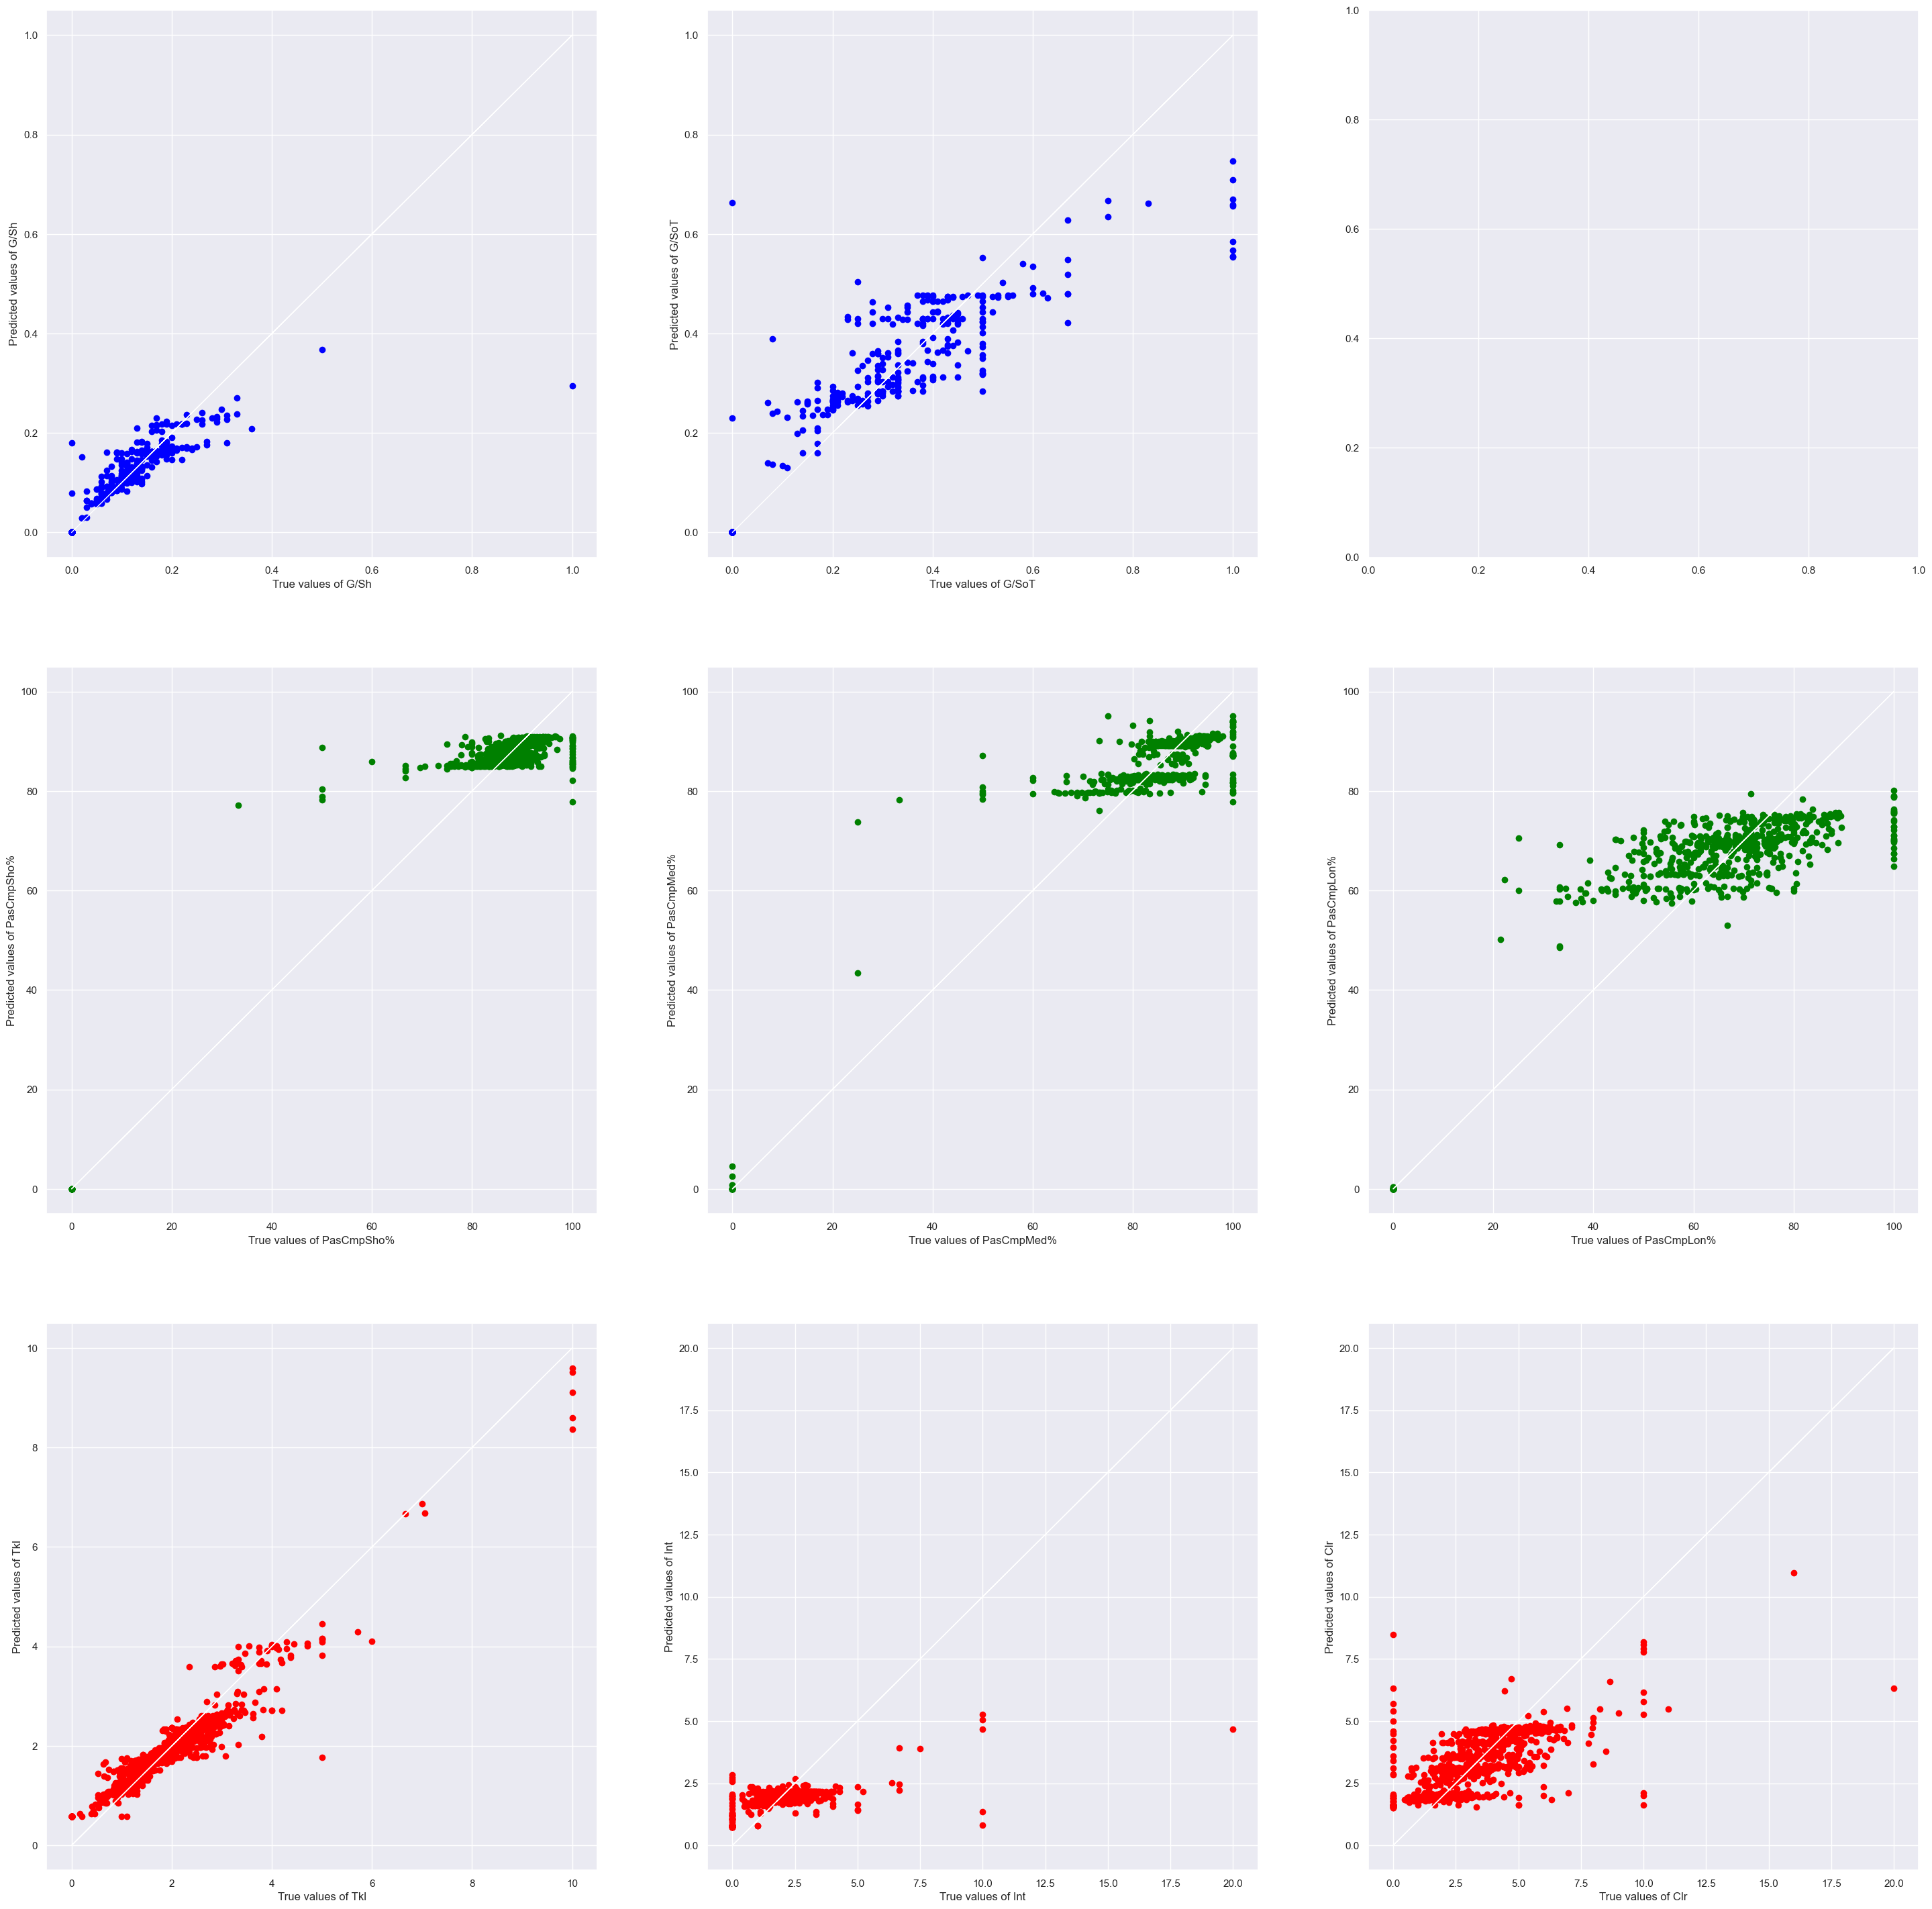

In [33]:
f, axes = plt.subplots(3, 3, figsize=(36, 36))
axes[0][0].scatter(FW_Y_GSh, FW_Relevant['P_G/Sh_RF'], color = "blue")
axes[0][0].plot(FW_Y_GSh, FW_Y_GSh, 'w-', linewidth = 1)
axes[0][0].set_xlabel("True values of G/Sh")
axes[0][0].set_ylabel("Predicted values of G/Sh")
axes[0][1].scatter(FW_Y_GSoT, FW_Relevant['P_G/SoT_RF'], color = "blue")
axes[0][1].plot(FW_Y_GSoT, FW_Y_GSoT, 'w-', linewidth = 1)
axes[0][1].set_xlabel("True values of G/SoT")
axes[0][1].set_ylabel("Predicted values of G/SoT")

axes[1][0].scatter(MF_Y_Sho, MF_Relevant['P_PasCmpSho%_RF'], color = "green")
axes[1][0].plot(MF_Y_Sho, MF_Y_Sho, 'w-', linewidth = 1)
axes[1][0].set_xlabel("True values of PasCmpSho%")
axes[1][0].set_ylabel("Predicted values of PasCmpSho%")
axes[1][1].scatter(MF_Y_Med, MF_Relevant['P_PasCmpMed%_RF'], color = "green")
axes[1][1].plot(MF_Y_Med, MF_Y_Med, 'w-', linewidth = 1)
axes[1][1].set_xlabel("True values of PasCmpMed%")
axes[1][1].set_ylabel("Predicted values of PasCmpMed%")
axes[1][2].scatter(MF_Y_Lon, MF_Relevant['P_PasCmpLon%_RF'], color = "green")
axes[1][2].plot(MF_Y_Lon, MF_Y_Lon, 'w-', linewidth = 1)
axes[1][2].set_xlabel("True values of PasCmpLon%")
axes[1][2].set_ylabel("Predicted values of PasCmpLon%")

axes[2][0].scatter(DF_Y_Tkl, DF_Relevant['P_Tkl_RF'], color = "red")
axes[2][0].plot(DF_Y_Tkl, DF_Y_Tkl, 'w-', linewidth = 1)
axes[2][0].set_xlabel("True values of Tkl")
axes[2][0].set_ylabel("Predicted values of Tkl")
axes[2][1].scatter(DF_Y_Int, DF_Relevant['P_Int_RF'], color = "red")
axes[2][1].plot(DF_Y_Int, DF_Y_Int, 'w-', linewidth = 1)
axes[2][1].set_xlabel("True values of Int")
axes[2][1].set_ylabel("Predicted values of Int")
axes[2][2].scatter(DF_Y_Clr, DF_Relevant['P_Clr_RF'], color = "red")
axes[2][2].plot(DF_Y_Clr, DF_Y_Clr, 'w-', linewidth = 1)
axes[2][2].set_xlabel("True values of Clr")
axes[2][2].set_ylabel("Predicted values of Clr")

# Step 4c: Gradient Boosting Regressor

Similar to Random Forest, Gradient Booster sequentially combines the prediction of multiple weak learners to create a single, more accurate strong learner. It goes through multiple iterations and optimizes the weights of the model based on the errors of the previous iterations. This gradually reduces prediction errors and enhances accuracy.

In [34]:
FW_gradient_GSh = GradientBoostingRegressor(max_depth=3)
FW_gradient_GSh.fit(FW_X_Train, FW_Y_Train_GSh)
GSh_gradient = FW_gradient_GSh.predict(FW_X_Test)
FW_gradient_GSoT = GradientBoostingRegressor(max_depth=3)
FW_gradient_GSoT.fit(FW_X_Train, FW_Y_Train_GSoT)
GSoT_gradient = FW_gradient_GSoT.predict(FW_X_Test)

MF_gradient_Sho = GradientBoostingRegressor(max_depth=3)
MF_gradient_Sho.fit(MF_X_Train, MF_Y_Train_Sho)
Sho_gradient = MF_gradient_Sho.predict(MF_X_Test)
MF_gradient_Med = GradientBoostingRegressor(max_depth=3)
MF_gradient_Med.fit(MF_X_Train, MF_Y_Train_Med)
Med_gradient = MF_gradient_Sho.predict(MF_X_Test)
MF_gradient_Lon = GradientBoostingRegressor(max_depth=3)
MF_gradient_Lon.fit(MF_X_Train, MF_Y_Train_Lon)
Lon_gradient = MF_gradient_Sho.predict(MF_X_Test)

DF_gradient_Tkl = GradientBoostingRegressor(max_depth=3)
DF_gradient_Tkl.fit(DF_X_Train, DF_Y_Train_Tkl)
Tkl_gradient = DF_gradient_Tkl.predict(DF_X_Test)
DF_gradient_Int = GradientBoostingRegressor(max_depth=3)
DF_gradient_Int.fit(DF_X_Train, DF_Y_Train_Int)
Int_gradient = DF_gradient_Int.predict(DF_X_Test)
DF_gradient_Clr = GradientBoostingRegressor(max_depth=3)
DF_gradient_Clr.fit(DF_X_Train, DF_Y_Train_Clr)
Clr_gradient = DF_gradient_Clr.predict(DF_X_Test)

GSh_gradient_mse = mean_squared_error(FW_Y_Test_GSh, GSh_gradient)
GSh_gradient_r2=r2_score(FW_Y_Test_GSh, GSh_gradient)
GSoT_gradient_mse = mean_squared_error(FW_Y_Test_GSoT, GSh_gradient)
GSoT_gradient_r2=r2_score(FW_Y_Test_GSoT, GSh_gradient)

Sho_gradient_mse = mean_squared_error(MF_Y_Test_Sho, Sho_gradient)
Sho_gradient_r2=r2_score(MF_Y_Test_Sho, Sho_gradient)
Med_gradient_mse = mean_squared_error(MF_Y_Test_Med, Med_gradient)
Med_gradient_r2=r2_score(MF_Y_Test_Med, Med_gradient)
Lon_gradient_mse = mean_squared_error(MF_Y_Test_Lon, Lon_gradient)
Lon_gradient_r2=r2_score(MF_Y_Test_Lon, Lon_gradient)

Tkl_gradient_mse = mean_squared_error(DF_Y_Test_Tkl, Tkl_gradient)
Tkl_gradient_r2=r2_score(DF_Y_Test_Tkl, Tkl_gradient)
Int_gradient_mse = mean_squared_error(DF_Y_Test_Int, Int_gradient)
Int_gradient_r2=r2_score(DF_Y_Test_Int, Int_gradient)
Clr_gradient_mse = mean_squared_error(DF_Y_Test_Clr, Clr_gradient)
Clr_gradient_r2=r2_score(DF_Y_Test_Clr, Clr_gradient)

FW_gradient_GSh.train_score_.round(4)

array([0.0063, 0.0054, 0.0045, 0.0038, 0.0033, 0.0028, 0.0025, 0.0021,
       0.0019, 0.0016, 0.0015, 0.0013, 0.0012, 0.001 , 0.0009, 0.0008,
       0.0008, 0.0007, 0.0006, 0.0006, 0.0005, 0.0005, 0.0005, 0.0004,
       0.0004, 0.0004, 0.0004, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003,
       0.0003, 0.0003, 0.0003, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002,
       0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002,
       0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002,
       0.0002, 0.0002, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001,
       0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001,
       0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001,
       0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001,
       0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001,
       0.0001, 0.0001, 0.0001, 0.0001])

Gradient Boosting for Forwards:
G/Sh Mean Squared Error: 	 0.005960729188168294
G/Sh R-squared: 		 0.6247742417519959
G/SoT Mean Squared Error: 	 0.043430296303900676
G/SoT R-squared: 		 0.12127075434706658


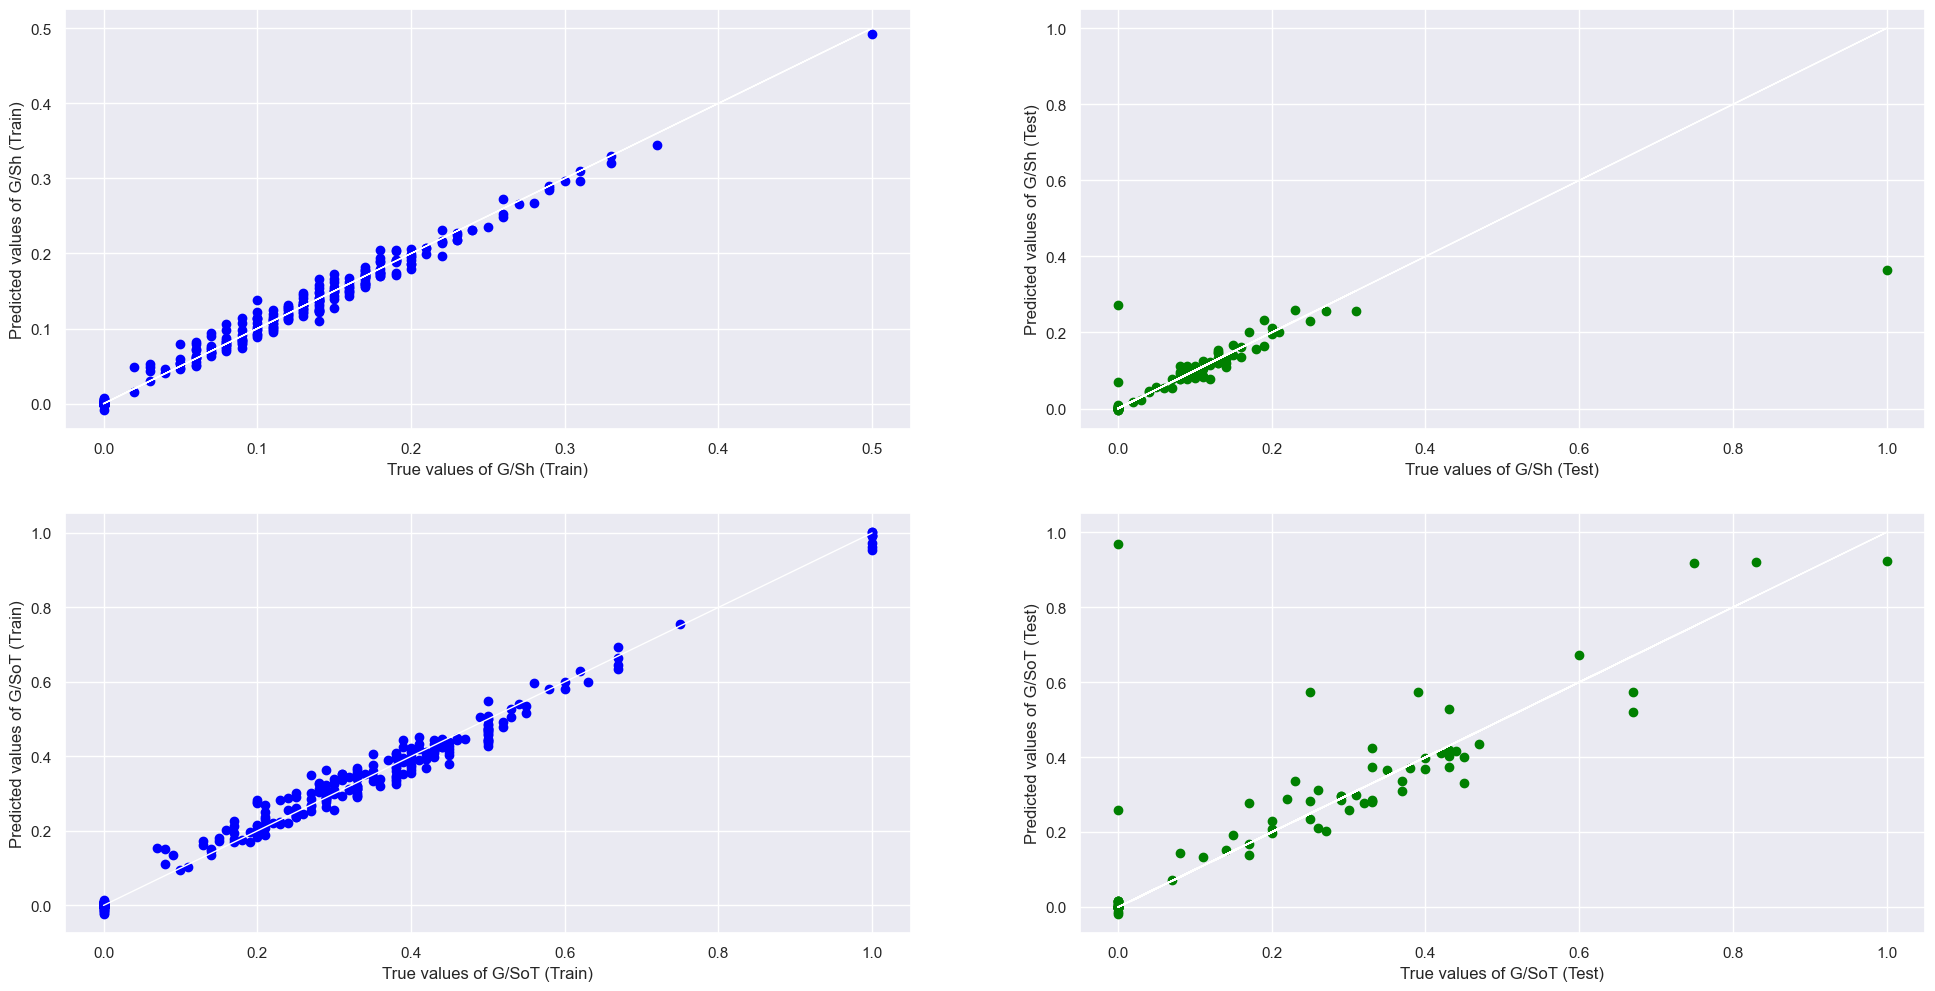

In [35]:
f, axes = plt.subplots(2, 2, figsize=(24, 12))
axes[0][0].scatter(FW_Y_Train_GSh, FW_gradient_GSh.predict(FW_X_Train), color = "blue")
axes[0][0].plot(FW_Y_Train_GSh, FW_Y_Train_GSh, 'w-', linewidth = 1)
axes[0][0].set_xlabel("True values of G/Sh (Train)")
axes[0][0].set_ylabel("Predicted values of G/Sh (Train)")
axes[0][1].scatter(FW_Y_Test_GSh, FW_gradient_GSh.predict(FW_X_Test), color = "green")
axes[0][1].plot(FW_Y_Test_GSh, FW_Y_Test_GSh, 'w-', linewidth = 1)
axes[0][1].set_xlabel("True values of G/Sh (Test)")
axes[0][1].set_ylabel("Predicted values of G/Sh (Test)")

axes[1][0].scatter(FW_Y_Train_GSoT, FW_gradient_GSoT.predict(FW_X_Train), color = "blue")
axes[1][0].plot(FW_Y_Train_GSoT, FW_Y_Train_GSoT, 'w-', linewidth = 1)
axes[1][0].set_xlabel("True values of G/SoT (Train)")
axes[1][0].set_ylabel("Predicted values of G/SoT (Train)")
axes[1][1].scatter(FW_Y_Test_GSoT, FW_gradient_GSoT.predict(FW_X_Test), color = "green")
axes[1][1].plot(FW_Y_Test_GSoT, FW_Y_Test_GSoT, 'w-', linewidth = 1)
axes[1][1].set_xlabel("True values of G/SoT (Test)")
axes[1][1].set_ylabel("Predicted values of G/SoT (Test)")

print("Gradient Boosting for Forwards:")
print("G/Sh Mean Squared Error: \t", GSh_gradient_mse)
print("G/Sh R-squared: \t\t", GSh_gradient_r2)
print("G/SoT Mean Squared Error: \t", GSoT_gradient_mse)
print("G/SoT R-squared: \t\t", GSoT_gradient_r2)

Gradient Boosting for MidFielders:
Sho Mean Squared Error: 	 46.675098982923714
Sho R-squared: 			 0.7094777632874334
Med Mean Squared Error: 	 179.86258634772034
Med R-squared: 			 0.39902371404730974
Lon Mean Squared Error: 	 1206.269039785407
Lon R-squared: 			 -1.61214185559527


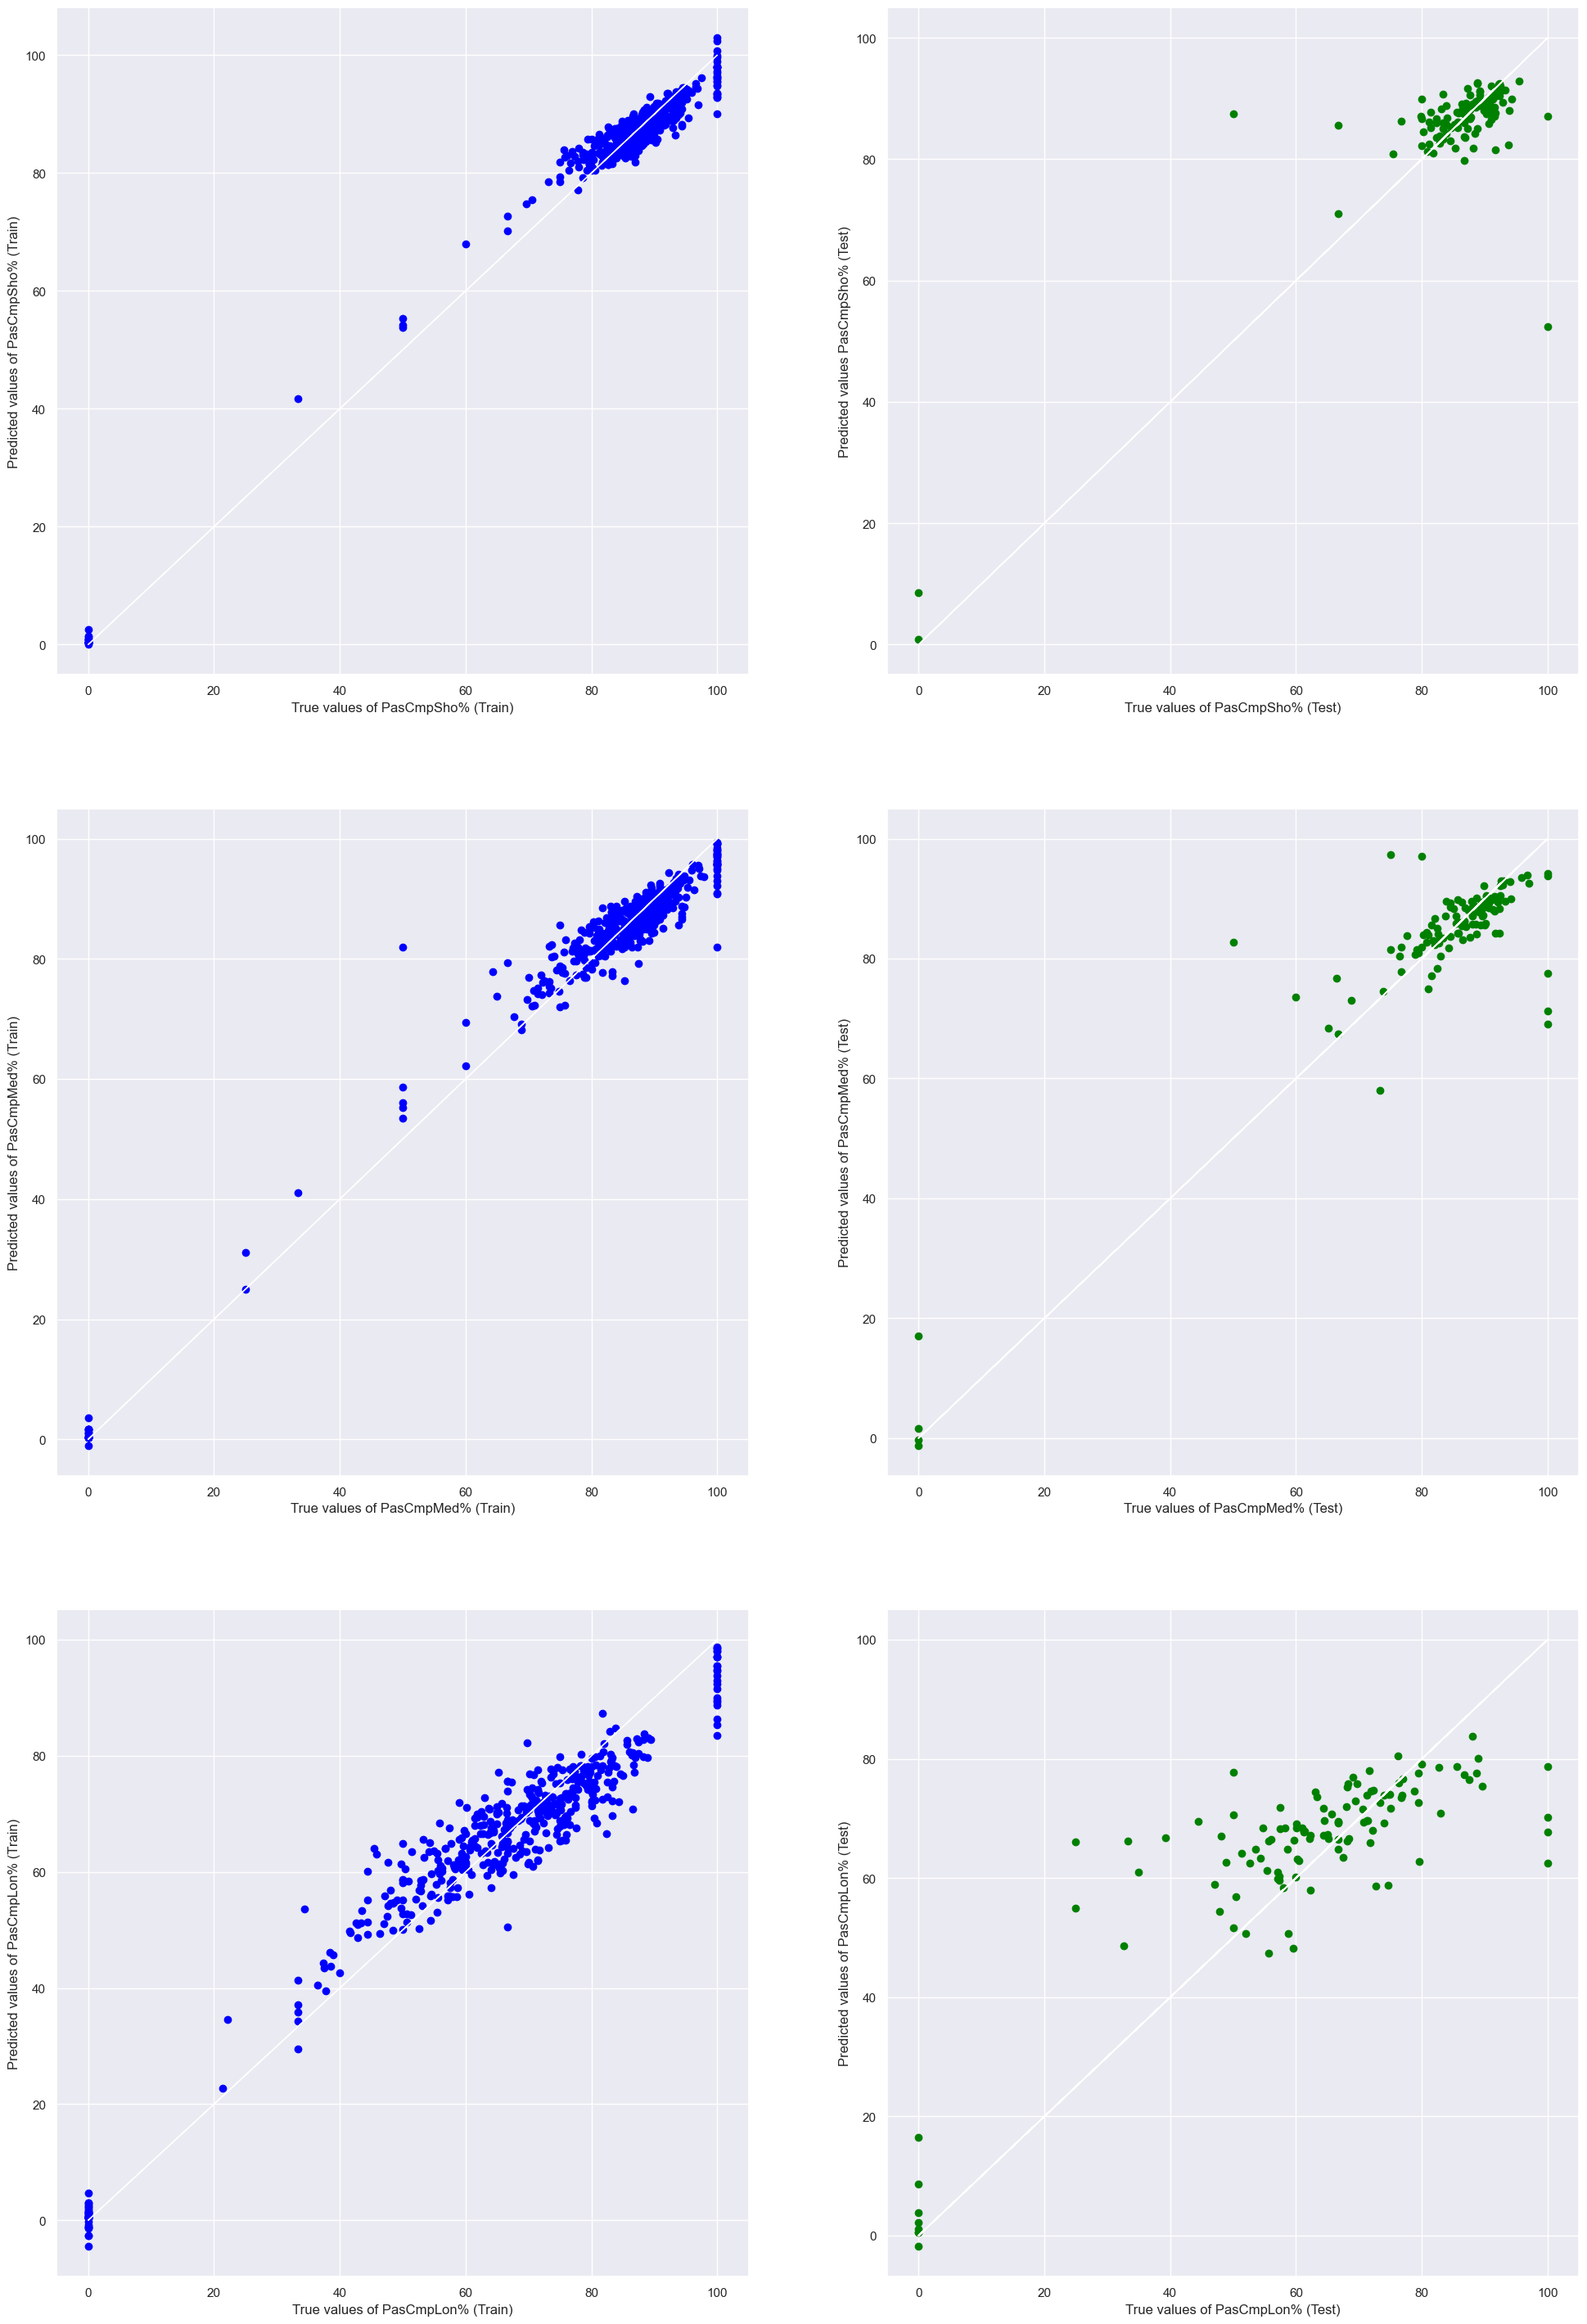

In [36]:
f, axes = plt.subplots(3, 2, figsize=(24, 36))
axes[0][0].scatter(MF_Y_Train_Sho, MF_gradient_Sho.predict(MF_X_Train), color = "blue")
axes[0][0].plot(MF_Y_Train_Sho, MF_Y_Train_Sho, 'w-', linewidth = 1)
axes[0][0].set_xlabel("True values of PasCmpSho% (Train)")
axes[0][0].set_ylabel("Predicted values of PasCmpSho% (Train)")
axes[0][1].scatter(MF_Y_Test_Sho, MF_gradient_Sho.predict(MF_X_Test), color = "green")
axes[0][1].plot(MF_Y_Test_Sho, MF_Y_Test_Sho, 'w-', linewidth = 1)
axes[0][1].set_xlabel("True values of PasCmpSho% (Test)")
axes[0][1].set_ylabel("Predicted values PasCmpSho% (Test)")

axes[1][0].scatter(MF_Y_Train_Med, MF_gradient_Med.predict(MF_X_Train), color = "blue")
axes[1][0].plot(MF_Y_Train_Med, MF_Y_Train_Med, 'w-', linewidth = 1)
axes[1][0].set_xlabel("True values of PasCmpMed% (Train)")
axes[1][0].set_ylabel("Predicted values of PasCmpMed% (Train)")
axes[1][1].scatter(MF_Y_Test_Med, MF_gradient_Med.predict(MF_X_Test), color = "green")
axes[1][1].plot(MF_Y_Test_Med, MF_Y_Test_Med, 'w-', linewidth = 1)
axes[1][1].set_xlabel("True values of PasCmpMed% (Test)")
axes[1][1].set_ylabel("Predicted values of PasCmpMed% (Test)")

axes[2][0].scatter(MF_Y_Train_Lon, MF_gradient_Lon.predict(MF_X_Train), color = "blue")
axes[2][0].plot(MF_Y_Train_Lon, MF_Y_Train_Lon, 'w-', linewidth = 1)
axes[2][0].set_xlabel("True values of PasCmpLon% (Train)")
axes[2][0].set_ylabel("Predicted values of PasCmpLon% (Train)")
axes[2][1].scatter(MF_Y_Test_Lon, MF_gradient_Lon.predict(MF_X_Test), color = "green")
axes[2][1].plot(MF_Y_Test_Lon, MF_Y_Test_Lon, 'w-', linewidth = 1)
axes[2][1].set_xlabel("True values of PasCmpLon% (Test)")
axes[2][1].set_ylabel("Predicted values of PasCmpLon% (Test)")

print("Gradient Boosting for MidFielders:")
print("Sho Mean Squared Error: \t", Sho_gradient_mse)
print("Sho R-squared: \t\t\t", Sho_gradient_r2)
print("Med Mean Squared Error: \t", Med_gradient_mse)
print("Med R-squared: \t\t\t", Med_gradient_r2)
print("Lon Mean Squared Error: \t", Lon_gradient_mse)
print("Lon R-squared: \t\t\t", Lon_gradient_r2)

Gradient Boosting for Defenders:
Tkl Mean Squared Error: 	 0.039160010425867545
Tkl R-squared: 			 0.9577515915299609
Int Mean Squared Error: 	 1.9673390229410008
Int R-squared: 			 0.33550089169680275
Clr Mean Squared Error: 	 2.1352493635370324
Clr R-squared: 			 0.3400839350649991


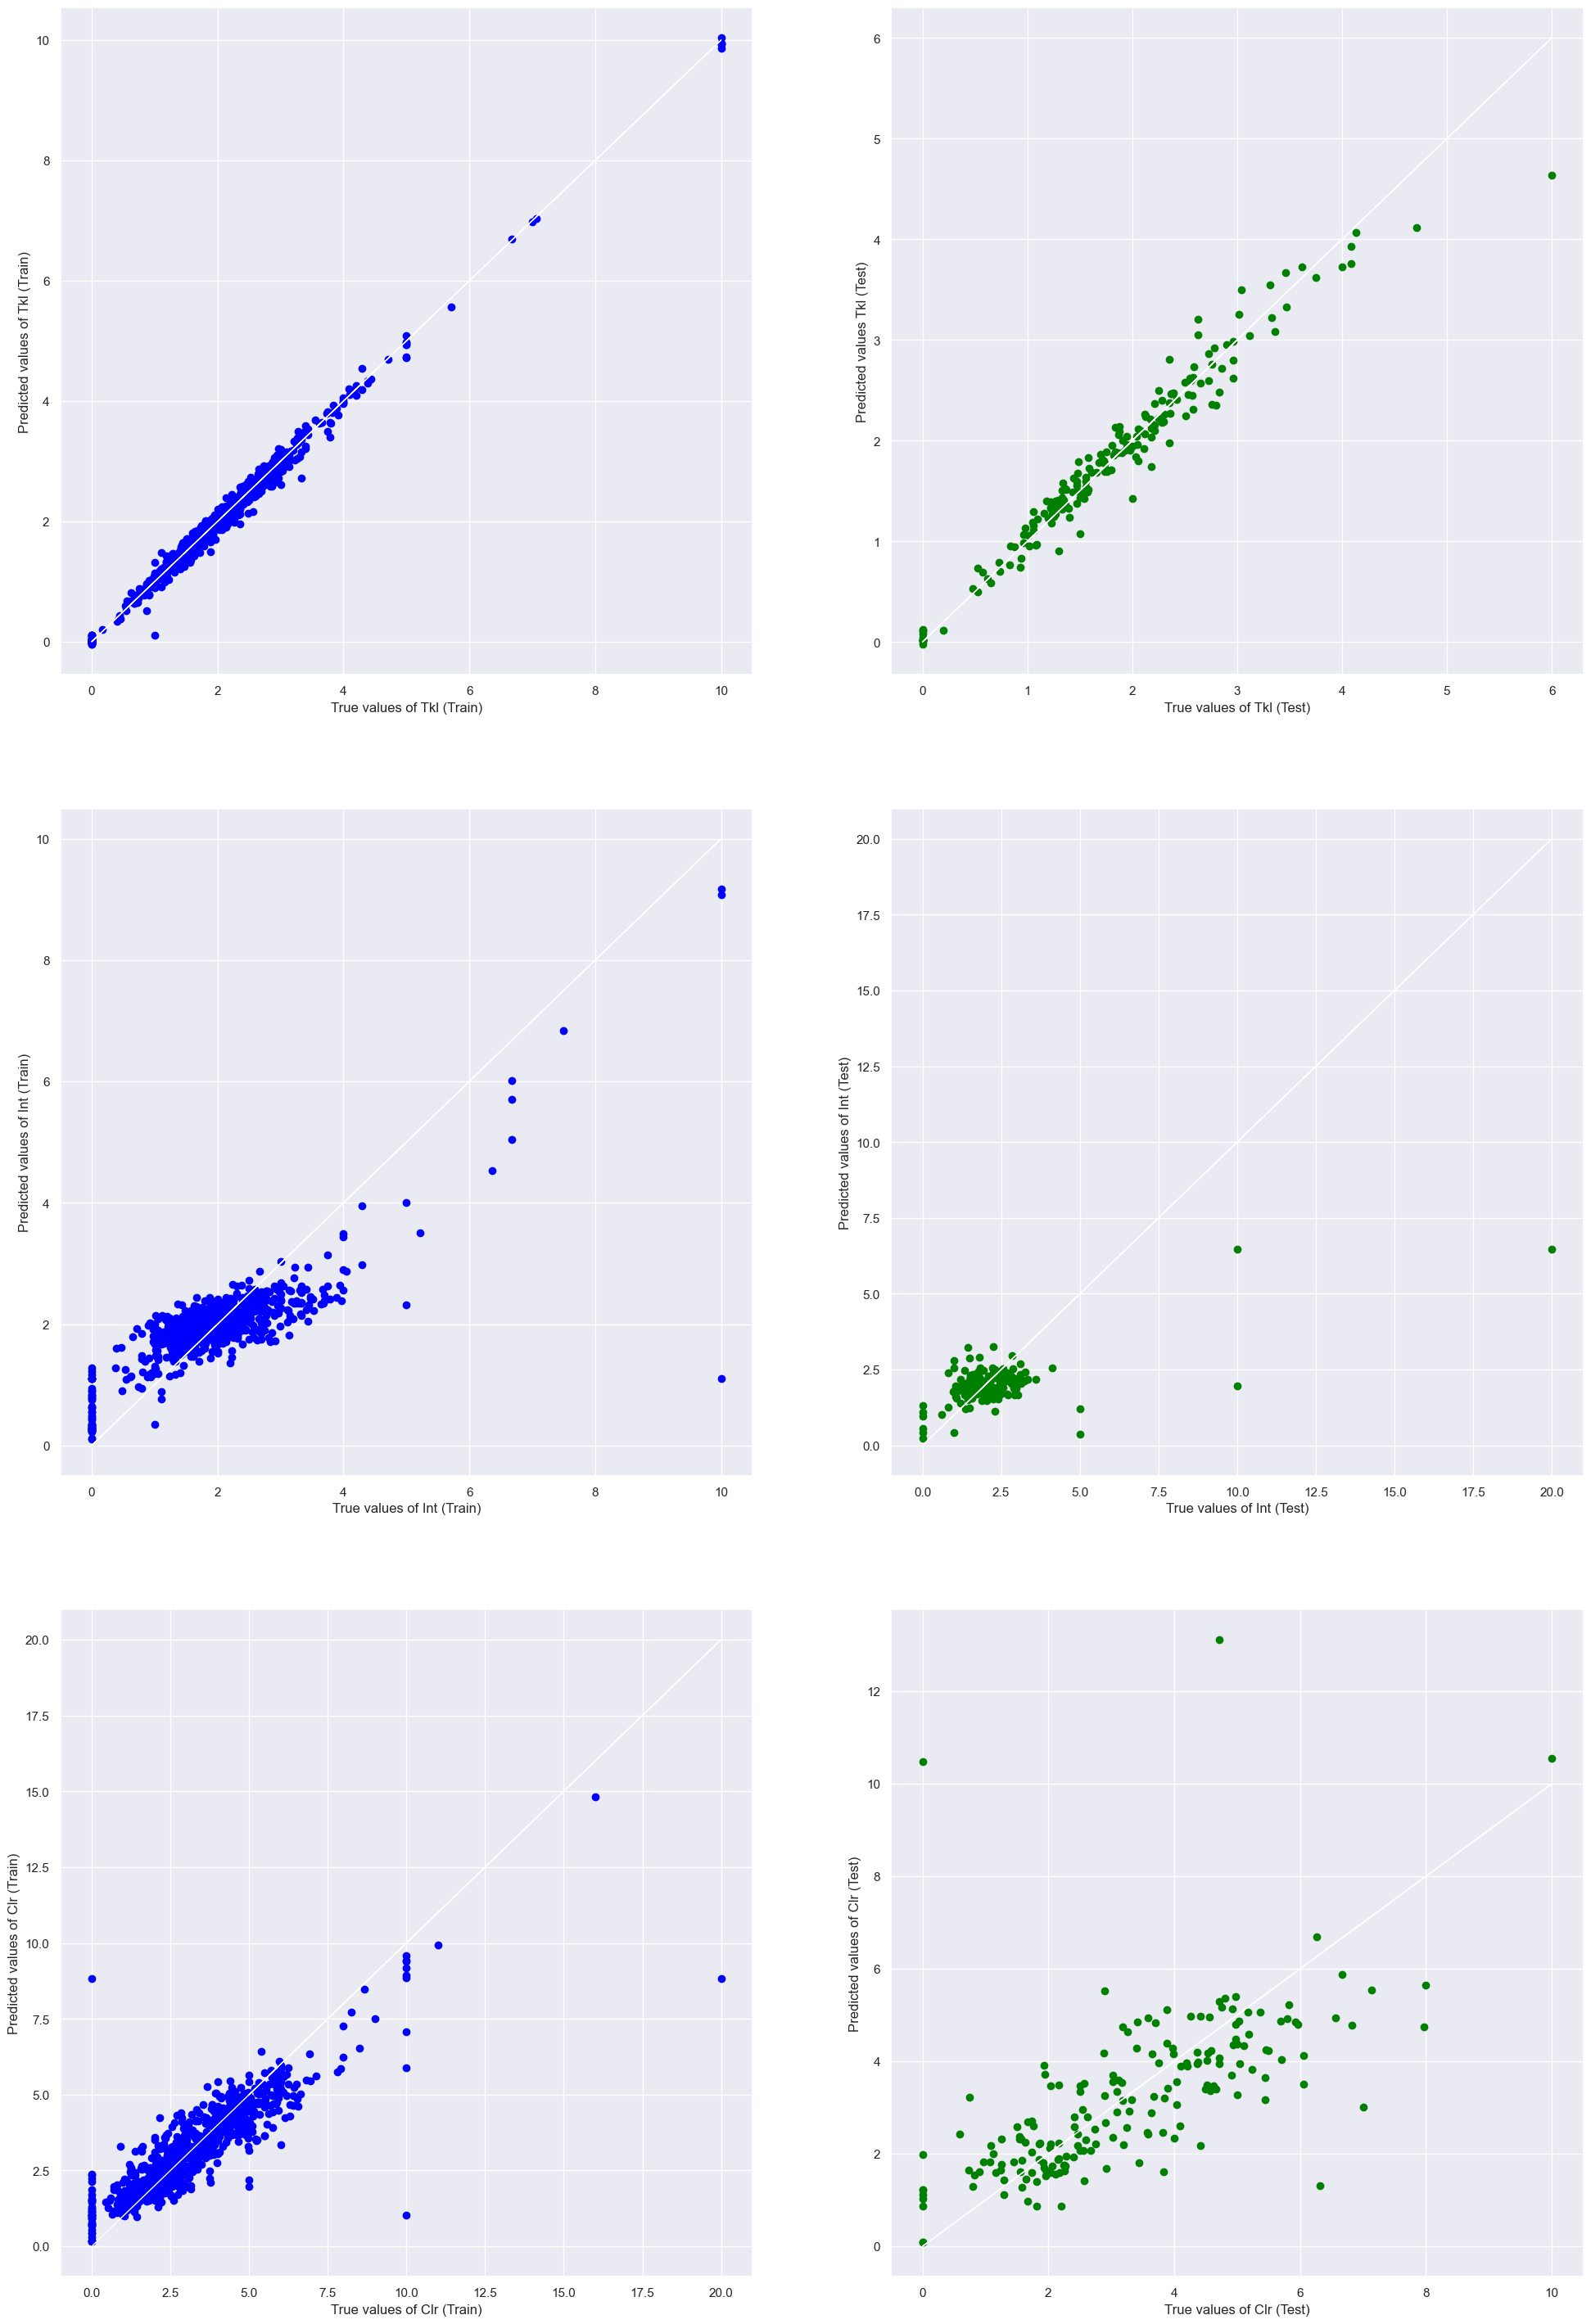

In [37]:
f, axes = plt.subplots(3, 2, figsize=(24, 36))
axes[0][0].scatter(DF_Y_Train_Tkl, DF_gradient_Tkl.predict(DF_X_Train), color = "blue")
axes[0][0].plot(DF_Y_Train_Tkl, DF_Y_Train_Tkl, 'w-', linewidth = 1)
axes[0][0].set_xlabel("True values of Tkl (Train)")
axes[0][0].set_ylabel("Predicted values of Tkl (Train)")
axes[0][1].scatter(DF_Y_Test_Tkl, DF_gradient_Tkl.predict(DF_X_Test), color = "green")
axes[0][1].plot(DF_Y_Test_Tkl, DF_Y_Test_Tkl, 'w-', linewidth = 1)
axes[0][1].set_xlabel("True values of Tkl (Test)")
axes[0][1].set_ylabel("Predicted values Tkl (Test)")

axes[1][0].scatter(DF_Y_Train_Int, DF_gradient_Int.predict(DF_X_Train), color = "blue")
axes[1][0].plot(DF_Y_Train_Int, DF_Y_Train_Int, 'w-', linewidth = 1)
axes[1][0].set_xlabel("True values of Int (Train)")
axes[1][0].set_ylabel("Predicted values of Int (Train)")
axes[1][1].scatter(DF_Y_Test_Int, DF_gradient_Int.predict(DF_X_Test), color = "green")
axes[1][1].plot(DF_Y_Test_Int, DF_Y_Test_Int, 'w-', linewidth = 1)
axes[1][1].set_xlabel("True values of Int (Test)")
axes[1][1].set_ylabel("Predicted values of Int (Test)")

axes[2][0].scatter(DF_Y_Train_Clr, DF_gradient_Clr.predict(DF_X_Train), color = "blue")
axes[2][0].plot(DF_Y_Train_Clr, DF_Y_Train_Clr, 'w-', linewidth = 1)
axes[2][0].set_xlabel("True values of Clr (Train)")
axes[2][0].set_ylabel("Predicted values of Clr (Train)")
axes[2][1].scatter(DF_Y_Test_Clr, DF_gradient_Clr.predict(DF_X_Test), color = "green")
axes[2][1].plot(DF_Y_Test_Clr, DF_Y_Test_Clr, 'w-', linewidth = 1)
axes[2][1].set_xlabel("True values of Clr (Test)")
axes[2][1].set_ylabel("Predicted values of Clr (Test)")

print("Gradient Boosting for Defenders:")
print("Tkl Mean Squared Error: \t", Tkl_gradient_mse)
print("Tkl R-squared: \t\t\t", Tkl_gradient_r2)
print("Int Mean Squared Error: \t", Int_gradient_mse)
print("Int R-squared: \t\t\t", Int_gradient_r2)
print("Clr Mean Squared Error: \t", Clr_gradient_mse)
print("Clr R-squared: \t\t\t", Clr_gradient_r2)

In [38]:
FW_Relevant['P_G/Sh_GB'] = FW_gradient_GSh.predict(FW_X)
FW_Relevant['P_G/SoT_GB'] = FW_gradient_GSoT.predict(FW_X)
MF_Relevant['P_PasCmpSho%_GB'] = MF_gradient_Sho.predict(MF_X)
MF_Relevant['P_PasCmpMed%_GB'] = MF_gradient_Med.predict(MF_X)
MF_Relevant['P_PasCmpLon%_GB'] = MF_gradient_Lon.predict(MF_X)
DF_Relevant['P_Tkl_GB'] = DF_gradient_Tkl.predict(DF_X)
DF_Relevant['P_Int_GB'] = DF_gradient_Int.predict(DF_X)
DF_Relevant['P_Clr_GB'] = DF_gradient_Clr.predict(DF_X)
FW_Relevant.round(2)
MF_Relevant.round(2)
DF_Relevant.round(2)

Player   Tkl   Int   Clr  BlkSh  BlkPass  TklDef3rd  \
0               Max Aarons  2.16  1.75  2.19   0.69     2.00       1.56   
1         Yunis Abdelhamid  1.87  3.11  3.20   0.79     1.09       1.24   
8               Luis Abram  1.13  1.77  6.29   0.81     1.29       0.81   
9         Francesco Acerbi  0.96  1.70  4.08   1.06     0.64       0.64   
12            Marcos Acuña  2.31  1.24  1.20   0.16     1.27       1.31   
...                    ...   ...   ...   ...    ...      ...        ...   
2906  Christoph Zimmermann  2.94  1.76  1.76   0.00     0.00       1.76   
2907   Oleksandr Zinchenko  1.72  1.55  1.12   0.26     1.29       0.60   
2912        Banhie Zoukrou  1.11  2.22  1.11   0.00     0.00       1.11   
2913            Kurt Zouma  0.48  2.03  6.06   1.17     0.48       0.39   
2915         Igor Zubeldia  1.42  1.69  3.44   0.49     0.98       0.93   

      TklMid3rd  PasTotCmp%  PasLonCmp%  ...  AerWon  P_Tkl_LR  P_Int_LR  \
0          0.59        75.5        45.2  ...    0.47      2.36      1.91   
1          0.60        82.4        61.7  ...    2.02      1.98      1.99   
8          0.16        88.2        75.0  ...    1.94      1.09      1.81   
9          0.32        90.3        77.1  ...    2.84      1.04      1.84   
12         0.60        79.4        58.0  ...    1.31      2.09      1.95   
...         ...         ...         ...  ...     ...       ...       ...   
2906       1.18        72.7        47.1  ...    1.18      3.12      2.14   
2907       0.86        89.3        73.0  ...    1.47      1.64      1.92   
2912       0.00        92.3        75.0  ...    1.11      1.21      1.61   
2913       0.09        88.9        70.3  ...    2.38      0.56      1.72   
2915       0.49        88.8        78.4  ...    2.62      1.54      1.92   

      P_Clr_LR  P_Tkl_RF  P_Int_RF  P_Clr_RF  P_Tkl_GB  P_Int_GB  P_Clr_GB  
0         2.19      2.26      2.09      2.85      2.23      2.02      2.28  
1         3.46      2.05      2.10      4.13      2.00      2.24      3.84  
8         3.45      1.03      1.93      3.86      1.05      2.00      4.29  
9         4.28      1.20      1.83      4.61      0.94      1.86      4.31  
12        2.42      2.09      2.09      1.96      2.19      1.96      2.02  
...        ...       ...       ...       ...       ...       ...       ...  
2906      2.31      2.60      2.07      1.98      3.10      1.86      2.25  
2907      2.45      1.77      1.81      1.94      1.63      1.64      1.54  
2912      2.39      1.30      1.84      1.92      1.18      1.46      1.20  
2913      4.18      0.82      1.78      4.59      0.53      1.49      4.12  
2915      3.57      1.70      1.97      3.69      1.47      1.83      3.61  

[942 rows x 21 columns]

Text(0, 0.5, 'Predicted values of Clr')

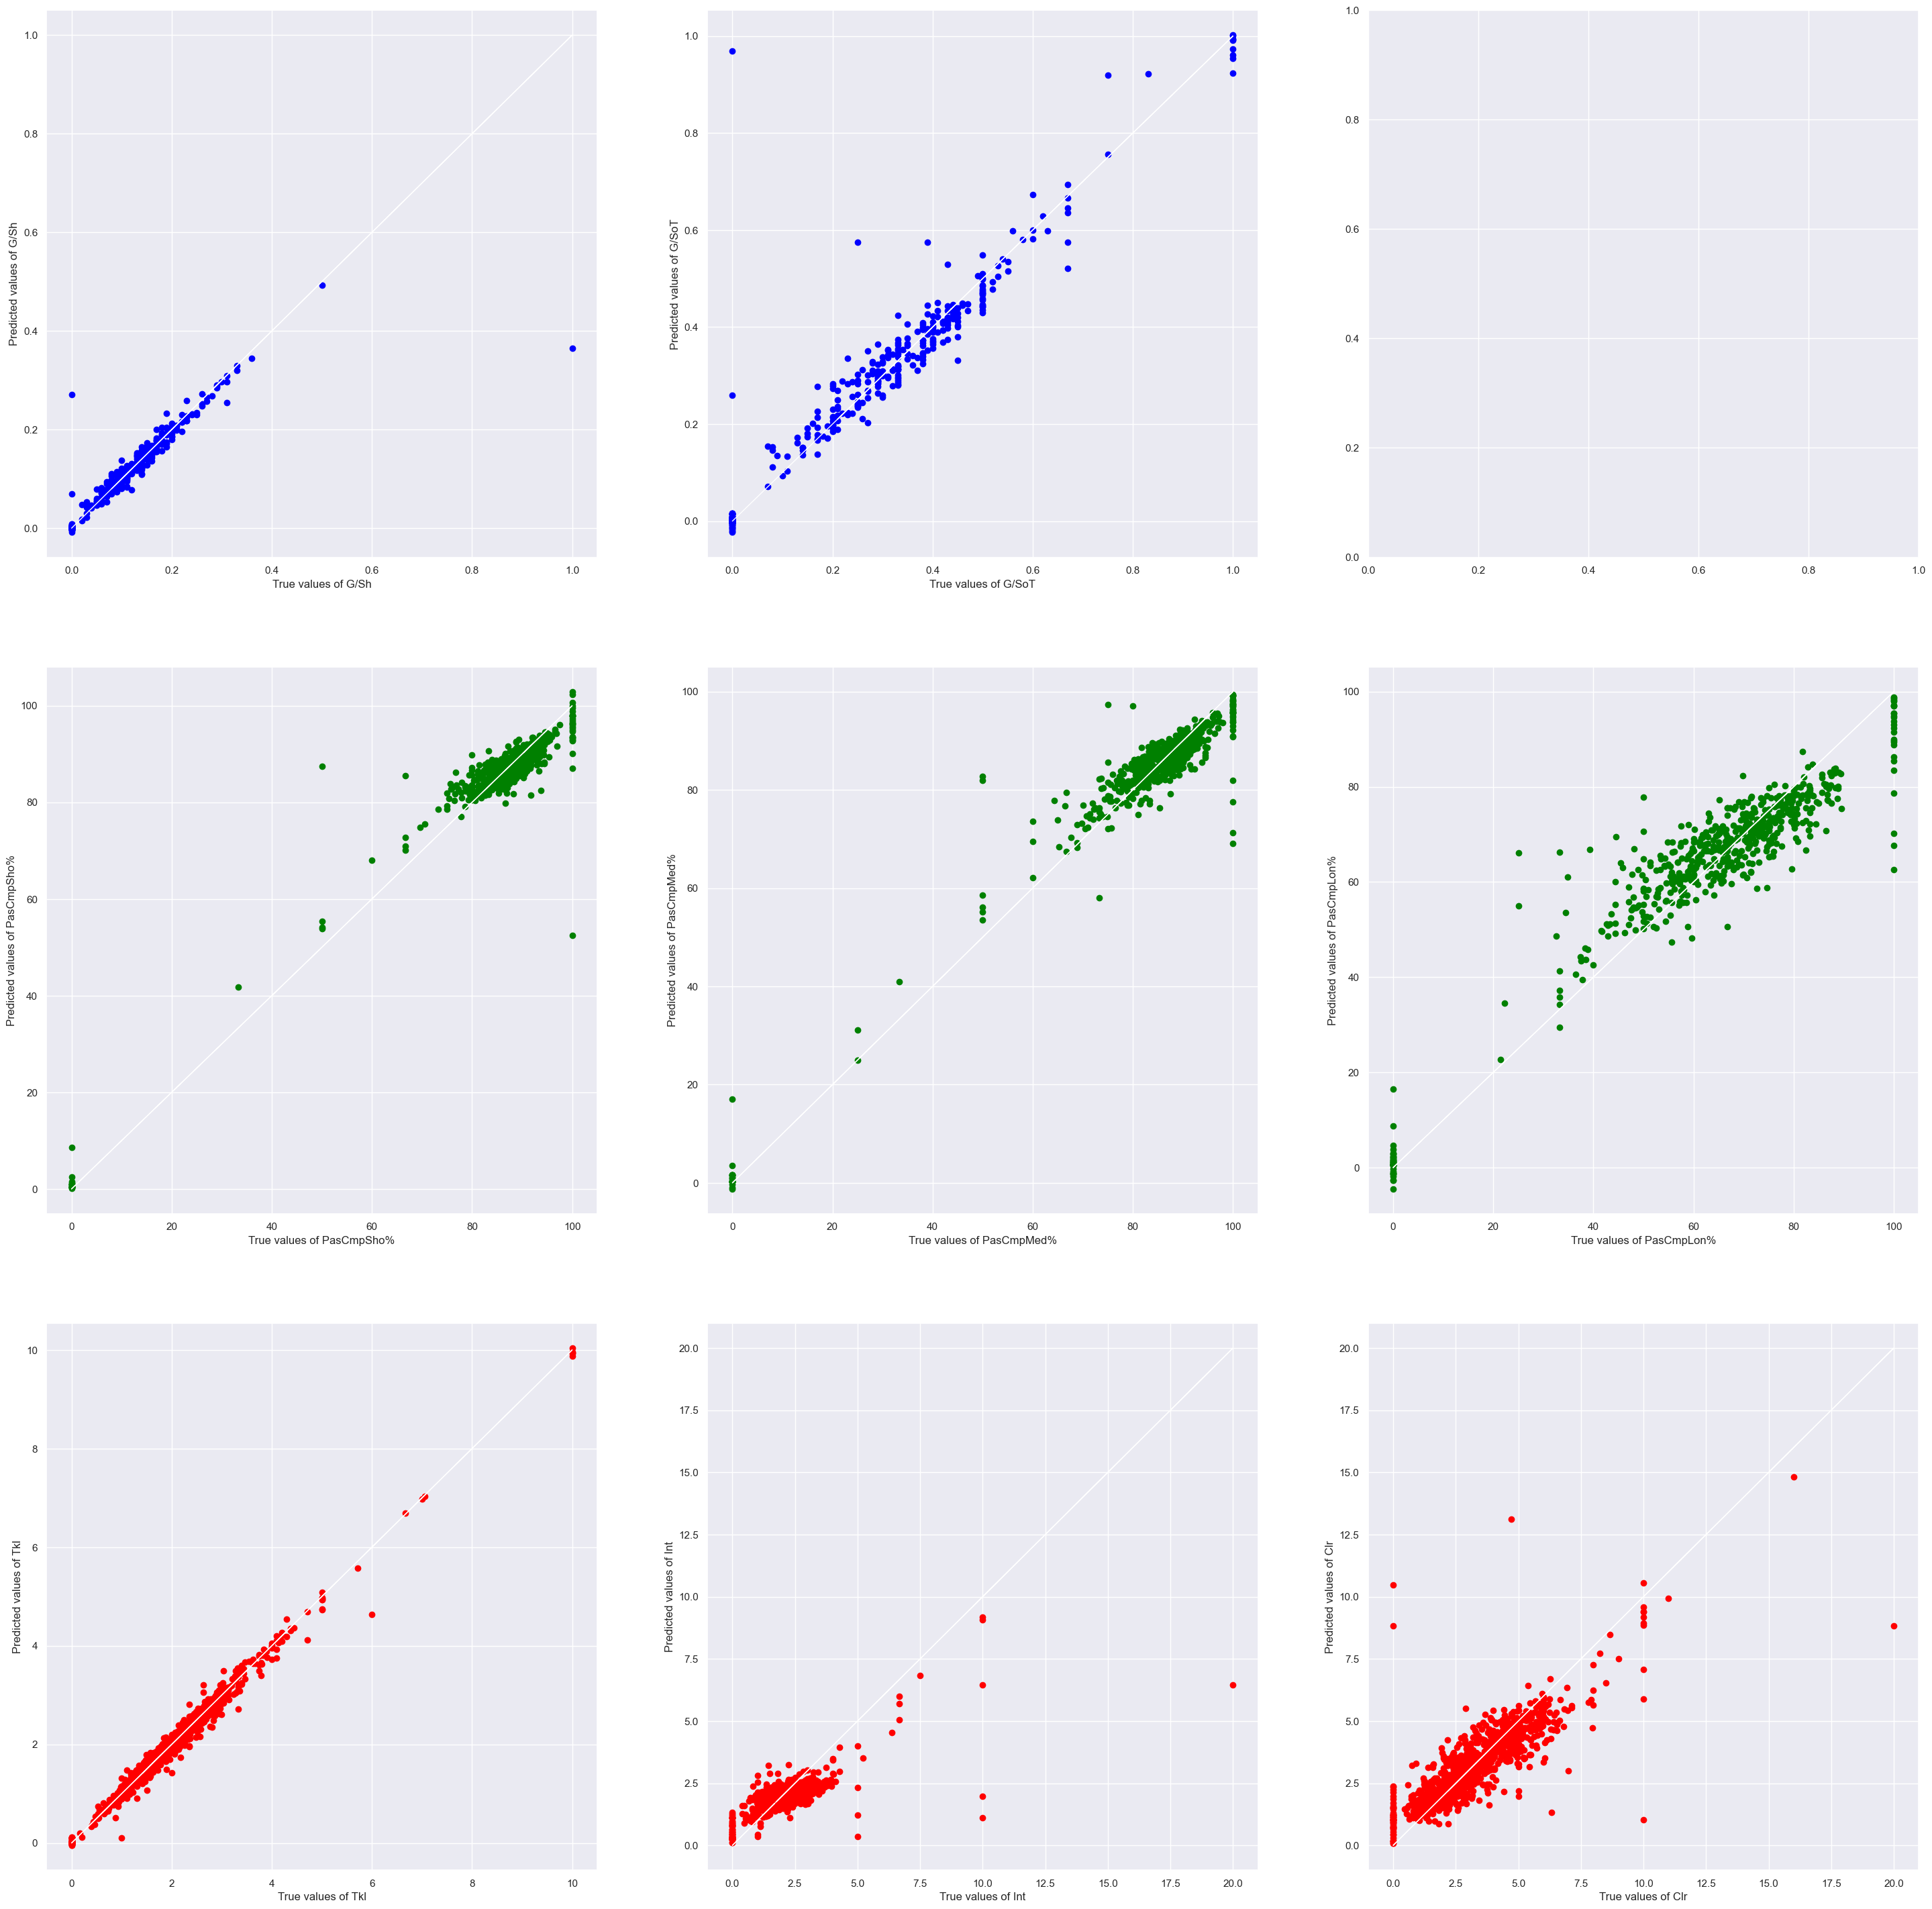

In [39]:
f, axes = plt.subplots(3, 3, figsize=(36, 36))
axes[0][0].scatter(FW_Y_GSh, FW_Relevant['P_G/Sh_GB'], color = "blue")
axes[0][0].plot(FW_Y_GSh, FW_Y_GSh, 'w-', linewidth = 1)
axes[0][0].set_xlabel("True values of G/Sh")
axes[0][0].set_ylabel("Predicted values of G/Sh")
axes[0][1].scatter(FW_Y_GSoT, FW_Relevant['P_G/SoT_GB'], color = "blue")
axes[0][1].plot(FW_Y_GSoT, FW_Y_GSoT, 'w-', linewidth = 1)
axes[0][1].set_xlabel("True values of G/SoT")
axes[0][1].set_ylabel("Predicted values of G/SoT")

axes[1][0].scatter(MF_Y_Sho, MF_Relevant['P_PasCmpSho%_GB'], color = "green")
axes[1][0].plot(MF_Y_Sho, MF_Y_Sho, 'w-', linewidth = 1)
axes[1][0].set_xlabel("True values of PasCmpSho%")
axes[1][0].set_ylabel("Predicted values of PasCmpSho%")
axes[1][1].scatter(MF_Y_Med, MF_Relevant['P_PasCmpMed%_GB'], color = "green")
axes[1][1].plot(MF_Y_Med, MF_Y_Med, 'w-', linewidth = 1)
axes[1][1].set_xlabel("True values of PasCmpMed%")
axes[1][1].set_ylabel("Predicted values of PasCmpMed%")
axes[1][2].scatter(MF_Y_Lon, MF_Relevant['P_PasCmpLon%_GB'], color = "green")
axes[1][2].plot(MF_Y_Lon, MF_Y_Lon, 'w-', linewidth = 1)
axes[1][2].set_xlabel("True values of PasCmpLon%")
axes[1][2].set_ylabel("Predicted values of PasCmpLon%")

axes[2][0].scatter(DF_Y_Tkl, DF_Relevant['P_Tkl_GB'], color = "red")
axes[2][0].plot(DF_Y_Tkl, DF_Y_Tkl, 'w-', linewidth = 1)
axes[2][0].set_xlabel("True values of Tkl")
axes[2][0].set_ylabel("Predicted values of Tkl")
axes[2][1].scatter(DF_Y_Int, DF_Relevant['P_Int_GB'], color = "red")
axes[2][1].plot(DF_Y_Int, DF_Y_Int, 'w-', linewidth = 1)
axes[2][1].set_xlabel("True values of Int")
axes[2][1].set_ylabel("Predicted values of Int")
axes[2][2].scatter(DF_Y_Clr, DF_Relevant['P_Clr_GB'], color = "red")
axes[2][2].plot(DF_Y_Clr, DF_Y_Clr, 'w-', linewidth = 1)
axes[2][2].set_xlabel("True values of Clr")
axes[2][2].set_ylabel("Predicted values of Clr")

# Top 10 players according to target variables
We created 4 different sets of tables, 1 table for each target variable, to show the results.

The first one is sorted by the actual values, folowed by the predictions by the Linear Regression, Random Forest and Gradient Boosting models respectively.

In [40]:
print(tabulate(FW_Relevant.nlargest(10, 'G/Sh')[['Player', 'G/Sh', 'P_G/Sh_LR', 'P_G/Sh_RF', 'P_G/Sh_GB']], headers=['Player', 'Actual (G/Sh)', 'Linear Regression', 'Random Forest', 'Gradient Boosting'], showindex=False, tablefmt='grid'))
print(tabulate(FW_Relevant.nlargest(10, 'G/SoT')[['Player', 'G/SoT', 'P_G/SoT_LR', 'P_G/SoT_RF', 'P_G/SoT_GB']], headers=['Player', 'Actual (G/SoT)', 'Linear Regression', 'Random Forest', 'Gradient Boosting'], showindex=False, tablefmt='grid'))
print()
print(tabulate(MF_Relevant.nlargest(10, 'PasShoCmp%')[['Player', 'PasShoCmp%', 'P_PasCmpSho%_LR', 'P_PasCmpSho%_RF', 'P_PasCmpSho%_GB']], headers=['Player', 'Actual (PasShoCmp%)', 'Linear Regression', 'Random Forest', 'Gradient Boosting'], showindex=False, tablefmt='grid'))
print(tabulate(MF_Relevant.nlargest(10, 'PasMedCmp%')[['Player', 'PasMedCmp%', 'P_PasCmpMed%_LR', 'P_PasCmpMed%_RF', 'P_PasCmpMed%_GB']], headers=['Player', 'Actual (PasMedCmp%)', 'Linear Regression', 'Random Forest', 'Gradient Boosting'], showindex=False, tablefmt='grid'))
print(tabulate(MF_Relevant.nlargest(10, 'PasLonCmp%')[['Player', 'PasLonCmp%', 'P_PasCmpLon%_LR', 'P_PasCmpLon%_RF', 'P_PasCmpLon%_GB']], headers=['Player', 'Actual (PasLonCmp%)', 'Linear Regression', 'Random Forest', 'Gradient Boosting'], showindex=False, tablefmt='grid'))
print()
print(tabulate(DF_Relevant.nlargest(10, 'Tkl')[['Player', 'Tkl', 'P_Tkl_LR', 'P_Tkl_RF', 'P_Tkl_GB']], headers=['Player', 'Actual (Tkl)', 'Linear Regression', 'Random Forest', 'Gradient Boosting'], showindex=False, tablefmt='grid'))
print(tabulate(DF_Relevant.nlargest(10, 'Int')[['Player', 'Int', 'P_Int_LR', 'P_Int_RF', 'P_Int_GB']], headers=['Player', 'Actual (Int)', 'Linear Regression', 'Random Forest', 'Gradient Boosting'], showindex=False, tablefmt='grid'))
print(tabulate(DF_Relevant.nlargest(10, 'Clr')[['Player', 'Clr', 'P_Clr_LR', 'P_Clr_RF', 'P_Clr_GB']], headers=['Player', 'Actual (Clr)', 'Linear Regression', 'Random Forest', 'Gradient Boosting'], showindex=False, tablefmt='grid'))

+---------------------------+-----------------+---------------------+-----------------+---------------------+
| Player                    |   Actual (G/Sh) |   Linear Regression |   Random Forest |   Gradient Boosting |
+===========================+=================+=====================+=================+=====================+
| Pablo Sarabia             |            1    |            1.09778  |        0.295383 |            0.365451 |
+---------------------------+-----------------+---------------------+-----------------+---------------------+
| Delano Burgzorg           |            0.5  |            0.731774 |        0.368307 |            0.492998 |
+---------------------------+-----------------+---------------------+-----------------+---------------------+
| Ibrahima Koné             |            0.36 |            0.17023  |        0.208253 |            0.344402 |
+---------------------------+-----------------+---------------------+-----------------+---------------------+
| Moustaph

In [41]:
print(tabulate(FW_Relevant.nlargest(10, 'P_G/Sh_LR')[['Player', 'G/Sh', 'P_G/Sh_LR', 'P_G/Sh_RF', 'P_G/Sh_GB']], headers=['Player', 'Actual (G/Sh)', 'Linear Regression', 'Random Forest', 'Gradient Boosting'], showindex=False, tablefmt='grid'))
print(tabulate(FW_Relevant.nlargest(10, 'P_G/SoT_LR')[['Player', 'G/SoT', 'P_G/SoT_LR', 'P_G/SoT_RF', 'P_G/SoT_GB']], headers=['Player', 'Actual (G/SoT)', 'Linear Regression', 'Random Forest', 'Gradient Boosting'], showindex=False, tablefmt='grid'))
print()
print(tabulate(MF_Relevant.nlargest(10, 'P_PasCmpSho%_LR')[['Player', 'PasShoCmp%', 'P_PasCmpSho%_LR', 'P_PasCmpSho%_RF', 'P_PasCmpSho%_GB']], headers=['Player', 'Actual (PasShoCmp%)', 'Linear Regression', 'Random Forest', 'Gradient Boosting'], showindex=False, tablefmt='grid'))
print(tabulate(MF_Relevant.nlargest(10, 'P_PasCmpMed%_LR')[['Player', 'PasMedCmp%', 'P_PasCmpMed%_LR', 'P_PasCmpMed%_RF', 'P_PasCmpMed%_GB']], headers=['Player', 'Actual (PasMedCmp%)', 'Linear Regression', 'Random Forest', 'Gradient Boosting'], showindex=False, tablefmt='grid'))
print(tabulate(MF_Relevant.nlargest(10, 'P_PasCmpLon%_LR')[['Player', 'PasLonCmp%', 'P_PasCmpLon%_LR', 'P_PasCmpLon%_RF', 'P_PasCmpLon%_GB']], headers=['Player', 'Actual (PasLonCmp%)', 'Linear Regression', 'Random Forest', 'Gradient Boosting'], showindex=False, tablefmt='grid'))
print()
print(tabulate(DF_Relevant.nlargest(10, 'P_Tkl_LR')[['Player', 'Tkl', 'P_Tkl_LR', 'P_Tkl_RF', 'P_Tkl_GB']], headers=['Player', 'Actual (Tkl)', 'Linear Regression', 'Random Forest', 'Gradient Boosting'], showindex=False, tablefmt='grid'))
print(tabulate(DF_Relevant.nlargest(10, 'P_Int_LR')[['Player', 'Int', 'P_Int_LR', 'P_Int_RF', 'P_Int_GB']], headers=['Player', 'Actual (Int)', 'Linear Regression', 'Random Forest', 'Gradient Boosting'], showindex=False, tablefmt='grid'))
print(tabulate(DF_Relevant.nlargest(10, 'P_Clr_LR')[['Player', 'Clr', 'P_Clr_LR', 'P_Clr_RF', 'P_Clr_GB']], headers=['Player', 'Actual (Clr)', 'Linear Regression', 'Random Forest', 'Gradient Boosting'], showindex=False, tablefmt='grid'))

+--------------------+-----------------+---------------------+-----------------+---------------------+
| Player             |   Actual (G/Sh) |   Linear Regression |   Random Forest |   Gradient Boosting |
+====================+=================+=====================+=================+=====================+
| Pablo Sarabia      |            1    |            1.09778  |        0.295383 |            0.365451 |
+--------------------+-----------------+---------------------+-----------------+---------------------+
| Delano Burgzorg    |            0.5  |            0.731774 |        0.368307 |            0.492998 |
+--------------------+-----------------+---------------------+-----------------+---------------------+
| Moustapha Cissé    |            0.33 |            0.537823 |        0.269844 |            0.329825 |
+--------------------+-----------------+---------------------+-----------------+---------------------+
| Divock Origi       |            0.3  |            0.450198 |        0.2

In [42]:
print(tabulate(FW_Relevant.nlargest(10, 'P_G/Sh_RF')[['Player', 'G/Sh', 'P_G/Sh_LR', 'P_G/Sh_RF', 'P_G/Sh_GB']], headers=['Player', 'Actual (G/Sh)', 'Linear Regression', 'Random Forest', 'Gradient Boosting'], showindex=False, tablefmt='grid'))
print(tabulate(FW_Relevant.nlargest(10, 'P_G/SoT_RF')[['Player', 'G/SoT', 'P_G/SoT_LR', 'P_G/SoT_RF', 'P_G/SoT_GB']], headers=['Player', 'Actual (G/SoT)', 'Linear Regression', 'Random Forest', 'Gradient Boosting'], showindex=False, tablefmt='grid'))
print()
print(tabulate(MF_Relevant.nlargest(10, 'P_PasCmpSho%_RF')[['Player', 'PasShoCmp%', 'P_PasCmpSho%_LR', 'P_PasCmpSho%_RF', 'P_PasCmpSho%_GB']], headers=['Player', 'Actual (PasShoCmp%)', 'Linear Regression', 'Random Forest', 'Gradient Boosting'], showindex=False, tablefmt='grid'))
print(tabulate(MF_Relevant.nlargest(10, 'P_PasCmpMed%_RF')[['Player', 'PasMedCmp%', 'P_PasCmpMed%_LR', 'P_PasCmpMed%_RF', 'P_PasCmpMed%_GB']], headers=['Player', 'Actual (PasMedCmp%)', 'Linear Regression', 'Random Forest', 'Gradient Boosting'], showindex=False, tablefmt='grid'))
print(tabulate(MF_Relevant.nlargest(10, 'P_PasCmpLon%_RF')[['Player', 'PasLonCmp%', 'P_PasCmpLon%_LR', 'P_PasCmpLon%_RF', 'P_PasCmpLon%_GB']], headers=['Player', 'Actual (PasLonCmp%)', 'Linear Regression', 'Random Forest', 'Gradient Boosting'], showindex=False, tablefmt='grid'))
print()
print(tabulate(DF_Relevant.nlargest(10, 'P_Tkl_RF')[['Player', 'Tkl', 'P_Tkl_LR', 'P_Tkl_RF', 'P_Tkl_GB']], headers=['Player', 'Actual (Tkl)', 'Linear Regression', 'Random Forest', 'Gradient Boosting'], showindex=False, tablefmt='grid'))
print(tabulate(DF_Relevant.nlargest(10, 'P_Int_RF')[['Player', 'Int', 'P_Int_LR', 'P_Int_RF', 'P_Int_GB']], headers=['Player', 'Actual (Int)', 'Linear Regression', 'Random Forest', 'Gradient Boosting'], showindex=False, tablefmt='grid'))
print(tabulate(DF_Relevant.nlargest(10, 'P_Clr_RF')[['Player', 'Clr', 'P_Clr_LR', 'P_Clr_RF', 'P_Clr_GB']], headers=['Player', 'Actual (Clr)', 'Linear Regression', 'Random Forest', 'Gradient Boosting'], showindex=False, tablefmt='grid'))

+--------------------+-----------------+---------------------+-----------------+---------------------+
| Player             |   Actual (G/Sh) |   Linear Regression |   Random Forest |   Gradient Boosting |
+====================+=================+=====================+=================+=====================+
| Delano Burgzorg    |            0.5  |            0.731774 |        0.368307 |            0.492998 |
+--------------------+-----------------+---------------------+-----------------+---------------------+
| Pablo Sarabia      |            1    |            1.09778  |        0.295383 |            0.365451 |
+--------------------+-----------------+---------------------+-----------------+---------------------+
| Moustapha Cissé    |            0.33 |            0.537823 |        0.269844 |            0.329825 |
+--------------------+-----------------+---------------------+-----------------+---------------------+
| Divock Origi       |            0.3  |            0.450198 |        0.2

In [43]:
print(tabulate(FW_Relevant.nlargest(10, 'P_G/Sh_GB')[['Player', 'G/Sh', 'P_G/Sh_LR', 'P_G/Sh_RF', 'P_G/Sh_GB']], headers=['Player', 'Actual (G/Sh)', 'Linear Regression', 'Random Forest', 'Gradient Boosting'], showindex=False, tablefmt='grid'))
print(tabulate(FW_Relevant.nlargest(10, 'P_G/SoT_GB')[['Player', 'G/SoT', 'P_G/SoT_LR', 'P_G/SoT_RF', 'P_G/SoT_GB']], headers=['Player', 'Actual (G/SoT)', 'Linear Regression', 'Random Forest', 'Gradient Boosting'], showindex=False, tablefmt='grid'))
print()
print(tabulate(MF_Relevant.nlargest(10, 'P_PasCmpSho%_GB')[['Player', 'PasShoCmp%', 'P_PasCmpSho%_LR', 'P_PasCmpSho%_RF', 'P_PasCmpSho%_GB']], headers=['Player', 'Actual (PasShoCmp%)', 'Linear Regression', 'Random Forest', 'Gradient Boosting'], showindex=False, tablefmt='grid'))
print(tabulate(MF_Relevant.nlargest(10, 'P_PasCmpMed%_GB')[['Player', 'PasMedCmp%', 'P_PasCmpMed%_LR', 'P_PasCmpMed%_RF', 'P_PasCmpMed%_GB']], headers=['Player', 'Actual (PasMedCmp%)', 'Linear Regression', 'Random Forest', 'Gradient Boosting'], showindex=False, tablefmt='grid'))
print(tabulate(MF_Relevant.nlargest(10, 'P_PasCmpLon%_GB')[['Player', 'PasLonCmp%', 'P_PasCmpLon%_LR', 'P_PasCmpLon%_RF', 'P_PasCmpLon%_GB']], headers=['Player', 'Actual (PasLonCmp%)', 'Linear Regression', 'Random Forest', 'Gradient Boosting'], showindex=False, tablefmt='grid'))
print()
print(tabulate(DF_Relevant.nlargest(10, 'P_Tkl_GB')[['Player', 'Tkl', 'P_Tkl_LR', 'P_Tkl_RF', 'P_Tkl_GB']], headers=['Player', 'Actual (Tkl)', 'Linear Regression', 'Random Forest', 'Gradient Boosting'], showindex=False, tablefmt='grid'))
print(tabulate(DF_Relevant.nlargest(10, 'P_Int_GB')[['Player', 'Int', 'P_Int_LR', 'P_Int_RF', 'P_Int_GB']], headers=['Player', 'Actual (Int)', 'Linear Regression', 'Random Forest', 'Gradient Boosting'], showindex=False, tablefmt='grid'))
print(tabulate(DF_Relevant.nlargest(10, 'P_Clr_GB')[['Player', 'Clr', 'P_Clr_LR', 'P_Clr_RF', 'P_Clr_GB']], headers=['Player', 'Actual (Clr)', 'Linear Regression', 'Random Forest', 'Gradient Boosting'], showindex=False, tablefmt='grid'))

+---------------------------+-----------------+---------------------+-----------------+---------------------+
| Player                    |   Actual (G/Sh) |   Linear Regression |   Random Forest |   Gradient Boosting |
+===========================+=================+=====================+=================+=====================+
| Delano Burgzorg           |            0.5  |            0.731774 |        0.368307 |            0.492998 |
+---------------------------+-----------------+---------------------+-----------------+---------------------+
| Pablo Sarabia             |            1    |            1.09778  |        0.295383 |            0.365451 |
+---------------------------+-----------------+---------------------+-----------------+---------------------+
| Ibrahima Koné             |            0.36 |            0.17023  |        0.208253 |            0.344402 |
+---------------------------+-----------------+---------------------+-----------------+---------------------+
| Moustaph

In [44]:
result = pd.DataFrame()
result['Variable'] = ['G/Sh', 'G/SoT', 'PasCmpSho%', 'PasCmpMed%', 'PasCmpLon%', 'Tkl', 'Int', 'Clr']
result['R2_LR'] = [GSh_linear_r2, GSoT_linear_r2, Sho_linear_r2, Med_linear_r2, Lon_linear_r2, Tkl_linear_r2, Int_linear_r2, Clr_linear_r2]
result['MSE_LR'] = [GSh_linear_mse, GSoT_linear_mse, Sho_linear_mse, Med_linear_mse, Lon_linear_mse, Tkl_linear_mse, Int_linear_mse, Clr_linear_mse]
result['R2_RF'] = [GSh_r2, GSoT_r2, Sho_r2, Med_r2, Lon_r2, Tkl_r2, Int_r2, Clr_r2]
result['MSE_RF'] = [GSh_mse, GSoT_mse, Sho_mse, Med_mse, Lon_mse, Tkl_mse, Int_mse, Clr_mse]
result['OOB_RF'] = [GSh_oob_score, GSoT_oob_score, Sho_oob_score, Med_oob_score, Lon_oob_score, Tkl_oob_score, Int_oob_score, Clr_oob_score]
result['R2_GB'] = [GSh_gradient_r2, GSoT_gradient_r2, Sho_gradient_r2, Med_gradient_r2, Lon_gradient_r2, Tkl_gradient_r2, Int_gradient_r2, Clr_gradient_r2]
result['MSE_GB'] = [GSh_gradient_mse, GSoT_gradient_mse, Sho_gradient_mse, Med_gradient_mse, Lon_gradient_mse, Tkl_gradient_mse, Int_gradient_mse, Clr_gradient_mse]

print(tabulate(result, headers=['Variable', 'R2_LR', 'MSE_LR', 'R2_RF', 'MSE_RF', 'OOB_RF', 'R2_GB', 'MSE_GB'], showindex=False, tablefmt='grid'))


+------------+-----------+--------------+----------+--------------+------------+-----------+---------------+
| Variable   |     R2_LR |       MSE_LR |    R2_RF |       MSE_RF |     OOB_RF |     R2_GB |        MSE_GB |
+============+===========+==============+==========+==============+============+===========+===============+
| G/Sh       |  0.774078 |   0.00208653 | 0.561233 |   0.00697013 |  0.828358  |  0.624774 |    0.00596073 |
+------------+-----------+--------------+----------+--------------+------------+-----------+---------------+
| G/SoT      |  0.486711 |   0.0261533  | 0.104444 |   0.044262   |  0.787785  |  0.121271 |    0.0434303  |
+------------+-----------+--------------+----------+--------------+------------+-----------+---------------+
| PasCmpSho% |  0.186138 | 219.414      | 0.784481 |  34.6251     |  0.844804  |  0.709478 |   46.6751     |
+------------+-----------+--------------+----------+--------------+------------+-----------+---------------+
| PasCmpMed% |  0.3

# Result Analysis

As we can see, among the 3 models, there are differing results, with Linear Regression being the worst of all 3.

For the forwards, we can see that the best results are produced with the Gradient Boosting model. It has the highest R2 score and the lowest MSE. This is also shown in the graphs of the predicted values plotted against the actual values.

For the MidFielders, the Random Forest produced the best results with the highest R2 and the lowest MSE. The out-of-bag score is also high, which is another indicator that it is fairly accurate.

Finally for the Defenders, the Random Forest and the Gradient Boosting models produced similar results according to the R2 and MSE scores. This is also shown on the graphs.

We can conclude that the Random Forest and Gradient Boosting models are the best fit models, but for different roles. The Random Forest model is best fit for Forwards and Defenders, while the Gradient Boosting model is best fit for MidFielders and Defenders.